In [3]:
!pip install soundfile

In [1]:
import matplotlib.pyplot as plt

In [2]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

In [3]:
#DataFlair - Emotions in the RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "ps"
}

# Define the emotions available in all datasets
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy",
    "fear",
    "disgust",
    "ps"
    
}

In [4]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


In [5]:
import os
import glob
import numpy as np
import soundfile
import librosa
from sklearn.model_selection import train_test_split

# Function to extract features from the audio file
def extract_feature(file, mfcc, chroma, mel):
    with soundfile.SoundFile(file) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
    return result

# Function to load data from multiple datasets
def load_data(data_paths, test_size=0.2, val_size=0.25):
    X, y = [], []
    emotion2int = {'angry':1,'sad':2,'neutral':3,'happy':4,'fear':5,'disgust':6,'ps':7}

    AVAILABLE_EMOTIONS = emotion2int.keys()

    for data_path in data_paths:
        for file in glob.glob(os.path.join(data_path, "*.wav")):
            # get the base name of the audio file
            basename = os.path.basename(file)
            # print the file name for debugging
            print("Processing file:", basename)
            
            # Dynamically identify the emotion label from the file name
            emotion = None
            for label in emotion2int.keys():
                if label.lower() in basename.lower():
                  emotion = label
                  break

            # If emotion is not found, skip the file
            if emotion is None:
                print("Error extracting emotion from:", basename)
                continue
            
            # we allow only AVAILABLE_EMOTIONS we set
            if emotion not in AVAILABLE_EMOTIONS:
                continue
            
            # extract speech features
            features = extract_feature(file, mfcc=True, chroma=True, mel=True)
            # add to data
            X.append(features)
            y.append(emotion2int[emotion])
    
    # Check if X and y are empty
    if len(X) == 0 or len(y) == 0:
        print("No data loaded. Please check your data paths and data files.")
        return None

    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # First, split the data into a training set and a temporary set (testing + validation)
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

    # Then, split the temporary set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=7)

    return X_train, X_val, X_test, y_train, y_val, y_test


In [6]:
data_paths = [
    "C:\\Users\\Samen Das\\Desktop\\Train data\\Ravdess data\\Actor_*",
    "C:\\Users\\Samen Das\\Desktop\\Train data\\Tess data",
    "C:\\Users\\Samen Das\\Desktop\\Train data\\wav",
    "C:\\Users\Samen Das\\Desktop\\Train data\\ESR_data",
    "C:\\Users\\Samen Das\\Desktop\\Train data\\data1",
    #"C:\\Users\\Samen Das\\Desktop\\Train data\\AudioWAV",
    #r"C:\Users\Samen Das\Desktop\Data waste\IIKG-HINDI - Copy",
    #"C:\\Users\\Samen Das\\Desktop\\Train data\\Custom-dataset",
    #"C:\\Users\\Samen Das\\Desktop\\Train data\\dummy1",
   
]
    

In [24]:
X_train, X_val, X_test, y_train, y_val, y_test = load_data(data_paths, test_size=0.2, val_size=0.2)

Processing file: 01_01_01_01_dogs-sitting_disgust.wav
Processing file: 01_01_01_01_dogs-sitting_fear.wav
Processing file: 01_01_01_01_dogs-sitting_neutral.wav
Processing file: 01_01_01_01_dogs-sitting_ps.wav
Processing file: 01_01_01_01_dogs-sitting_sad.wav
Processing file: 01_01_01_01_kids-talking_angry.wav
Processing file: 01_01_01_01_kids-talking_disgust.wav
Processing file: 01_01_01_01_kids-talking_fear.wav
Processing file: 01_01_01_01_kids-talking_happy.wav
Processing file: 01_01_01_01_kids-talking_neutral.wav
Processing file: 01_01_01_01_kids-talking_ps.wav
Processing file: 01_01_01_01_kids-talking_sad.wav
Processing file: 01_01_01_02_dogs-sitting_angry.wav
Processing file: 01_01_01_02_dogs-sitting_disgust.wav
Processing file: 01_01_01_02_dogs-sitting_fear.wav
Processing file: 01_01_01_02_dogs-sitting_happy.wav
Processing file: 01_01_01_02_dogs-sitting_neutral.wav
Processing file: 01_01_01_02_dogs-sitting_ps.wav
Processing file: 01_01_01_02_dogs-sitting_sad.wav
Processing file: 0

Processing file: 02_01_01_01_kids-talking_fear.wav
Processing file: 02_01_01_01_kids-talking_happy.wav
Processing file: 02_01_01_01_kids-talking_neutral.wav
Processing file: 02_01_01_01_kids-talking_ps.wav
Processing file: 02_01_01_01_kids-talking_sad.wav
Processing file: 02_01_01_02_dogs-sitting_angry.wav
Processing file: 02_01_01_02_dogs-sitting_disgust.wav
Processing file: 02_01_01_02_dogs-sitting_fear.wav
Processing file: 02_01_01_02_dogs-sitting_happy.wav
Processing file: 02_01_01_02_dogs-sitting_neutral.wav
Processing file: 02_01_01_02_dogs-sitting_ps.wav
Processing file: 02_01_01_02_dogs-sitting_sad.wav
Processing file: 02_01_01_02_kids-talking_angry.wav
Processing file: 02_01_01_02_kids-talking_disgust.wav
Processing file: 02_01_01_02_kids-talking_fear.wav
Processing file: 02_01_01_02_kids-talking_happy.wav
Processing file: 02_01_01_02_kids-talking_neutral.wav
Processing file: 02_01_01_02_kids-talking_ps.wav
Processing file: 02_01_01_02_kids-talking_sad.wav
Processing file: 02_

Processing file: 03-02-01-01-01-02-03_neutral.wav
Processing file: 03-02-01-01-02-01-03_neutral.wav
Processing file: 03-02-01-01-02-02-03_neutral.wav
Processing file: 03-02-02-01-01-01-03_calm.wav
Error extracting emotion from: 03-02-02-01-01-01-03_calm.wav
Processing file: 03-02-02-01-01-02-03_calm.wav
Error extracting emotion from: 03-02-02-01-01-02-03_calm.wav
Processing file: 03-02-02-01-02-01-03_calm.wav
Error extracting emotion from: 03-02-02-01-02-01-03_calm.wav
Processing file: 03-02-02-01-02-02-03_calm.wav
Error extracting emotion from: 03-02-02-01-02-02-03_calm.wav
Processing file: 03-02-02-02-01-01-03_calm.wav
Error extracting emotion from: 03-02-02-02-01-01-03_calm.wav
Processing file: 03-02-02-02-01-02-03_calm.wav
Error extracting emotion from: 03-02-02-02-01-02-03_calm.wav
Processing file: 03-02-02-02-02-01-03_calm.wav
Error extracting emotion from: 03-02-02-02-02-01-03_calm.wav
Processing file: 03-02-02-02-02-02-03_calm.wav
Error extracting emotion from: 03-02-02-02-02-0

Processing file: 03-02-03-02-01-01-04_happy.wav
Processing file: 03-02-03-02-01-02-04_happy.wav
Processing file: 03-02-03-02-02-01-04_happy.wav
Processing file: 03-02-03-02-02-02-04_happy.wav
Processing file: 03-02-04-01-01-01-04_sad.wav
Processing file: 03-02-04-01-01-02-04_sad.wav
Processing file: 03-02-04-01-02-01-04_sad.wav
Processing file: 03-02-04-01-02-02-04_sad.wav
Processing file: 03-02-04-02-01-01-04_sad.wav
Processing file: 03-02-04-02-01-02-04_sad.wav
Processing file: 03-02-04-02-02-01-04_sad.wav
Processing file: 03-02-04-02-02-02-04_sad.wav
Processing file: 03-02-05-01-01-01-04_angry.wav
Processing file: 03-02-05-01-01-02-04_angry.wav
Processing file: 03-02-05-01-02-01-04_angry.wav
Processing file: 03-02-05-01-02-02-04_angry.wav
Processing file: 03-02-05-02-01-01-04_angry.wav
Processing file: 03-02-05-02-01-02-04_angry.wav
Processing file: 03-02-05-02-02-01-04_angry.wav
Processing file: 03-02-05-02-02-02-04_angry.wav
Processing file: 03-02-06-01-01-01-04_fear.wav
Processin

Processing file: 03-02-04-01-01-02-05_sad.wav
Processing file: 03-02-04-01-02-01-05_sad.wav
Processing file: 03-02-04-01-02-02-05_sad.wav
Processing file: 03-02-04-02-01-01-05_sad.wav
Processing file: 03-02-04-02-01-02-05_sad.wav
Processing file: 03-02-04-02-02-01-05_sad.wav
Processing file: 03-02-04-02-02-02-05_sad.wav
Processing file: 03-02-05-01-01-01-05_angry.wav
Processing file: 03-02-05-01-01-02-05_angry.wav
Processing file: 03-02-05-01-02-01-05_angry.wav
Processing file: 03-02-05-01-02-02-05_angry.wav
Processing file: 03-02-05-02-01-01-05_angry.wav
Processing file: 03-02-05-02-01-02-05_angry.wav
Processing file: 03-02-05-02-02-01-05_angry.wav
Processing file: 03-02-05-02-02-02-05_angry.wav
Processing file: 03-02-06-01-01-01-05_fear.wav
Processing file: 03-02-06-01-01-02-05_fear.wav
Processing file: 03-02-06-01-02-01-05_fear.wav
Processing file: 03-02-06-01-02-02-05_fear.wav
Processing file: 03-02-06-02-01-01-05_fear.wav
Processing file: 03-02-06-02-01-02-05_fear.wav
Processing f

Processing file: 03-02-05-02-01-01-06_angry.wav
Processing file: 03-02-05-02-01-02-06_angry.wav
Processing file: 03-02-05-02-02-01-06_angry.wav
Processing file: 03-02-05-02-02-02-06_angry.wav
Processing file: 03-02-06-01-01-01-06_fear.wav
Processing file: 03-02-06-01-01-02-06_fear.wav
Processing file: 03-02-06-01-02-01-06_fear.wav
Processing file: 03-02-06-01-02-02-06_fear.wav
Processing file: 03-02-06-02-01-01-06_fear.wav
Processing file: 03-02-06-02-01-02-06_fear.wav
Processing file: 03-02-06-02-02-01-06_fear.wav
Processing file: 03-02-06-02-02-02-06_fear.wav
Processing file: 06_01_01_01_dogs-sitting_angry.wav
Processing file: 06_01_01_01_dogs-sitting_disgust.wav
Processing file: 06_01_01_01_dogs-sitting_fear.wav
Processing file: 06_01_01_01_dogs-sitting_happy.wav
Processing file: 06_01_01_01_dogs-sitting_neutral.wav
Processing file: 06_01_01_01_dogs-sitting_ps.wav
Processing file: 06_01_01_01_dogs-sitting_sad.wav
Processing file: 06_01_01_01_kids-talking_angry.wav
Processing file: 0

Processing file: 07_01_02_01_dogs-sitting_fear.wav
Processing file: 07_01_02_01_dogs-sitting_happy.wav
Processing file: 07_01_02_01_dogs-sitting_ps.wav
Processing file: 07_01_02_01_dogs-sitting_sad.wav
Processing file: 07_01_02_01_kids-talking_angry.wav
Processing file: 07_01_02_01_kids-talking_disgust.wav
Processing file: 07_01_02_01_kids-talking_fear.wav
Processing file: 07_01_02_01_kids-talking_happy.wav
Processing file: 07_01_02_01_kids-talking_ps.wav
Processing file: 07_01_02_01_kids-talking_sad.wav
Processing file: 07_01_02_02_dogs-sitting_angry.wav
Processing file: 07_01_02_02_dogs-sitting_disgust.wav
Processing file: 07_01_02_02_dogs-sitting_fear.wav
Processing file: 07_01_02_02_dogs-sitting_happy.wav
Processing file: 07_01_02_02_dogs-sitting_ps.wav
Processing file: 07_01_02_02_dogs-sitting_sad.wav
Processing file: 07_01_02_02_kids-talking_angry.wav
Processing file: 07_01_02_02_kids-talking_disgust.wav
Processing file: 07_01_02_02_kids-talking_fear.wav
Processing file: 07_01_02

Processing file: 08_02_01_02_kids-talking_neutral.wav
Processing file: 08_02_01_02_kids-talking_sad.wav
Processing file: 08_02_02_01_dogs-sitting_angry.wav
Processing file: 08_02_02_01_dogs-sitting_fear.wav
Processing file: 08_02_02_01_dogs-sitting_happy.wav
Processing file: 08_02_02_01_dogs-sitting_sad.wav
Processing file: 08_02_02_01_kids-talking_angry.wav
Processing file: 08_02_02_01_kids-talking_fear.wav
Processing file: 08_02_02_01_kids-talking_happy.wav
Processing file: 08_02_02_01_kids-talking_sad.wav
Processing file: 08_02_02_02_dogs-sitting_angry.wav
Processing file: 08_02_02_02_dogs-sitting_fear.wav
Processing file: 08_02_02_02_dogs-sitting_happy.wav
Processing file: 08_02_02_02_dogs-sitting_sad.wav
Processing file: 08_02_02_02_kids-talking_angry.wav
Processing file: 08_02_02_02_kids-talking_fear.wav
Processing file: 08_02_02_02_kids-talking_happy.wav
Processing file: 08_02_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-09_calm.wav
Error extracting emotion from

Processing file: 10_01_01_01_dogs-sitting_fear.wav
Processing file: 10_01_01_01_dogs-sitting_happy.wav
Processing file: 10_01_01_01_dogs-sitting_neutral.wav
Processing file: 10_01_01_01_dogs-sitting_ps.wav
Processing file: 10_01_01_01_dogs-sitting_sad.wav
Processing file: 10_01_01_01_kids-talking_angry.wav
Processing file: 10_01_01_01_kids-talking_disgust.wav
Processing file: 10_01_01_01_kids-talking_fear.wav
Processing file: 10_01_01_01_kids-talking_happy.wav
Processing file: 10_01_01_01_kids-talking_neutral.wav
Processing file: 10_01_01_01_kids-talking_ps.wav
Processing file: 10_01_01_01_kids-talking_sad.wav
Processing file: 10_01_01_02_dogs-sitting_angry.wav
Processing file: 10_01_01_02_dogs-sitting_disgust.wav
Processing file: 10_01_01_02_dogs-sitting_fear.wav
Processing file: 10_01_01_02_dogs-sitting_happy.wav
Processing file: 10_01_01_02_dogs-sitting_neutral.wav
Processing file: 10_01_01_02_dogs-sitting_ps.wav
Processing file: 10_01_01_02_dogs-sitting_sad.wav
Processing file: 10_

Processing file: 11_01_01_01_kids-talking_happy.wav
Processing file: 11_01_01_01_kids-talking_neutral.wav
Processing file: 11_01_01_01_kids-talking_ps.wav
Processing file: 11_01_01_01_kids-talking_sad.wav
Processing file: 11_01_01_02_dogs-sitting_angry.wav
Processing file: 11_01_01_02_dogs-sitting_disgust.wav
Processing file: 11_01_01_02_dogs-sitting_fear.wav
Processing file: 11_01_01_02_dogs-sitting_happy.wav
Processing file: 11_01_01_02_dogs-sitting_neutral.wav
Processing file: 11_01_01_02_dogs-sitting_ps.wav
Processing file: 11_01_01_02_dogs-sitting_sad.wav
Processing file: 11_01_01_02_kids-talking_angry.wav
Processing file: 11_01_01_02_kids-talking_disgust.wav
Processing file: 11_01_01_02_kids-talking_fear.wav
Processing file: 11_01_01_02_kids-talking_happy.wav
Processing file: 11_01_01_02_kids-talking_neutral.wav
Processing file: 11_01_01_02_kids-talking_ps.wav
Processing file: 11_01_01_02_kids-talking_sad.wav
Processing file: 11_01_02_01_dogs-sitting_angry.wav
Processing file: 11

Processing file: 12_01_01_02_dogs-sitting_fear.wav
Processing file: 12_01_01_02_dogs-sitting_happy.wav
Processing file: 12_01_01_02_dogs-sitting_neutral.wav
Processing file: 12_01_01_02_dogs-sitting_ps.wav
Processing file: 12_01_01_02_dogs-sitting_sad.wav
Processing file: 12_01_01_02_kids-talking_angry.wav
Processing file: 12_01_01_02_kids-talking_disgust.wav
Processing file: 12_01_01_02_kids-talking_fear.wav
Processing file: 12_01_01_02_kids-talking_happy.wav
Processing file: 12_01_01_02_kids-talking_neutral.wav
Processing file: 12_01_01_02_kids-talking_ps.wav
Processing file: 12_01_01_02_kids-talking_sad.wav
Processing file: 12_01_02_01_dogs-sitting_angry.wav
Processing file: 12_01_02_01_dogs-sitting_disgust.wav
Processing file: 12_01_02_01_dogs-sitting_fear.wav
Processing file: 12_01_02_01_dogs-sitting_happy.wav
Processing file: 12_01_02_01_dogs-sitting_ps.wav
Processing file: 12_01_02_01_dogs-sitting_sad.wav
Processing file: 12_01_02_01_kids-talking_angry.wav
Processing file: 12_01

Processing file: 13_01_01_02_kids-talking_fear.wav
Processing file: 13_01_01_02_kids-talking_happy.wav
Processing file: 13_01_01_02_kids-talking_neutral.wav
Processing file: 13_01_01_02_kids-talking_ps.wav
Processing file: 13_01_01_02_kids-talking_sad.wav
Processing file: 13_01_02_01_dogs-sitting_angry.wav
Processing file: 13_01_02_01_dogs-sitting_disgust.wav
Processing file: 13_01_02_01_dogs-sitting_fear.wav
Processing file: 13_01_02_01_dogs-sitting_happy.wav
Processing file: 13_01_02_01_dogs-sitting_ps.wav
Processing file: 13_01_02_01_dogs-sitting_sad.wav
Processing file: 13_01_02_01_kids-talking_angry.wav
Processing file: 13_01_02_01_kids-talking_disgust.wav
Processing file: 13_01_02_01_kids-talking_fear.wav
Processing file: 13_01_02_01_kids-talking_happy.wav
Processing file: 13_01_02_01_kids-talking_ps.wav
Processing file: 13_01_02_01_kids-talking_sad.wav
Processing file: 13_01_02_02_dogs-sitting_angry.wav
Processing file: 13_01_02_02_dogs-sitting_disgust.wav
Processing file: 13_01

Processing file: 03-02-03-01-02-01-15_happy.wav
Processing file: 03-02-03-01-02-02-15_happy.wav
Processing file: 03-02-03-02-01-01-15_happy.wav
Processing file: 03-02-03-02-01-02-15_happy.wav
Processing file: 03-02-03-02-02-01-15_happy.wav
Processing file: 03-02-03-02-02-02-15_happy.wav
Processing file: 03-02-04-01-01-01-15_sad.wav
Processing file: 03-02-04-01-01-02-15_sad.wav
Processing file: 03-02-04-01-02-01-15_sad.wav
Processing file: 03-02-04-01-02-02-15_sad.wav
Processing file: 03-02-04-02-01-01-15_sad.wav
Processing file: 03-02-04-02-01-02-15_sad.wav
Processing file: 03-02-04-02-02-01-15_sad.wav
Processing file: 03-02-04-02-02-02-15_sad.wav
Processing file: 03-02-05-01-01-01-15_angry.wav
Processing file: 03-02-05-01-01-02-15_angry.wav
Processing file: 03-02-05-01-02-01-15_angry.wav
Processing file: 03-02-05-01-02-02-15_angry.wav
Processing file: 03-02-05-02-01-01-15_angry.wav
Processing file: 03-02-05-02-01-02-15_angry.wav
Processing file: 03-02-05-02-02-01-15_angry.wav
Processi

Processing file: 03-02-03-01-01-02-17_happy.wav
Processing file: 03-02-03-01-02-01-17_happy.wav
Processing file: 03-02-03-01-02-02-17_happy.wav
Processing file: 03-02-03-02-01-01-17_happy.wav
Processing file: 03-02-03-02-01-02-17_happy.wav
Processing file: 03-02-03-02-02-01-17_happy.wav
Processing file: 03-02-03-02-02-02-17_happy.wav
Processing file: 03-02-04-01-01-01-17_sad.wav
Processing file: 03-02-04-01-01-02-17_sad.wav
Processing file: 03-02-04-01-02-01-17_sad.wav
Processing file: 03-02-04-01-02-02-17_sad.wav
Processing file: 03-02-04-02-01-01-17_sad.wav
Processing file: 03-02-04-02-01-02-17_sad.wav
Processing file: 03-02-04-02-02-01-17_sad.wav
Processing file: 03-02-04-02-02-02-17_sad.wav
Processing file: 03-02-05-01-01-01-17_angry.wav
Processing file: 03-02-05-01-01-02-17_angry.wav
Processing file: 03-02-05-01-02-01-17_angry.wav
Processing file: 03-02-05-01-02-02-17_angry.wav
Processing file: 03-02-05-02-01-01-17_angry.wav
Processing file: 03-02-05-02-01-02-17_angry.wav
Processi

Processing file: 03-02-03-02-01-01-19_happy.wav
Processing file: 03-02-03-02-01-02-19_happy.wav
Processing file: 03-02-03-02-02-01-19_happy.wav
Processing file: 03-02-03-02-02-02-19_happy.wav
Processing file: 03-02-04-01-01-01-19_sad.wav
Processing file: 03-02-04-01-01-02-19_sad.wav
Processing file: 03-02-04-01-02-01-19_sad.wav
Processing file: 03-02-04-01-02-02-19_sad.wav
Processing file: 03-02-04-02-01-01-19_sad.wav
Processing file: 03-02-04-02-01-02-19_sad.wav
Processing file: 03-02-04-02-02-01-19_sad.wav
Processing file: 03-02-04-02-02-02-19_sad.wav
Processing file: 03-02-05-01-01-01-19_angry.wav
Processing file: 03-02-05-01-01-02-19_angry.wav
Processing file: 03-02-05-01-02-01-19_angry.wav
Processing file: 03-02-05-01-02-02-19_angry.wav
Processing file: 03-02-05-02-01-01-19_angry.wav
Processing file: 03-02-05-02-01-02-19_angry.wav
Processing file: 03-02-05-02-02-01-19_angry.wav
Processing file: 03-02-05-02-02-02-19_angry.wav
Processing file: 03-02-06-01-01-01-19_fear.wav
Processin

Processing file: 03-02-04-01-02-02-20_sad.wav
Processing file: 03-02-04-02-01-01-20_sad.wav
Processing file: 03-02-04-02-01-02-20_sad.wav
Processing file: 03-02-04-02-02-01-20_sad.wav
Processing file: 03-02-04-02-02-02-20_sad.wav
Processing file: 03-02-05-01-01-01-20_angry.wav
Processing file: 03-02-05-01-01-02-20_angry.wav
Processing file: 03-02-05-01-02-01-20_angry.wav
Processing file: 03-02-05-01-02-02-20_angry.wav
Processing file: 03-02-05-02-01-01-20_angry.wav
Processing file: 03-02-05-02-01-02-20_angry.wav
Processing file: 03-02-05-02-02-01-20_angry.wav
Processing file: 03-02-05-02-02-02-20_angry.wav
Processing file: 03-02-06-01-01-01-20_fear.wav
Processing file: 03-02-06-01-01-02-20_fear.wav
Processing file: 03-02-06-01-02-01-20_fear.wav
Processing file: 03-02-06-01-02-02-20_fear.wav
Processing file: 03-02-06-02-01-01-20_fear.wav
Processing file: 03-02-06-02-01-02-20_fear.wav
Processing file: 03-02-06-02-02-01-20_fear.wav
Processing file: 03-02-06-02-02-02-20_fear.wav
Processing

Processing file: 21_01_01_02_kids-talking_happy.wav
Processing file: 21_01_01_02_kids-talking_neutral.wav
Processing file: 21_01_01_02_kids-talking_ps.wav
Processing file: 21_01_01_02_kids-talking_sad.wav
Processing file: 21_01_02_01_dogs-sitting_angry.wav
Processing file: 21_01_02_01_dogs-sitting_disgust.wav
Processing file: 21_01_02_01_dogs-sitting_fear.wav
Processing file: 21_01_02_01_dogs-sitting_happy.wav
Processing file: 21_01_02_01_dogs-sitting_ps.wav
Processing file: 21_01_02_01_dogs-sitting_sad.wav
Processing file: 21_01_02_01_kids-talking_angry.wav
Processing file: 21_01_02_01_kids-talking_disgust.wav
Processing file: 21_01_02_01_kids-talking_fear.wav
Processing file: 21_01_02_01_kids-talking_happy.wav
Processing file: 21_01_02_01_kids-talking_ps.wav
Processing file: 21_01_02_01_kids-talking_sad.wav
Processing file: 21_01_02_02_dogs-sitting_angry.wav
Processing file: 21_01_02_02_dogs-sitting_disgust.wav
Processing file: 21_01_02_02_dogs-sitting_fear.wav
Processing file: 21_01

Processing file: 03-02-01-01-01-02-23_neutral.wav
Processing file: 03-02-01-01-02-01-23_neutral.wav
Processing file: 03-02-01-01-02-02-23_neutral.wav
Processing file: 03-02-02-01-01-01-23_calm.wav
Error extracting emotion from: 03-02-02-01-01-01-23_calm.wav
Processing file: 03-02-02-01-01-02-23_calm.wav
Error extracting emotion from: 03-02-02-01-01-02-23_calm.wav
Processing file: 03-02-02-01-02-01-23_calm.wav
Error extracting emotion from: 03-02-02-01-02-01-23_calm.wav
Processing file: 03-02-02-01-02-02-23_calm.wav
Error extracting emotion from: 03-02-02-01-02-02-23_calm.wav
Processing file: 03-02-02-02-01-01-23_calm.wav
Error extracting emotion from: 03-02-02-02-01-01-23_calm.wav
Processing file: 03-02-02-02-01-02-23_calm.wav
Error extracting emotion from: 03-02-02-02-01-02-23_calm.wav
Processing file: 03-02-02-02-02-01-23_calm.wav
Error extracting emotion from: 03-02-02-02-02-01-23_calm.wav
Processing file: 03-02-02-02-02-02-23_calm.wav
Error extracting emotion from: 03-02-02-02-02-0

Processing file: 03-02-06-01-01-01-24_fear.wav
Processing file: 03-02-06-01-01-02-24_fear.wav
Processing file: 03-02-06-01-02-01-24_fear.wav
Processing file: 03-02-06-01-02-02-24_fear.wav
Processing file: 03-02-06-02-01-01-24_fear.wav
Processing file: 03-02-06-02-01-02-24_fear.wav
Processing file: 03-02-06-02-02-01-24_fear.wav
Processing file: 03-02-06-02-02-02-24_fear.wav
Processing file: 24_01_01_01_dogs-sitting_angry.wav
Processing file: 24_01_01_01_dogs-sitting_disgust.wav
Processing file: 24_01_01_01_dogs-sitting_fear.wav
Processing file: 24_01_01_01_dogs-sitting_happy.wav
Processing file: 24_01_01_01_dogs-sitting_neutral.wav
Processing file: 24_01_01_01_dogs-sitting_ps.wav
Processing file: 24_01_01_01_dogs-sitting_sad.wav
Processing file: 24_01_01_01_kids-talking_angry.wav
Processing file: 24_01_01_01_kids-talking_disgust.wav
Processing file: 24_01_01_01_kids-talking_fear.wav
Processing file: 24_01_01_01_kids-talking_happy.wav
Processing file: 24_01_01_01_kids-talking_neutral.wav

Processing file: 25_01_01_01_goose_disgust.wav
Processing file: 25_01_01_01_goose_fear.wav
Processing file: 25_01_01_01_goose_happy.wav
Processing file: 25_01_01_01_goose_neutral.wav
Processing file: 25_01_01_01_goose_ps.wav
Processing file: 25_01_01_01_goose_sad.wav
Processing file: 25_01_01_01_gun_angry.wav
Processing file: 25_01_01_01_gun_disgust.wav
Processing file: 25_01_01_01_gun_fear.wav
Processing file: 25_01_01_01_gun_happy.wav
Processing file: 25_01_01_01_gun_neutral.wav
Processing file: 25_01_01_01_gun_ps.wav
Processing file: 25_01_01_01_gun_sad.wav
Processing file: 25_01_01_01_half_angry.wav
Processing file: 25_01_01_01_half_disgust.wav
Processing file: 25_01_01_01_half_fear.wav
Processing file: 25_01_01_01_half_happy.wav
Processing file: 25_01_01_01_half_neutral.wav
Processing file: 25_01_01_01_half_ps.wav
Processing file: 25_01_01_01_half_sad.wav
Processing file: 25_01_01_01_hall_angry.wav
Processing file: 25_01_01_01_hall_disgust.wav
Processing file: 25_01_01_01_hall_fea

Processing file: 25_01_01_01_knock_angry.wav
Processing file: 25_01_01_01_knock_disgust.wav
Processing file: 25_01_01_01_knock_fear.wav
Processing file: 25_01_01_01_knock_happy.wav
Processing file: 25_01_01_01_knock_neutral.wav
Processing file: 25_01_01_01_knock_ps.wav
Processing file: 25_01_01_01_knock_sad.wav
Processing file: 25_01_01_01_late_angry.wav
Processing file: 25_01_01_01_late_disgust.wav
Processing file: 25_01_01_01_late_fear.wav
Processing file: 25_01_01_01_late_happy.wav
Processing file: 25_01_01_01_late_neutral.wav
Processing file: 25_01_01_01_late_ps.wav
Processing file: 25_01_01_01_late_sad.wav
Processing file: 25_01_01_01_laud_angry.wav
Processing file: 25_01_01_01_laud_disgust.wav
Processing file: 25_01_01_01_laud_fear.wav
Processing file: 25_01_01_01_laud_happy.wav
Processing file: 25_01_01_01_laud_neutral.wav
Processing file: 25_01_01_01_laud_ps.wav
Processing file: 25_01_01_01_laud_sad.wav
Processing file: 25_01_01_01_lean_angry.wav
Processing file: 25_01_01_01_le

Processing file: 25_01_01_01_mop_ps.wav
Processing file: 25_01_01_01_mop_sad.wav
Processing file: 25_01_01_01_mouse_angry.wav
Processing file: 25_01_01_01_mouse_disgust.wav
Processing file: 25_01_01_01_mouse_fear.wav
Processing file: 25_01_01_01_mouse_happy.wav
Processing file: 25_01_01_01_mouse_neutral.wav
Processing file: 25_01_01_01_mouse_ps.wav
Processing file: 25_01_01_01_mouse_sad.wav
Processing file: 25_01_01_01_nag_angry.wav
Processing file: 25_01_01_01_nag_disgust.wav
Processing file: 25_01_01_01_nag_fear.wav
Processing file: 25_01_01_01_nag_happy.wav
Processing file: 25_01_01_01_nag_neutral.wav
Processing file: 25_01_01_01_nag_ps.wav
Processing file: 25_01_01_01_nag_sad.wav
Processing file: 25_01_01_01_name_angry.wav
Processing file: 25_01_01_01_name_disgust.wav
Processing file: 25_01_01_01_name_fear.wav
Processing file: 25_01_01_01_name_happy.wav
Processing file: 25_01_01_01_name_neutral.wav
Processing file: 25_01_01_01_name_ps.wav
Processing file: 25_01_01_01_name_sad.wav
P

Processing file: 25_01_01_01_red_disgust.wav
Processing file: 25_01_01_01_red_fear.wav
Processing file: 25_01_01_01_red_happy.wav
Processing file: 25_01_01_01_red_neutral.wav
Processing file: 25_01_01_01_red_ps.wav
Processing file: 25_01_01_01_red_sad.wav
Processing file: 25_01_01_01_ring_angry.wav
Processing file: 25_01_01_01_ring_disgust.wav
Processing file: 25_01_01_01_ring_fear.wav
Processing file: 25_01_01_01_ring_happy.wav
Processing file: 25_01_01_01_ring_neutral.wav
Processing file: 25_01_01_01_ring_ps.wav
Processing file: 25_01_01_01_ring_sad.wav
Processing file: 25_01_01_01_ripe_angry.wav
Processing file: 25_01_01_01_ripe_disgust.wav
Processing file: 25_01_01_01_ripe_fear.wav
Processing file: 25_01_01_01_ripe_happy.wav
Processing file: 25_01_01_01_ripe_neutral.wav
Processing file: 25_01_01_01_ripe_ps.wav
Processing file: 25_01_01_01_ripe_sad.wav
Processing file: 25_01_01_01_road_angry.wav
Processing file: 25_01_01_01_road_disgust.wav
Processing file: 25_01_01_01_road_fear.wav

Processing file: 25_01_01_01_sub_ps.wav
Processing file: 25_01_01_01_sub_sad.wav
Processing file: 25_01_01_01_such_angry.wav
Processing file: 25_01_01_01_such_disgust.wav
Processing file: 25_01_01_01_such_fear.wav
Processing file: 25_01_01_01_such_happy.wav
Processing file: 25_01_01_01_such_neutral.wav
Processing file: 25_01_01_01_such_ps.wav
Processing file: 25_01_01_01_such_sad.wav
Processing file: 25_01_01_01_sure_angry.wav
Processing file: 25_01_01_01_sure_disgust.wav
Processing file: 25_01_01_01_sure_fear.wav
Processing file: 25_01_01_01_sure_happy.wav
Processing file: 25_01_01_01_sure_neutral.wav
Processing file: 25_01_01_01_sure_ps.wav
Processing file: 25_01_01_01_sure_sad.wav
Processing file: 25_01_01_01_take_angry.wav
Processing file: 25_01_01_01_take_disgust.wav
Processing file: 25_01_01_01_take_fear.wav
Processing file: 25_01_01_01_take_happy.wav
Processing file: 25_01_01_01_take_neutral.wav
Processing file: 25_01_01_01_take_ps.wav
Processing file: 25_01_01_01_take_sad.wav
P

Processing file: 25_01_01_01_when_happy.wav
Processing file: 25_01_01_01_when_neutral.wav
Processing file: 25_01_01_01_when_ps.wav
Processing file: 25_01_01_01_when_sad.wav
Processing file: 25_01_01_01_which_angry.wav
Processing file: 25_01_01_01_which_disgust.wav
Processing file: 25_01_01_01_which_fear.wav
Processing file: 25_01_01_01_which_happy.wav
Processing file: 25_01_01_01_which_neutral.wav
Processing file: 25_01_01_01_which_ps.wav
Processing file: 25_01_01_01_which_sad.wav
Processing file: 25_01_01_01_whip_angry.wav
Processing file: 25_01_01_01_whip_disgust.wav
Processing file: 25_01_01_01_whip_fear.wav
Processing file: 25_01_01_01_whip_happy.wav
Processing file: 25_01_01_01_whip_neutral.wav
Processing file: 25_01_01_01_whip_ps.wav
Processing file: 25_01_01_01_whip_sad.wav
Processing file: 25_01_01_01_white_angry.wav
Processing file: 25_01_01_01_white_disgust.wav
Processing file: 25_01_01_01_white_fear.wav
Processing file: 25_01_01_01_white_happy.wav
Processing file: 25_01_01_0

Processing file: 26_01_01_01_chat_sad.wav
Processing file: 26_01_01_01_check_angry.wav
Processing file: 26_01_01_01_check_disgust.wav
Processing file: 26_01_01_01_check_fear.wav
Processing file: 26_01_01_01_check_happy.wav
Processing file: 26_01_01_01_check_neutral.wav
Processing file: 26_01_01_01_check_ps.wav
Processing file: 26_01_01_01_check_sad.wav
Processing file: 26_01_01_01_cheek_angry.wav
Processing file: 26_01_01_01_cheek_disgust.wav
Processing file: 26_01_01_01_cheek_fear.wav
Processing file: 26_01_01_01_cheek_happy.wav
Processing file: 26_01_01_01_cheek_neutral.wav
Processing file: 26_01_01_01_cheek_ps.wav
Processing file: 26_01_01_01_cheek_sad.wav
Processing file: 26_01_01_01_chief_angry.wav
Processing file: 26_01_01_01_chief_disgust.wav
Processing file: 26_01_01_01_chief_fear.wav
Processing file: 26_01_01_01_chief_happy.wav
Processing file: 26_01_01_01_chief_neutral.wav
Processing file: 26_01_01_01_chief_ps.wav
Processing file: 26_01_01_01_chief_sad.wav
Processing file: 26

Processing file: 26_01_01_01_get_angry.wav
Processing file: 26_01_01_01_get_disgust.wav
Processing file: 26_01_01_01_get_fear.wav
Processing file: 26_01_01_01_get_happy.wav
Processing file: 26_01_01_01_get_neutral.wav
Processing file: 26_01_01_01_get_ps.wav
Processing file: 26_01_01_01_get_sad.wav
Processing file: 26_01_01_01_gin_angry.wav
Processing file: 26_01_01_01_gin_disgust.wav
Processing file: 26_01_01_01_gin_fear.wav
Processing file: 26_01_01_01_gin_happy.wav
Processing file: 26_01_01_01_gin_neutral.wav
Processing file: 26_01_01_01_gin_ps.wav
Processing file: 26_01_01_01_gin_sad.wav
Processing file: 26_01_01_01_goal_angry.wav
Processing file: 26_01_01_01_goal_disgust.wav
Processing file: 26_01_01_01_goal_fear.wav
Processing file: 26_01_01_01_goal_happy.wav
Processing file: 26_01_01_01_goal_neutral.wav
Processing file: 26_01_01_01_goal_ps.wav
Processing file: 26_01_01_01_goal_sad.wav
Processing file: 26_01_01_01_good_angry.wav
Processing file: 26_01_01_01_good_disgust.wav
Proces

Processing file: 26_01_01_01_king_angry.wav
Processing file: 26_01_01_01_king_disgust.wav
Processing file: 26_01_01_01_king_fear.wav
Processing file: 26_01_01_01_king_happy.wav
Processing file: 26_01_01_01_king_neutral.wav
Processing file: 26_01_01_01_king_ps.wav
Processing file: 26_01_01_01_king_sad.wav
Processing file: 26_01_01_01_kite_angry.wav
Processing file: 26_01_01_01_kite_disgust.wav
Processing file: 26_01_01_01_kite_fear.wav
Processing file: 26_01_01_01_kite_happy.wav
Processing file: 26_01_01_01_kite_neutral.wav
Processing file: 26_01_01_01_kite_ps.wav
Processing file: 26_01_01_01_kite_sad.wav
Processing file: 26_01_01_01_knock_angry.wav
Processing file: 26_01_01_01_knock_disgust.wav
Processing file: 26_01_01_01_knock_fear.wav
Processing file: 26_01_01_01_knock_happy.wav
Processing file: 26_01_01_01_knock_neutral.wav
Processing file: 26_01_01_01_knock_ps.wav
Processing file: 26_01_01_01_knock_sad.wav
Processing file: 26_01_01_01_late_angry.wav
Processing file: 26_01_01_01_la

Processing file: 26_01_01_01_mood_neutral.wav
Processing file: 26_01_01_01_mood_ps.wav
Processing file: 26_01_01_01_mood_sad.wav
Processing file: 26_01_01_01_moon_angry.wav
Processing file: 26_01_01_01_moon_disgust.wav
Processing file: 26_01_01_01_moon_fear.wav
Processing file: 26_01_01_01_moon_happy.wav
Processing file: 26_01_01_01_moon_neutral.wav
Processing file: 26_01_01_01_moon_ps.wav
Processing file: 26_01_01_01_moon_sad.wav
Processing file: 26_01_01_01_mop_angry.wav
Processing file: 26_01_01_01_mop_fear.wav
Processing file: 26_01_01_01_mop_happy.wav
Processing file: 26_01_01_01_mop_neutral.wav
Processing file: 26_01_01_01_mop_ps.wav
Processing file: 26_01_01_01_mop_sad.wav
Processing file: 26_01_01_01_mouse_angry.wav
Processing file: 26_01_01_01_mouse_fear.wav
Processing file: 26_01_01_01_mouse_happy.wav
Processing file: 26_01_01_01_mouse_neutral.wav
Processing file: 26_01_01_01_mouse_ps.wav
Processing file: 26_01_01_01_mouse_sad.wav
Processing file: 26_01_01_01_nag_angry.wav
Pr

Processing file: 26_01_01_01_rat_ps.wav
Processing file: 26_01_01_01_rat_sad.wav
Processing file: 26_01_01_01_reach_angry.wav
Processing file: 26_01_01_01_reach_disgust.wav
Processing file: 26_01_01_01_reach_fear.wav
Processing file: 26_01_01_01_reach_happy.wav
Processing file: 26_01_01_01_reach_neutral.wav
Processing file: 26_01_01_01_reach_ps.wav
Processing file: 26_01_01_01_reach_sad.wav
Processing file: 26_01_01_01_read_angry.wav
Processing file: 26_01_01_01_read_disgust.wav
Processing file: 26_01_01_01_read_fear.wav
Processing file: 26_01_01_01_read_happy.wav
Processing file: 26_01_01_01_read_neutral.wav
Processing file: 26_01_01_01_read_ps.wav
Processing file: 26_01_01_01_read_sad.wav
Processing file: 26_01_01_01_red_angry.wav
Processing file: 26_01_01_01_red_disgust.wav
Processing file: 26_01_01_01_red_fear.wav
Processing file: 26_01_01_01_red_happy.wav
Processing file: 26_01_01_01_red_neutral.wav
Processing file: 26_01_01_01_red_ps.wav
Processing file: 26_01_01_01_red_sad.wav
P

Processing file: 26_01_01_01_south_disgust.wav
Processing file: 26_01_01_01_south_fear.wav
Processing file: 26_01_01_01_south_happy.wav
Processing file: 26_01_01_01_south_neutral.wav
Processing file: 26_01_01_01_south_ps.wav
Processing file: 26_01_01_01_south_sad.wav
Processing file: 26_01_01_01_sub_angry.wav
Processing file: 26_01_01_01_sub_disgust.wav
Processing file: 26_01_01_01_sub_fear.wav
Processing file: 26_01_01_01_sub_happy.wav
Processing file: 26_01_01_01_sub_neutral.wav
Processing file: 26_01_01_01_sub_ps.wav
Processing file: 26_01_01_01_sub_sad.wav
Processing file: 26_01_01_01_such_angry.wav
Processing file: 26_01_01_01_such_disgust.wav
Processing file: 26_01_01_01_such_fear.wav
Processing file: 26_01_01_01_such_happy.wav
Processing file: 26_01_01_01_such_neutral.wav
Processing file: 26_01_01_01_such_ps.wav
Processing file: 26_01_01_01_such_sad.wav
Processing file: 26_01_01_01_sure_angry.wav
Processing file: 26_01_01_01_sure_disgust.wav
Processing file: 26_01_01_01_sure_fea

Processing file: 26_01_01_01_week_sad.wav
Processing file: 26_01_01_01_wheat_angry.wav
Processing file: 26_01_01_01_wheat_disgust.wav
Processing file: 26_01_01_01_wheat_fear.wav
Processing file: 26_01_01_01_wheat_happy.wav
Processing file: 26_01_01_01_wheat_neutral.wav
Processing file: 26_01_01_01_wheat_ps.wav
Processing file: 26_01_01_01_wheat_sad.wav
Processing file: 26_01_01_01_when_angry.wav
Processing file: 26_01_01_01_when_disgust.wav
Processing file: 26_01_01_01_when_fear.wav
Processing file: 26_01_01_01_when_happy.wav
Processing file: 26_01_01_01_when_neutral.wav
Processing file: 26_01_01_01_when_ps.wav
Processing file: 26_01_01_01_when_sad.wav
Processing file: 26_01_01_01_which_angry.wav
Processing file: 26_01_01_01_which_disgust.wav
Processing file: 26_01_01_01_which_fear.wav
Processing file: 26_01_01_01_which_happy.wav
Processing file: 26_01_01_01_which_neutral.wav
Processing file: 26_01_01_01_which_ps.wav
Processing file: 26_01_01_01_which_sad.wav
Processing file: 26_01_01_

Processing file: OAF_chalk_sad.wav
Processing file: OAF_chat_angry.wav
Processing file: OAF_chat_disgust.wav
Processing file: OAF_chat_fear.wav
Processing file: OAF_chat_happy.wav
Processing file: OAF_chat_neutral.wav
Processing file: OAF_chat_ps.wav
Processing file: OAF_chat_sad.wav
Processing file: OAF_check_angry.wav
Processing file: OAF_check_disgust.wav
Processing file: OAF_check_fear.wav
Processing file: OAF_check_happy.wav
Processing file: OAF_check_neutral.wav
Processing file: OAF_check_ps.wav
Processing file: OAF_check_sad.wav
Processing file: OAF_cheek_angry.wav
Processing file: OAF_cheek_disgust.wav
Processing file: OAF_cheek_fear.wav
Processing file: OAF_cheek_happy.wav
Processing file: OAF_cheek_neutral.wav
Processing file: OAF_cheek_ps.wav
Processing file: OAF_cheek_sad.wav
Processing file: OAF_chief_angry.wav
Processing file: OAF_chief_disgust.wav
Processing file: OAF_chief_fear.wav
Processing file: OAF_chief_happy.wav
Processing file: OAF_chief_neutral.wav
Processing fi

Processing file: OAF_goose_ps.wav
Processing file: OAF_goose_sad.wav
Processing file: OAF_gun_angry.wav
Processing file: OAF_gun_disgust.wav
Processing file: OAF_gun_fear.wav
Processing file: OAF_gun_happy.wav
Processing file: OAF_gun_neutral.wav
Processing file: OAF_gun_ps.wav
Processing file: OAF_gun_sad.wav
Processing file: OAF_half_angry.wav
Processing file: OAF_half_disgust.wav
Processing file: OAF_half_fear.wav
Processing file: OAF_half_happy.wav
Processing file: OAF_half_neutral.wav
Processing file: OAF_half_ps.wav
Processing file: OAF_half_sad.wav
Processing file: OAF_hall_angry.wav
Processing file: OAF_hall_disgust.wav
Processing file: OAF_hall_fear.wav
Processing file: OAF_hall_happy.wav
Processing file: OAF_hall_neutral.wav
Processing file: OAF_hall_ps.wav
Processing file: OAF_hall_sad.wav
Processing file: OAF_hash_angry.wav
Processing file: OAF_hash_disgust.wav
Processing file: OAF_hash_fear.wav
Processing file: OAF_hash_happy.wav
Processing file: OAF_hash_neutral.wav
Proce

Processing file: OAF_life_fear.wav
Processing file: OAF_life_happy.wav
Processing file: OAF_life_neutral.wav
Processing file: OAF_life_ps.wav
Processing file: OAF_life_sad.wav
Processing file: OAF_limb_angry.wav
Processing file: OAF_limb_disgust.wav
Processing file: OAF_limb_fear.wav
Processing file: OAF_limb_happy.wav
Processing file: OAF_limb_neutral.wav
Processing file: OAF_limb_ps.wav
Processing file: OAF_limb_sad.wav
Processing file: OAF_live_angry.wav
Processing file: OAF_live_disgust.wav
Processing file: OAF_live_fear.wav
Processing file: OAF_live_happy.wav
Processing file: OAF_live_neutral.wav
Processing file: OAF_live_ps.wav
Processing file: OAF_live_sad.wav
Processing file: OAF_loaf_angry.wav
Processing file: OAF_loaf_disgust.wav
Processing file: OAF_loaf_fear.wav
Processing file: OAF_loaf_happy.wav
Processing file: OAF_loaf_neutral.wav
Processing file: OAF_loaf_ps.wav
Processing file: OAF_loaf_sad.wav
Processing file: OAF_long_angry.wav
Processing file: OAF_long_disgust.wav


Processing file: OAF_peg_disgust.wav
Processing file: OAF_peg_fear.wav
Processing file: OAF_peg_happy.wav
Processing file: OAF_peg_neutral.wav
Processing file: OAF_peg_ps.wav
Processing file: OAF_peg_sad.wav
Processing file: OAF_perch_angry.wav
Processing file: OAF_perch_disgust.wav
Processing file: OAF_perch_fear.wav
Processing file: OAF_perch_happy.wav
Processing file: OAF_perch_neutral.wav
Processing file: OAF_perch_ps.wav
Processing file: OAF_perch_sad.wav
Processing file: OAF_phone_angry.wav
Processing file: OAF_phone_disgust.wav
Processing file: OAF_phone_fear.wav
Processing file: OAF_phone_happy.wav
Processing file: OAF_phone_neutral.wav
Processing file: OAF_phone_ps.wav
Processing file: OAF_phone_sad.wav
Processing file: OAF_pick_angry.wav
Processing file: OAF_pick_disgust.wav
Processing file: OAF_pick_fear.wav
Processing file: OAF_pick_happy.wav
Processing file: OAF_pick_neutral.wav
Processing file: OAF_pick_ps.wav
Processing file: OAF_pick_sad.wav
Processing file: OAF_pike_an

Processing file: OAF_shirt_fear.wav
Processing file: OAF_shirt_happy.wav
Processing file: OAF_shirt_neutral.wav
Processing file: OAF_shirt_ps.wav
Processing file: OAF_shirt_sad.wav
Processing file: OAF_should_angry.wav
Processing file: OAF_should_disgust.wav
Processing file: OAF_should_fear.wav
Processing file: OAF_should_happy.wav
Processing file: OAF_should_neutral.wav
Processing file: OAF_should_ps.wav
Processing file: OAF_should_sad.wav
Processing file: OAF_shout_angry.wav
Processing file: OAF_shout_disgust.wav
Processing file: OAF_shout_fear.wav
Processing file: OAF_shout_happy.wav
Processing file: OAF_shout_neutral.wav
Processing file: OAF_shout_ps.wav
Processing file: OAF_shout_sad.wav
Processing file: OAF_size_angry.wav
Processing file: OAF_size_disgust.wav
Processing file: OAF_size_fear.wav
Processing file: OAF_size_happy.wav
Processing file: OAF_size_neutral.wav
Processing file: OAF_size_ps.wav
Processing file: OAF_size_sad.wav
Processing file: OAF_soap_angry.wav
Processing f

Processing file: OAF_wash_ps.wav
Processing file: OAF_wash_sad.wav
Processing file: OAF_week_angry.wav
Processing file: OAF_week_disgust.wav
Processing file: OAF_week_fear.wav
Processing file: OAF_week_happy.wav
Processing file: OAF_week_neutral.wav
Processing file: OAF_week_ps.wav
Processing file: OAF_week_sad.wav
Processing file: OAF_wheat_angry.wav
Processing file: OAF_wheat_disgust.wav
Processing file: OAF_wheat_fear.wav
Processing file: OAF_wheat_happy.wav
Processing file: OAF_wheat_neutral.wav
Processing file: OAF_wheat_ps.wav
Processing file: OAF_wheat_sad.wav
Processing file: OAF_when_angry.wav
Processing file: OAF_when_disgust.wav
Processing file: OAF_when_fear.wav
Processing file: OAF_when_happy.wav
Processing file: OAF_when_neutral.wav
Processing file: OAF_when_ps.wav
Processing file: OAF_when_sad.wav
Processing file: OAF_which_angry.wav
Processing file: OAF_which_disgust.wav
Processing file: OAF_which_fear.wav
Processing file: OAF_which_happy.wav
Processing file: OAF_which_

Processing file: YAF_check_angry.wav
Processing file: YAF_check_disgust.wav
Processing file: YAF_check_fear.wav
Processing file: YAF_check_happy.wav
Processing file: YAF_check_neutral.wav
Processing file: YAF_check_ps.wav
Processing file: YAF_check_sad.wav
Processing file: YAF_cheek_angry.wav
Processing file: YAF_cheek_disgust.wav
Processing file: YAF_cheek_fear.wav
Processing file: YAF_cheek_happy.wav
Processing file: YAF_cheek_neutral.wav
Processing file: YAF_cheek_ps.wav
Processing file: YAF_cheek_sad.wav
Processing file: YAF_chief_angry.wav
Processing file: YAF_chief_disgust.wav
Processing file: YAF_chief_fear.wav
Processing file: YAF_chief_happy.wav
Processing file: YAF_chief_neutral.wav
Processing file: YAF_chief_ps.wav
Processing file: YAF_chief_sad.wav
Processing file: YAF_choice_angry.wav
Processing file: YAF_choice_disgust.wav
Processing file: YAF_choice_fear.wav
Processing file: YAF_choice_happy.wav
Processing file: YAF_choice_neutral.wav
Processing file: YAF_choice_ps.wav
P

Processing file: YAF_gun_ps.wav
Processing file: YAF_gun_sad.wav
Processing file: YAF_half_angry.wav
Processing file: YAF_half_disgust.wav
Processing file: YAF_half_fear.wav
Processing file: YAF_half_happy.wav
Processing file: YAF_half_neutral.wav
Processing file: YAF_half_ps.wav
Processing file: YAF_half_sad.wav
Processing file: YAF_hall_angry.wav
Processing file: YAF_hall_disgust.wav
Processing file: YAF_hall_fear.wav
Processing file: YAF_hall_happy.wav
Processing file: YAF_hall_neutral.wav
Processing file: YAF_hall_ps.wav
Processing file: YAF_hall_sad.wav
Processing file: YAF_hash_angry.wav
Processing file: YAF_hash_disgust.wav
Processing file: YAF_hash_fear.wav
Processing file: YAF_hash_happy.wav
Processing file: YAF_hash_neutral.wav
Processing file: YAF_hash_ps.wav
Processing file: YAF_hash_sad.wav
Processing file: YAF_hate_angry.wav
Processing file: YAF_hate_disgust.wav
Processing file: YAF_hate_fear.wav
Processing file: YAF_hate_happy.wav
Processing file: YAF_hate_neutral.wav
Pr

Processing file: YAF_limb_fear.wav
Processing file: YAF_limb_happy.wav
Processing file: YAF_limb_neutral.wav
Processing file: YAF_limb_ps.wav
Processing file: YAF_limb_sad.wav
Processing file: YAF_live_angry.wav
Processing file: YAF_live_disgust.wav
Processing file: YAF_live_fear.wav
Processing file: YAF_live_happy.wav
Processing file: YAF_live_neutral.wav
Processing file: YAF_live_ps.wav
Processing file: YAF_live_sad.wav
Processing file: YAF_loaf_angry.wav
Processing file: YAF_loaf_disgust.wav
Processing file: YAF_loaf_fear.wav
Processing file: YAF_loaf_happy.wav
Processing file: YAF_loaf_neutral.wav
Processing file: YAF_loaf_ps.wav
Processing file: YAF_loaf_sad.wav
Processing file: YAF_long_angry.wav
Processing file: YAF_long_disgust.wav
Processing file: YAF_long_fear.wav
Processing file: YAF_long_happy.wav
Processing file: YAF_long_neutral.wav
Processing file: YAF_long_ps.wav
Processing file: YAF_long_sad.wav
Processing file: YAF_lore_angry.wav
Processing file: YAF_lore_disgust.wav


Processing file: YAF_perch_angry.wav
Processing file: YAF_perch_disgust.wav
Processing file: YAF_perch_fear.wav
Processing file: YAF_perch_happy.wav
Processing file: YAF_perch_neutral.wav
Processing file: YAF_perch_ps.wav
Processing file: YAF_perch_sad.wav
Processing file: YAF_phone_angry.wav
Processing file: YAF_phone_disgust.wav
Processing file: YAF_phone_fear.wav
Processing file: YAF_phone_happy.wav
Processing file: YAF_phone_neutral.wav
Processing file: YAF_phone_ps.wav
Processing file: YAF_phone_sad.wav
Processing file: YAF_pick_angry.wav
Processing file: YAF_pick_disgust.wav
Processing file: YAF_pick_fear.wav
Processing file: YAF_pick_happy.wav
Processing file: YAF_pick_neutral.wav
Processing file: YAF_pick_ps.wav
Processing file: YAF_pick_sad.wav
Processing file: YAF_pike_angry.wav
Processing file: YAF_pike_disgust.wav
Processing file: YAF_pike_fear.wav
Processing file: YAF_pike_happy.wav
Processing file: YAF_pike_neutral.wav
Processing file: YAF_pike_ps.wav
Processing file: YAF

Processing file: YAF_shirt_neutral.wav
Processing file: YAF_shirt_ps.wav
Processing file: YAF_shirt_sad.wav
Processing file: YAF_should_angry.wav
Processing file: YAF_should_disgust.wav
Processing file: YAF_should_fear.wav
Processing file: YAF_should_happy.wav
Processing file: YAF_should_neutral.wav
Processing file: YAF_should_ps.wav
Processing file: YAF_should_sad.wav
Processing file: YAF_shout_angry.wav
Processing file: YAF_shout_disgust.wav
Processing file: YAF_shout_fear.wav
Processing file: YAF_shout_happy.wav
Processing file: YAF_shout_neutral.wav
Processing file: YAF_shout_ps.wav
Processing file: YAF_shout_sad.wav
Processing file: YAF_size_angry.wav
Processing file: YAF_size_disgust.wav
Processing file: YAF_size_fear.wav
Processing file: YAF_size_happy.wav
Processing file: YAF_size_neutral.wav
Processing file: YAF_size_ps.wav
Processing file: YAF_size_sad.wav
Processing file: YAF_soap_angry.wav
Processing file: YAF_soap_disgust.wav
Processing file: YAF_soap_fear.wav
Processing f

Processing file: YAF_wash_happy.wav
Processing file: YAF_wash_neutral.wav
Processing file: YAF_wash_ps.wav
Processing file: YAF_wash_sad.wav
Processing file: YAF_week_angry.wav
Processing file: YAF_week_disgust.wav
Processing file: YAF_week_fear.wav
Processing file: YAF_week_happy.wav
Processing file: YAF_week_neutral.wav
Processing file: YAF_week_ps.wav
Processing file: YAF_week_sad.wav
Processing file: YAF_wheat_angry.wav
Processing file: YAF_wheat_disgust.wav
Processing file: YAF_wheat_fear.wav
Processing file: YAF_wheat_happy.wav
Processing file: YAF_wheat_neutral.wav
Processing file: YAF_wheat_ps.wav
Processing file: YAF_wheat_sad.wav
Processing file: YAF_when_angry.wav
Processing file: YAF_when_disgust.wav
Processing file: YAF_when_fear.wav
Processing file: YAF_when_happy.wav
Processing file: YAF_when_neutral.wav
Processing file: YAF_when_ps.wav
Processing file: YAF_when_sad.wav
Processing file: YAF_which_angry.wav
Processing file: YAF_which_disgust.wav
Processing file: YAF_which

Processing file: a14a07_neutral.wav
Processing file: a14b01_happy.wav
Processing file: a14b01_neutral.wav
Processing file: a14b02_fear.wav
Processing file: a14b02_neutral.wav
Processing file: a14b03_sad.wav
Processing file: a14b09_angry.wav
Processing file: a14b09_disgust.wav
Processing file: a15a01_angry.wav
Processing file: a15a01_bore.wav
Error extracting emotion from: a15a01_bore.wav
Processing file: a15a01_disgust.wav
Processing file: a15a02_bore.wav
Error extracting emotion from: a15a02_bore.wav
Processing file: a15a02_disgust.wav
Processing file: a15a02_neutral.wav
Processing file: a15a02_sad.wav
Processing file: a15a04_angry.wav
Processing file: a15a05_angry.wav
Processing file: a15a05_neutral.wav
Processing file: a15a07_happy.wav
Processing file: a15b01_neutral.wav
Processing file: a15b02_angry.wav
Processing file: a15b02_fear.wav
Processing file: a15b03_angry.wav
Processing file: a15b03_fear.wav
Processing file: a15b09_bore.wav
Error extracting emotion from: a15b09_bore.wav
P

Processing file: c03a02_angry.wav
Processing file: c03a02_happy.wav
Processing file: c03a02_neutral.wav
Processing file: c03a04_angry.wav
Processing file: c03a04_bore.wav
Error extracting emotion from: c03a04_bore.wav
Processing file: c03a04_neutral.wav
Processing file: c03a05_happy.wav
Processing file: c03a05_sad.wav
Processing file: c03a07_angry.wav
Processing file: c03a07_neutral.wav
Processing file: c03b01_angry.wav
Processing file: c03b03_angry.wav
Processing file: c03b03_sad.wav
Processing file: c03b09_neutral.wav
Processing file: c03b09_sad.wav
Processing file: c03b10_angry.wav
Processing file: c03b10_disgust.wav
Processing file: c03b10_neutral.wav
Processing file: c08a01_angry.wav
Processing file: c08a01_bore.wav
Error extracting emotion from: c08a01_bore.wav
Processing file: c08a02_angry.wav
Processing file: c08a02_fear.wav
Processing file: c08a04_angry.wav
Processing file: c08a04_neutral.wav
Processing file: c08a05_bore.wav
Error extracting emotion from: c08a05_bore.wav
Proce

Processing file: e08a02_happy.wav
Processing file: e08a05_happy.wav
Processing file: e08b01_happy.wav
Processing file: e08b03_happy.wav
Processing file: e11b10_fear.wav
Processing file: f08a04_happy.wav
Processing file: f08b02_happy.wav
Processing file: 0001_000001_neutral.wav
Processing file: 0001_000002_neutral.wav
Processing file: 0001_000003_neutral.wav
Processing file: 0001_000004_neutral.wav
Processing file: 0001_000005_neutral.wav
Processing file: 0001_000006_neutral.wav
Processing file: 0001_000007_neutral.wav
Processing file: 0001_000008_neutral.wav
Processing file: 0001_000009_neutral.wav
Processing file: 0001_000010_neutral.wav
Processing file: 0001_000011_neutral.wav
Processing file: 0001_000012_neutral.wav
Processing file: 0001_000013_neutral.wav
Processing file: 0001_000014_neutral.wav
Processing file: 0001_000015_neutral.wav
Processing file: 0001_000016_neutral.wav
Processing file: 0001_000017_neutral.wav
Processing file: 0001_000018_neutral.wav
Processing file: 0001_000

Processing file: 0001_000203_neutral.wav
Processing file: 0001_000204_neutral.wav
Processing file: 0001_000205_neutral.wav
Processing file: 0001_000206_neutral.wav
Processing file: 0001_000207_neutral.wav
Processing file: 0001_000208_neutral.wav
Processing file: 0001_000209_neutral.wav
Processing file: 0001_000210_neutral.wav
Processing file: 0001_000211_neutral.wav
Processing file: 0001_000212_neutral.wav
Processing file: 0001_000213_neutral.wav
Processing file: 0001_000214_neutral.wav
Processing file: 0001_000215_neutral.wav
Processing file: 0001_000216_neutral.wav
Processing file: 0001_000217_neutral.wav
Processing file: 0001_000218_neutral.wav
Processing file: 0001_000219_neutral.wav
Processing file: 0001_000220_neutral.wav
Processing file: 0001_000221_neutral.wav
Processing file: 0001_000222_neutral.wav
Processing file: 0001_000223_neutral.wav
Processing file: 0001_000224_neutral.wav
Processing file: 0001_000225_neutral.wav
Processing file: 0001_000226_neutral.wav
Processing file:

Processing file: 0001_000410_angry.wav
Processing file: 0001_000411_angry.wav
Processing file: 0001_000412_angry.wav
Processing file: 0001_000413_angry.wav
Processing file: 0001_000414_angry.wav
Processing file: 0001_000415_angry.wav
Processing file: 0001_000416_angry.wav
Processing file: 0001_000417_angry.wav
Processing file: 0001_000418_angry.wav
Processing file: 0001_000419_angry.wav
Processing file: 0001_000420_angry.wav
Processing file: 0001_000421_angry.wav
Processing file: 0001_000422_angry.wav
Processing file: 0001_000423_angry.wav
Processing file: 0001_000424_angry.wav
Processing file: 0001_000425_angry.wav
Processing file: 0001_000426_angry.wav
Processing file: 0001_000427_angry.wav
Processing file: 0001_000428_angry.wav
Processing file: 0001_000429_angry.wav
Processing file: 0001_000430_angry.wav
Processing file: 0001_000431_angry.wav
Processing file: 0001_000432_angry.wav
Processing file: 0001_000433_angry.wav
Processing file: 0001_000434_angry.wav
Processing file: 0001_000

Processing file: 0001_000625_angry.wav
Processing file: 0001_000626_angry.wav
Processing file: 0001_000627_angry.wav
Processing file: 0001_000628_angry.wav
Processing file: 0001_000629_angry.wav
Processing file: 0001_000630_angry.wav
Processing file: 0001_000631_angry.wav
Processing file: 0001_000632_angry.wav
Processing file: 0001_000633_angry.wav
Processing file: 0001_000634_angry.wav
Processing file: 0001_000635_angry.wav
Processing file: 0001_000636_angry.wav
Processing file: 0001_000637_angry.wav
Processing file: 0001_000638_angry.wav
Processing file: 0001_000639_angry.wav
Processing file: 0001_000640_angry.wav
Processing file: 0001_000641_angry.wav
Processing file: 0001_000642_angry.wav
Processing file: 0001_000643_angry.wav
Processing file: 0001_000644_angry.wav
Processing file: 0001_000645_angry.wav
Processing file: 0001_000646_angry.wav
Processing file: 0001_000647_angry.wav
Processing file: 0001_000648_angry.wav
Processing file: 0001_000649_angry.wav
Processing file: 0001_000

Processing file: 0001_000841_happy.wav
Processing file: 0001_000842_happy.wav
Processing file: 0001_000843_happy.wav
Processing file: 0001_000844_happy.wav
Processing file: 0001_000845_happy.wav
Processing file: 0001_000846_happy.wav
Processing file: 0001_000847_happy.wav
Processing file: 0001_000848_happy.wav
Processing file: 0001_000849_happy.wav
Processing file: 0001_000850_happy.wav
Processing file: 0001_000851_happy.wav
Processing file: 0001_000852_happy.wav
Processing file: 0001_000853_happy.wav
Processing file: 0001_000854_happy.wav
Processing file: 0001_000855_happy.wav
Processing file: 0001_000856_happy.wav
Processing file: 0001_000857_happy.wav
Processing file: 0001_000858_happy.wav
Processing file: 0001_000859_happy.wav
Processing file: 0001_000860_happy.wav
Processing file: 0001_000861_happy.wav
Processing file: 0001_000862_happy.wav
Processing file: 0001_000863_happy.wav
Processing file: 0001_000864_happy.wav
Processing file: 0001_000865_happy.wav
Processing file: 0001_000

Processing file: 0001_001054_sad.wav
Processing file: 0001_001055_sad.wav
Processing file: 0001_001056_sad.wav
Processing file: 0001_001057_sad.wav
Processing file: 0001_001058_sad.wav
Processing file: 0001_001059_sad.wav
Processing file: 0001_001060_sad.wav
Processing file: 0001_001061_sad.wav
Processing file: 0001_001062_sad.wav
Processing file: 0001_001063_sad.wav
Processing file: 0001_001064_sad.wav
Processing file: 0001_001065_sad.wav
Processing file: 0001_001066_sad.wav
Processing file: 0001_001067_sad.wav
Processing file: 0001_001068_sad.wav
Processing file: 0001_001069_sad.wav
Processing file: 0001_001070_sad.wav
Processing file: 0001_001071_sad.wav
Processing file: 0001_001072_sad.wav
Processing file: 0001_001073_sad.wav
Processing file: 0001_001074_sad.wav
Processing file: 0001_001075_sad.wav
Processing file: 0001_001076_sad.wav
Processing file: 0001_001077_sad.wav
Processing file: 0001_001078_sad.wav
Processing file: 0001_001079_sad.wav
Processing file: 0001_001080_sad.wav
P

Processing file: 0001_001279_sad.wav
Processing file: 0001_001280_sad.wav
Processing file: 0001_001281_sad.wav
Processing file: 0001_001282_sad.wav
Processing file: 0001_001283_sad.wav
Processing file: 0001_001284_sad.wav
Processing file: 0001_001285_sad.wav
Processing file: 0001_001286_sad.wav
Processing file: 0001_001287_sad.wav
Processing file: 0001_001288_sad.wav
Processing file: 0001_001289_sad.wav
Processing file: 0001_001290_sad.wav
Processing file: 0001_001291_sad.wav
Processing file: 0001_001292_sad.wav
Processing file: 0001_001293_sad.wav
Processing file: 0001_001294_sad.wav
Processing file: 0001_001295_sad.wav
Processing file: 0001_001296_sad.wav
Processing file: 0001_001297_sad.wav
Processing file: 0001_001298_sad.wav
Processing file: 0001_001299_sad.wav
Processing file: 0001_001300_sad.wav
Processing file: 0001_001301_sad.wav
Processing file: 0001_001302_sad.wav
Processing file: 0001_001303_sad.wav
Processing file: 0001_001304_sad.wav
Processing file: 0001_001305_sad.wav
P

Processing file: 0001_001510_ps.wav
Processing file: 0001_001511_ps.wav
Processing file: 0001_001512_ps.wav
Processing file: 0001_001513_ps.wav
Processing file: 0001_001514_ps.wav
Processing file: 0001_001515_ps.wav
Processing file: 0001_001516_ps.wav
Processing file: 0001_001517_ps.wav
Processing file: 0001_001518_ps.wav
Processing file: 0001_001519_ps.wav
Processing file: 0001_001520_ps.wav
Processing file: 0001_001521_ps.wav
Processing file: 0001_001522_ps.wav
Processing file: 0001_001523_ps.wav
Processing file: 0001_001524_ps.wav
Processing file: 0001_001525_ps.wav
Processing file: 0001_001526_ps.wav
Processing file: 0001_001527_ps.wav
Processing file: 0001_001528_ps.wav
Processing file: 0001_001529_ps.wav
Processing file: 0001_001530_ps.wav
Processing file: 0001_001531_ps.wav
Processing file: 0001_001532_ps.wav
Processing file: 0001_001533_ps.wav
Processing file: 0001_001534_ps.wav
Processing file: 0001_001535_ps.wav
Processing file: 0001_001536_ps.wav
Processing file: 0001_001537

Processing file: 0001_001742_ps.wav
Processing file: 0001_001743_ps.wav
Processing file: 0001_001744_ps.wav
Processing file: 0001_001745_ps.wav
Processing file: 0001_001746_ps.wav
Processing file: 0001_001747_ps.wav
Processing file: 0001_001748_ps.wav
Processing file: 0001_001749_ps.wav
Processing file: 0001_001750_ps.wav
Processing file: 0002_000001_neutral.wav
Processing file: 0002_000002_neutral.wav
Processing file: 0002_000003_neutral.wav
Processing file: 0002_000004_neutral.wav
Processing file: 0002_000005_neutral.wav
Processing file: 0002_000006_neutral.wav
Processing file: 0002_000007_neutral.wav
Processing file: 0002_000008_neutral.wav
Processing file: 0002_000009_neutral.wav
Processing file: 0002_000010_neutral.wav
Processing file: 0002_000011_neutral.wav
Processing file: 0002_000012_neutral.wav
Processing file: 0002_000013_neutral.wav
Processing file: 0002_000014_neutral.wav
Processing file: 0002_000015_neutral.wav
Processing file: 0002_000016_neutral.wav
Processing file: 000

Processing file: 0002_000200_neutral.wav
Processing file: 0002_000201_neutral.wav
Processing file: 0002_000202_neutral.wav
Processing file: 0002_000203_neutral.wav
Processing file: 0002_000204_neutral.wav
Processing file: 0002_000205_neutral.wav
Processing file: 0002_000206_neutral.wav
Processing file: 0002_000207_neutral.wav
Processing file: 0002_000208_neutral.wav
Processing file: 0002_000209_neutral.wav
Processing file: 0002_000210_neutral.wav
Processing file: 0002_000211_neutral.wav
Processing file: 0002_000212_neutral.wav
Processing file: 0002_000213_neutral.wav
Processing file: 0002_000214_neutral.wav
Processing file: 0002_000215_neutral.wav
Processing file: 0002_000216_neutral.wav
Processing file: 0002_000217_neutral.wav
Processing file: 0002_000218_neutral.wav
Processing file: 0002_000219_neutral.wav
Processing file: 0002_000220_neutral.wav
Processing file: 0002_000221_neutral.wav
Processing file: 0002_000222_neutral.wav
Processing file: 0002_000223_neutral.wav
Processing file:

Processing file: 0002_000404_angry.wav
Processing file: 0002_000405_angry.wav
Processing file: 0002_000406_angry.wav
Processing file: 0002_000407_angry.wav
Processing file: 0002_000408_angry.wav
Processing file: 0002_000409_angry.wav
Processing file: 0002_000410_angry.wav
Processing file: 0002_000411_angry.wav
Processing file: 0002_000412_angry.wav
Processing file: 0002_000413_angry.wav
Processing file: 0002_000414_angry.wav
Processing file: 0002_000415_angry.wav
Processing file: 0002_000416_angry.wav
Processing file: 0002_000417_angry.wav
Processing file: 0002_000418_angry.wav
Processing file: 0002_000419_angry.wav
Processing file: 0002_000420_angry.wav
Processing file: 0002_000421_angry.wav
Processing file: 0002_000422_angry.wav
Processing file: 0002_000423_angry.wav
Processing file: 0002_000424_angry.wav
Processing file: 0002_000425_angry.wav
Processing file: 0002_000426_angry.wav
Processing file: 0002_000427_angry.wav
Processing file: 0002_000428_angry.wav
Processing file: 0002_000

Processing file: 0002_000617_angry.wav
Processing file: 0002_000618_angry.wav
Processing file: 0002_000619_angry.wav
Processing file: 0002_000620_angry.wav
Processing file: 0002_000621_angry.wav
Processing file: 0002_000622_angry.wav
Processing file: 0002_000623_angry.wav
Processing file: 0002_000624_angry.wav
Processing file: 0002_000625_angry.wav
Processing file: 0002_000626_angry.wav
Processing file: 0002_000627_angry.wav
Processing file: 0002_000628_angry.wav
Processing file: 0002_000629_angry.wav
Processing file: 0002_000630_angry.wav
Processing file: 0002_000631_angry.wav
Processing file: 0002_000632_angry.wav
Processing file: 0002_000633_angry.wav
Processing file: 0002_000634_angry.wav
Processing file: 0002_000635_angry.wav
Processing file: 0002_000636_angry.wav
Processing file: 0002_000637_angry.wav
Processing file: 0002_000638_angry.wav
Processing file: 0002_000639_angry.wav
Processing file: 0002_000640_angry.wav
Processing file: 0002_000641_angry.wav
Processing file: 0002_000

Processing file: 0002_000833_happy.wav
Processing file: 0002_000834_happy.wav
Processing file: 0002_000835_happy.wav
Processing file: 0002_000836_happy.wav
Processing file: 0002_000837_happy.wav
Processing file: 0002_000838_happy.wav
Processing file: 0002_000839_happy.wav
Processing file: 0002_000840_happy.wav
Processing file: 0002_000841_happy.wav
Processing file: 0002_000842_happy.wav
Processing file: 0002_000843_happy.wav
Processing file: 0002_000844_happy.wav
Processing file: 0002_000845_happy.wav
Processing file: 0002_000846_happy.wav
Processing file: 0002_000847_happy.wav
Processing file: 0002_000848_happy.wav
Processing file: 0002_000849_happy.wav
Processing file: 0002_000850_happy.wav
Processing file: 0002_000851_happy.wav
Processing file: 0002_000852_happy.wav
Processing file: 0002_000853_happy.wav
Processing file: 0002_000854_happy.wav
Processing file: 0002_000855_happy.wav
Processing file: 0002_000856_happy.wav
Processing file: 0002_000857_happy.wav
Processing file: 0002_000

Processing file: 0002_001046_happy.wav
Processing file: 0002_001047_happy.wav
Processing file: 0002_001048_happy.wav
Processing file: 0002_001049_happy.wav
Processing file: 0002_001050_happy.wav
Processing file: 0002_001051_sad.wav
Processing file: 0002_001052_sad.wav
Processing file: 0002_001053_sad.wav
Processing file: 0002_001054_sad.wav
Processing file: 0002_001055_sad.wav
Processing file: 0002_001056_sad.wav
Processing file: 0002_001057_sad.wav
Processing file: 0002_001058_sad.wav
Processing file: 0002_001059_sad.wav
Processing file: 0002_001060_sad.wav
Processing file: 0002_001061_sad.wav
Processing file: 0002_001062_sad.wav
Processing file: 0002_001063_sad.wav
Processing file: 0002_001064_sad.wav
Processing file: 0002_001065_sad.wav
Processing file: 0002_001066_sad.wav
Processing file: 0002_001067_sad.wav
Processing file: 0002_001068_sad.wav
Processing file: 0002_001069_sad.wav
Processing file: 0002_001070_sad.wav
Processing file: 0002_001071_sad.wav
Processing file: 0002_001072

Processing file: 0002_001273_sad.wav
Processing file: 0002_001274_sad.wav
Processing file: 0002_001275_sad.wav
Processing file: 0002_001276_sad.wav
Processing file: 0002_001277_sad.wav
Processing file: 0002_001278_sad.wav
Processing file: 0002_001279_sad.wav
Processing file: 0002_001280_sad.wav
Processing file: 0002_001281_sad.wav
Processing file: 0002_001282_sad.wav
Processing file: 0002_001283_sad.wav
Processing file: 0002_001284_sad.wav
Processing file: 0002_001285_sad.wav
Processing file: 0002_001286_sad.wav
Processing file: 0002_001287_sad.wav
Processing file: 0002_001288_sad.wav
Processing file: 0002_001289_sad.wav
Processing file: 0002_001290_sad.wav
Processing file: 0002_001291_sad.wav
Processing file: 0002_001292_sad.wav
Processing file: 0002_001293_sad.wav
Processing file: 0002_001294_sad.wav
Processing file: 0002_001295_sad.wav
Processing file: 0002_001296_sad.wav
Processing file: 0002_001297_sad.wav
Processing file: 0002_001298_sad.wav
Processing file: 0002_001299_sad.wav
P

Processing file: 0002_001504_ps.wav
Processing file: 0002_001505_ps.wav
Processing file: 0002_001506_ps.wav
Processing file: 0002_001507_ps.wav
Processing file: 0002_001508_ps.wav
Processing file: 0002_001509_ps.wav
Processing file: 0002_001510_ps.wav
Processing file: 0002_001511_ps.wav
Processing file: 0002_001512_ps.wav
Processing file: 0002_001513_ps.wav
Processing file: 0002_001514_ps.wav
Processing file: 0002_001515_ps.wav
Processing file: 0002_001516_ps.wav
Processing file: 0002_001517_ps.wav
Processing file: 0002_001518_ps.wav
Processing file: 0002_001519_ps.wav
Processing file: 0002_001520_ps.wav
Processing file: 0002_001521_ps.wav
Processing file: 0002_001522_ps.wav
Processing file: 0002_001523_ps.wav
Processing file: 0002_001524_ps.wav
Processing file: 0002_001525_ps.wav
Processing file: 0002_001526_ps.wav
Processing file: 0002_001527_ps.wav
Processing file: 0002_001528_ps.wav
Processing file: 0002_001529_ps.wav
Processing file: 0002_001530_ps.wav
Processing file: 0002_001531

Processing file: 0002_001735_ps.wav
Processing file: 0002_001736_ps.wav
Processing file: 0002_001737_ps.wav
Processing file: 0002_001738_ps.wav
Processing file: 0002_001739_ps.wav
Processing file: 0002_001740_ps.wav
Processing file: 0002_001741_ps.wav
Processing file: 0002_001742_ps.wav
Processing file: 0002_001743_ps.wav
Processing file: 0002_001744_ps.wav
Processing file: 0002_001745_ps.wav
Processing file: 0002_001746_ps.wav
Processing file: 0002_001747_ps.wav
Processing file: 0002_001748_ps.wav
Processing file: 0002_001749_ps.wav
Processing file: 0002_001750_ps.wav
Processing file: 0003_000001_neutral.wav
Processing file: 0003_000002_neutral.wav
Processing file: 0003_000003_neutral.wav
Processing file: 0003_000004_neutral.wav
Processing file: 0003_000005_neutral.wav
Processing file: 0003_000006_neutral.wav
Processing file: 0003_000007_neutral.wav
Processing file: 0003_000008_neutral.wav
Processing file: 0003_000009_neutral.wav
Processing file: 0003_000010_neutral.wav
Processing fil

Processing file: 0003_000187_neutral.wav
Processing file: 0003_000188_neutral.wav
Processing file: 0003_000189_neutral.wav
Processing file: 0003_000190_neutral.wav
Processing file: 0003_000191_neutral.wav
Processing file: 0003_000192_neutral.wav
Processing file: 0003_000193_neutral.wav
Processing file: 0003_000194_neutral.wav
Processing file: 0003_000195_neutral.wav
Processing file: 0003_000196_neutral.wav
Processing file: 0003_000197_neutral.wav
Processing file: 0003_000198_neutral.wav
Processing file: 0003_000199_neutral.wav
Processing file: 0003_000200_neutral.wav
Processing file: 0003_000201_neutral.wav
Processing file: 0003_000202_neutral.wav
Processing file: 0003_000203_neutral.wav
Processing file: 0003_000204_neutral.wav
Processing file: 0003_000205_neutral.wav
Processing file: 0003_000206_neutral.wav
Processing file: 0003_000207_neutral.wav
Processing file: 0003_000208_neutral.wav
Processing file: 0003_000209_neutral.wav
Processing file: 0003_000210_neutral.wav
Processing file:

Processing file: 0003_000389_angry.wav
Processing file: 0003_000390_angry.wav
Processing file: 0003_000391_angry.wav
Processing file: 0003_000392_angry.wav
Processing file: 0003_000393_angry.wav
Processing file: 0003_000394_angry.wav
Processing file: 0003_000395_angry.wav
Processing file: 0003_000396_angry.wav
Processing file: 0003_000397_angry.wav
Processing file: 0003_000398_angry.wav
Processing file: 0003_000399_angry.wav
Processing file: 0003_000400_angry.wav
Processing file: 0003_000401_angry.wav
Processing file: 0003_000402_angry.wav
Processing file: 0003_000403_angry.wav
Processing file: 0003_000404_angry.wav
Processing file: 0003_000405_angry.wav
Processing file: 0003_000406_angry.wav
Processing file: 0003_000407_angry.wav
Processing file: 0003_000408_angry.wav
Processing file: 0003_000409_angry.wav
Processing file: 0003_000410_angry.wav
Processing file: 0003_000411_angry.wav
Processing file: 0003_000412_angry.wav
Processing file: 0003_000413_angry.wav
Processing file: 0003_000

Processing file: 0003_000600_angry.wav
Processing file: 0003_000601_angry.wav
Processing file: 0003_000602_angry.wav
Processing file: 0003_000603_angry.wav
Processing file: 0003_000604_angry.wav
Processing file: 0003_000605_angry.wav
Processing file: 0003_000606_angry.wav
Processing file: 0003_000607_angry.wav
Processing file: 0003_000608_angry.wav
Processing file: 0003_000609_angry.wav
Processing file: 0003_000610_angry.wav
Processing file: 0003_000611_angry.wav
Processing file: 0003_000612_angry.wav
Processing file: 0003_000613_angry.wav
Processing file: 0003_000614_angry.wav
Processing file: 0003_000615_angry.wav
Processing file: 0003_000616_angry.wav
Processing file: 0003_000617_angry.wav
Processing file: 0003_000618_angry.wav
Processing file: 0003_000619_angry.wav
Processing file: 0003_000620_angry.wav
Processing file: 0003_000621_angry.wav
Processing file: 0003_000622_angry.wav
Processing file: 0003_000623_angry.wav
Processing file: 0003_000624_angry.wav
Processing file: 0003_000

Processing file: 0003_000813_happy.wav
Processing file: 0003_000814_happy.wav
Processing file: 0003_000815_happy.wav
Processing file: 0003_000816_happy.wav
Processing file: 0003_000817_happy.wav
Processing file: 0003_000818_happy.wav
Processing file: 0003_000819_happy.wav
Processing file: 0003_000820_happy.wav
Processing file: 0003_000821_happy.wav
Processing file: 0003_000822_happy.wav
Processing file: 0003_000823_happy.wav
Processing file: 0003_000824_happy.wav
Processing file: 0003_000825_happy.wav
Processing file: 0003_000826_happy.wav
Processing file: 0003_000827_happy.wav
Processing file: 0003_000828_happy.wav
Processing file: 0003_000829_happy.wav
Processing file: 0003_000830_happy.wav
Processing file: 0003_000831_happy.wav
Processing file: 0003_000832_happy.wav
Processing file: 0003_000833_happy.wav
Processing file: 0003_000834_happy.wav
Processing file: 0003_000835_happy.wav
Processing file: 0003_000836_happy.wav
Processing file: 0003_000837_happy.wav
Processing file: 0003_000

Processing file: 0003_001025_happy.wav
Processing file: 0003_001026_happy.wav
Processing file: 0003_001027_happy.wav
Processing file: 0003_001028_happy.wav
Processing file: 0003_001029_happy.wav
Processing file: 0003_001030_happy.wav
Processing file: 0003_001031_happy.wav
Processing file: 0003_001032_happy.wav
Processing file: 0003_001033_happy.wav
Processing file: 0003_001034_happy.wav
Processing file: 0003_001035_happy.wav
Processing file: 0003_001036_happy.wav
Processing file: 0003_001037_happy.wav
Processing file: 0003_001038_happy.wav
Processing file: 0003_001039_happy.wav
Processing file: 0003_001040_happy.wav
Processing file: 0003_001041_happy.wav
Processing file: 0003_001042_happy.wav
Processing file: 0003_001043_happy.wav
Processing file: 0003_001044_happy.wav
Processing file: 0003_001045_happy.wav
Processing file: 0003_001046_happy.wav
Processing file: 0003_001047_happy.wav
Processing file: 0003_001048_happy.wav
Processing file: 0003_001049_happy.wav
Processing file: 0003_001

Processing file: 0003_001246_sad.wav
Processing file: 0003_001247_sad.wav
Processing file: 0003_001248_sad.wav
Processing file: 0003_001249_sad.wav
Processing file: 0003_001250_sad.wav
Processing file: 0003_001251_sad.wav
Processing file: 0003_001252_sad.wav
Processing file: 0003_001253_sad.wav
Processing file: 0003_001254_sad.wav
Processing file: 0003_001255_sad.wav
Processing file: 0003_001256_sad.wav
Processing file: 0003_001257_sad.wav
Processing file: 0003_001258_sad.wav
Processing file: 0003_001259_sad.wav
Processing file: 0003_001260_sad.wav
Processing file: 0003_001261_sad.wav
Processing file: 0003_001262_sad.wav
Processing file: 0003_001263_sad.wav
Processing file: 0003_001264_sad.wav
Processing file: 0003_001265_sad.wav
Processing file: 0003_001266_sad.wav
Processing file: 0003_001267_sad.wav
Processing file: 0003_001268_sad.wav
Processing file: 0003_001269_sad.wav
Processing file: 0003_001270_sad.wav
Processing file: 0003_001271_sad.wav
Processing file: 0003_001272_sad.wav
P

Processing file: 0003_001476_ps.wav
Processing file: 0003_001477_ps.wav
Processing file: 0003_001478_ps.wav
Processing file: 0003_001479_ps.wav
Processing file: 0003_001480_ps.wav
Processing file: 0003_001481_ps.wav
Processing file: 0003_001482_ps.wav
Processing file: 0003_001483_ps.wav
Processing file: 0003_001484_ps.wav
Processing file: 0003_001485_ps.wav
Processing file: 0003_001486_ps.wav
Processing file: 0003_001487_ps.wav
Processing file: 0003_001488_ps.wav
Processing file: 0003_001489_ps.wav
Processing file: 0003_001490_ps.wav
Processing file: 0003_001491_ps.wav
Processing file: 0003_001492_ps.wav
Processing file: 0003_001493_ps.wav
Processing file: 0003_001494_ps.wav
Processing file: 0003_001495_ps.wav
Processing file: 0003_001496_ps.wav
Processing file: 0003_001497_ps.wav
Processing file: 0003_001498_ps.wav
Processing file: 0003_001499_ps.wav
Processing file: 0003_001500_ps.wav
Processing file: 0003_001501_ps.wav
Processing file: 0003_001502_ps.wav
Processing file: 0003_001503

Processing file: 0003_001709_ps.wav
Processing file: 0003_001710_ps.wav
Processing file: 0003_001711_ps.wav
Processing file: 0003_001712_ps.wav
Processing file: 0003_001713_ps.wav
Processing file: 0003_001714_ps.wav
Processing file: 0003_001715_ps.wav
Processing file: 0003_001716_ps.wav
Processing file: 0003_001717_ps.wav
Processing file: 0003_001718_ps.wav
Processing file: 0003_001719_ps.wav
Processing file: 0003_001720_ps.wav
Processing file: 0003_001721_ps.wav
Processing file: 0003_001722_ps.wav
Processing file: 0003_001723_ps.wav
Processing file: 0003_001724_ps.wav
Processing file: 0003_001725_ps.wav
Processing file: 0003_001726_ps.wav
Processing file: 0003_001727_ps.wav
Processing file: 0003_001728_ps.wav
Processing file: 0003_001729_ps.wav
Processing file: 0003_001730_ps.wav
Processing file: 0003_001731_ps.wav
Processing file: 0003_001732_ps.wav
Processing file: 0003_001733_ps.wav
Processing file: 0003_001734_ps.wav
Processing file: 0003_001735_ps.wav
Processing file: 0003_001736

Processing file: 0004_000171_neutral.wav
Processing file: 0004_000172_neutral.wav
Processing file: 0004_000173_neutral.wav
Processing file: 0004_000174_neutral.wav
Processing file: 0004_000175_neutral.wav
Processing file: 0004_000176_neutral.wav
Processing file: 0004_000177_neutral.wav
Processing file: 0004_000178_neutral.wav
Processing file: 0004_000179_neutral.wav
Processing file: 0004_000180_neutral.wav
Processing file: 0004_000181_neutral.wav
Processing file: 0004_000182_neutral.wav
Processing file: 0004_000183_neutral.wav
Processing file: 0004_000184_neutral.wav
Processing file: 0004_000185_neutral.wav
Processing file: 0004_000186_neutral.wav
Processing file: 0004_000187_neutral.wav
Processing file: 0004_000188_neutral.wav
Processing file: 0004_000189_neutral.wav
Processing file: 0004_000190_neutral.wav
Processing file: 0004_000191_neutral.wav
Processing file: 0004_000192_neutral.wav
Processing file: 0004_000193_neutral.wav
Processing file: 0004_000194_neutral.wav
Processing file:

Processing file: 0004_000374_angry.wav
Processing file: 0004_000375_angry.wav
Processing file: 0004_000376_angry.wav
Processing file: 0004_000377_angry.wav
Processing file: 0004_000378_angry.wav
Processing file: 0004_000379_angry.wav
Processing file: 0004_000380_angry.wav
Processing file: 0004_000381_angry.wav
Processing file: 0004_000382_angry.wav
Processing file: 0004_000383_angry.wav
Processing file: 0004_000384_angry.wav
Processing file: 0004_000385_angry.wav
Processing file: 0004_000386_angry.wav
Processing file: 0004_000387_angry.wav
Processing file: 0004_000388_angry.wav
Processing file: 0004_000389_angry.wav
Processing file: 0004_000390_angry.wav
Processing file: 0004_000391_angry.wav
Processing file: 0004_000392_angry.wav
Processing file: 0004_000393_angry.wav
Processing file: 0004_000394_angry.wav
Processing file: 0004_000395_angry.wav
Processing file: 0004_000396_angry.wav
Processing file: 0004_000397_angry.wav
Processing file: 0004_000398_angry.wav
Processing file: 0004_000

Processing file: 0004_000587_angry.wav
Processing file: 0004_000588_angry.wav
Processing file: 0004_000589_angry.wav
Processing file: 0004_000590_angry.wav
Processing file: 0004_000591_angry.wav
Processing file: 0004_000592_angry.wav
Processing file: 0004_000593_angry.wav
Processing file: 0004_000594_angry.wav
Processing file: 0004_000595_angry.wav
Processing file: 0004_000596_angry.wav
Processing file: 0004_000597_angry.wav
Processing file: 0004_000598_angry.wav
Processing file: 0004_000599_angry.wav
Processing file: 0004_000600_angry.wav
Processing file: 0004_000601_angry.wav
Processing file: 0004_000602_angry.wav
Processing file: 0004_000603_angry.wav
Processing file: 0004_000604_angry.wav
Processing file: 0004_000605_angry.wav
Processing file: 0004_000606_angry.wav
Processing file: 0004_000607_angry.wav
Processing file: 0004_000608_angry.wav
Processing file: 0004_000609_angry.wav
Processing file: 0004_000610_angry.wav
Processing file: 0004_000611_angry.wav
Processing file: 0004_000

Processing file: 0004_000805_happy.wav
Processing file: 0004_000806_happy.wav
Processing file: 0004_000807_happy.wav
Processing file: 0004_000808_happy.wav
Processing file: 0004_000809_happy.wav
Processing file: 0004_000810_happy.wav
Processing file: 0004_000811_happy.wav
Processing file: 0004_000812_happy.wav
Processing file: 0004_000813_happy.wav
Processing file: 0004_000814_happy.wav
Processing file: 0004_000815_happy.wav
Processing file: 0004_000816_happy.wav
Processing file: 0004_000817_happy.wav
Processing file: 0004_000818_happy.wav
Processing file: 0004_000819_happy.wav
Processing file: 0004_000820_happy.wav
Processing file: 0004_000821_happy.wav
Processing file: 0004_000822_happy.wav
Processing file: 0004_000823_happy.wav
Processing file: 0004_000824_happy.wav
Processing file: 0004_000825_happy.wav
Processing file: 0004_000826_happy.wav
Processing file: 0004_000827_happy.wav
Processing file: 0004_000828_happy.wav
Processing file: 0004_000829_happy.wav
Processing file: 0004_000

Processing file: 0004_001016_happy.wav
Processing file: 0004_001017_happy.wav
Processing file: 0004_001018_happy.wav
Processing file: 0004_001019_happy.wav
Processing file: 0004_001020_happy.wav
Processing file: 0004_001021_happy.wav
Processing file: 0004_001022_happy.wav
Processing file: 0004_001023_happy.wav
Processing file: 0004_001024_happy.wav
Processing file: 0004_001025_happy.wav
Processing file: 0004_001026_happy.wav
Processing file: 0004_001027_happy.wav
Processing file: 0004_001028_happy.wav
Processing file: 0004_001029_happy.wav
Processing file: 0004_001030_happy.wav
Processing file: 0004_001031_happy.wav
Processing file: 0004_001032_happy.wav
Processing file: 0004_001033_happy.wav
Processing file: 0004_001034_happy.wav
Processing file: 0004_001035_happy.wav
Processing file: 0004_001036_happy.wav
Processing file: 0004_001037_happy.wav
Processing file: 0004_001038_happy.wav
Processing file: 0004_001039_happy.wav
Processing file: 0004_001040_happy.wav
Processing file: 0004_001

Processing file: 0004_001238_sad.wav
Processing file: 0004_001239_sad.wav
Processing file: 0004_001240_sad.wav
Processing file: 0004_001241_sad.wav
Processing file: 0004_001242_sad.wav
Processing file: 0004_001243_sad.wav
Processing file: 0004_001244_sad.wav
Processing file: 0004_001245_sad.wav
Processing file: 0004_001246_sad.wav
Processing file: 0004_001247_sad.wav
Processing file: 0004_001248_sad.wav
Processing file: 0004_001249_sad.wav
Processing file: 0004_001250_sad.wav
Processing file: 0004_001251_sad.wav
Processing file: 0004_001252_sad.wav
Processing file: 0004_001253_sad.wav
Processing file: 0004_001254_sad.wav
Processing file: 0004_001255_sad.wav
Processing file: 0004_001256_sad.wav
Processing file: 0004_001257_sad.wav
Processing file: 0004_001258_sad.wav
Processing file: 0004_001259_sad.wav
Processing file: 0004_001260_sad.wav
Processing file: 0004_001261_sad.wav
Processing file: 0004_001262_sad.wav
Processing file: 0004_001263_sad.wav
Processing file: 0004_001264_sad.wav
P

Processing file: 0004_001465_ps.wav
Processing file: 0004_001466_ps.wav
Processing file: 0004_001467_ps.wav
Processing file: 0004_001468_ps.wav
Processing file: 0004_001469_ps.wav
Processing file: 0004_001470_ps.wav
Processing file: 0004_001471_ps.wav
Processing file: 0004_001472_ps.wav
Processing file: 0004_001473_ps.wav
Processing file: 0004_001474_ps.wav
Processing file: 0004_001475_ps.wav
Processing file: 0004_001476_ps.wav
Processing file: 0004_001477_ps.wav
Processing file: 0004_001478_ps.wav
Processing file: 0004_001479_ps.wav
Processing file: 0004_001480_ps.wav
Processing file: 0004_001481_ps.wav
Processing file: 0004_001482_ps.wav
Processing file: 0004_001483_ps.wav
Processing file: 0004_001484_ps.wav
Processing file: 0004_001485_ps.wav
Processing file: 0004_001486_ps.wav
Processing file: 0004_001487_ps.wav
Processing file: 0004_001488_ps.wav
Processing file: 0004_001489_ps.wav
Processing file: 0004_001490_ps.wav
Processing file: 0004_001491_ps.wav
Processing file: 0004_001492

Processing file: 0004_001698_ps.wav
Processing file: 0004_001699_ps.wav
Processing file: 0004_001700_ps.wav
Processing file: 0004_001701_ps.wav
Processing file: 0004_001702_ps.wav
Processing file: 0004_001703_ps.wav
Processing file: 0004_001704_ps.wav
Processing file: 0004_001705_ps.wav
Processing file: 0004_001706_ps.wav
Processing file: 0004_001707_ps.wav
Processing file: 0004_001708_ps.wav
Processing file: 0004_001709_ps.wav
Processing file: 0004_001710_ps.wav
Processing file: 0004_001711_ps.wav
Processing file: 0004_001712_ps.wav
Processing file: 0004_001713_ps.wav
Processing file: 0004_001714_ps.wav
Processing file: 0004_001715_ps.wav
Processing file: 0004_001716_ps.wav
Processing file: 0004_001717_ps.wav
Processing file: 0004_001718_ps.wav
Processing file: 0004_001719_ps.wav
Processing file: 0004_001720_ps.wav
Processing file: 0004_001721_ps.wav
Processing file: 0004_001722_ps.wav
Processing file: 0004_001723_ps.wav
Processing file: 0004_001724_ps.wav
Processing file: 0004_001725

Processing file: 0005_000161_neutral.wav
Processing file: 0005_000162_neutral.wav
Processing file: 0005_000163_neutral.wav
Processing file: 0005_000164_neutral.wav
Processing file: 0005_000165_neutral.wav
Processing file: 0005_000166_neutral.wav
Processing file: 0005_000167_neutral.wav
Processing file: 0005_000168_neutral.wav
Processing file: 0005_000169_neutral.wav
Processing file: 0005_000170_neutral.wav
Processing file: 0005_000171_neutral.wav
Processing file: 0005_000172_neutral.wav
Processing file: 0005_000173_neutral.wav
Processing file: 0005_000174_neutral.wav
Processing file: 0005_000175_neutral.wav
Processing file: 0005_000176_neutral.wav
Processing file: 0005_000177_neutral.wav
Processing file: 0005_000178_neutral.wav
Processing file: 0005_000179_neutral.wav
Processing file: 0005_000180_neutral.wav
Processing file: 0005_000181_neutral.wav
Processing file: 0005_000182_neutral.wav
Processing file: 0005_000183_neutral.wav
Processing file: 0005_000184_neutral.wav
Processing file:

Processing file: 0005_000370_angry.wav
Processing file: 0005_000371_angry.wav
Processing file: 0005_000372_angry.wav
Processing file: 0005_000373_angry.wav
Processing file: 0005_000374_angry.wav
Processing file: 0005_000375_angry.wav
Processing file: 0005_000376_angry.wav
Processing file: 0005_000377_angry.wav
Processing file: 0005_000378_angry.wav
Processing file: 0005_000379_angry.wav
Processing file: 0005_000380_angry.wav
Processing file: 0005_000381_angry.wav
Processing file: 0005_000382_angry.wav
Processing file: 0005_000383_angry.wav
Processing file: 0005_000384_angry.wav
Processing file: 0005_000385_angry.wav
Processing file: 0005_000386_angry.wav
Processing file: 0005_000387_angry.wav
Processing file: 0005_000388_angry.wav
Processing file: 0005_000389_angry.wav
Processing file: 0005_000390_angry.wav
Processing file: 0005_000391_angry.wav
Processing file: 0005_000392_angry.wav
Processing file: 0005_000393_angry.wav
Processing file: 0005_000394_angry.wav
Processing file: 0005_000

Processing file: 0005_000582_angry.wav
Processing file: 0005_000583_angry.wav
Processing file: 0005_000584_angry.wav
Processing file: 0005_000585_angry.wav
Processing file: 0005_000586_angry.wav
Processing file: 0005_000587_angry.wav
Processing file: 0005_000588_angry.wav
Processing file: 0005_000589_angry.wav
Processing file: 0005_000590_angry.wav
Processing file: 0005_000591_angry.wav
Processing file: 0005_000592_angry.wav
Processing file: 0005_000593_angry.wav
Processing file: 0005_000594_angry.wav
Processing file: 0005_000595_angry.wav
Processing file: 0005_000596_angry.wav
Processing file: 0005_000597_angry.wav
Processing file: 0005_000598_angry.wav
Processing file: 0005_000599_angry.wav
Processing file: 0005_000600_angry.wav
Processing file: 0005_000601_angry.wav
Processing file: 0005_000602_angry.wav
Processing file: 0005_000603_angry.wav
Processing file: 0005_000604_angry.wav
Processing file: 0005_000605_angry.wav
Processing file: 0005_000606_angry.wav
Processing file: 0005_000

Processing file: 0005_000794_happy.wav
Processing file: 0005_000795_happy.wav
Processing file: 0005_000796_happy.wav
Processing file: 0005_000797_happy.wav
Processing file: 0005_000798_happy.wav
Processing file: 0005_000799_happy.wav
Processing file: 0005_000800_happy.wav
Processing file: 0005_000801_happy.wav
Processing file: 0005_000802_happy.wav
Processing file: 0005_000803_happy.wav
Processing file: 0005_000804_happy.wav
Processing file: 0005_000805_happy.wav
Processing file: 0005_000806_happy.wav
Processing file: 0005_000807_happy.wav
Processing file: 0005_000808_happy.wav
Processing file: 0005_000809_happy.wav
Processing file: 0005_000810_happy.wav
Processing file: 0005_000811_happy.wav
Processing file: 0005_000812_happy.wav
Processing file: 0005_000813_happy.wav
Processing file: 0005_000814_happy.wav
Processing file: 0005_000815_happy.wav
Processing file: 0005_000816_happy.wav
Processing file: 0005_000817_happy.wav
Processing file: 0005_000818_happy.wav
Processing file: 0005_000

Processing file: 0005_001012_happy.wav
Processing file: 0005_001013_happy.wav
Processing file: 0005_001014_happy.wav
Processing file: 0005_001015_happy.wav
Processing file: 0005_001016_happy.wav
Processing file: 0005_001017_happy.wav
Processing file: 0005_001018_happy.wav
Processing file: 0005_001019_happy.wav
Processing file: 0005_001020_happy.wav
Processing file: 0005_001021_happy.wav
Processing file: 0005_001022_happy.wav
Processing file: 0005_001023_happy.wav
Processing file: 0005_001024_happy.wav
Processing file: 0005_001025_happy.wav
Processing file: 0005_001026_happy.wav
Processing file: 0005_001027_happy.wav
Processing file: 0005_001028_happy.wav
Processing file: 0005_001029_happy.wav
Processing file: 0005_001030_happy.wav
Processing file: 0005_001031_happy.wav
Processing file: 0005_001032_happy.wav
Processing file: 0005_001033_happy.wav
Processing file: 0005_001034_happy.wav
Processing file: 0005_001035_happy.wav
Processing file: 0005_001036_happy.wav
Processing file: 0005_001

Processing file: 0005_001237_sad.wav
Processing file: 0005_001238_sad.wav
Processing file: 0005_001239_sad.wav
Processing file: 0005_001240_sad.wav
Processing file: 0005_001241_sad.wav
Processing file: 0005_001242_sad.wav
Processing file: 0005_001243_sad.wav
Processing file: 0005_001244_sad.wav
Processing file: 0005_001245_sad.wav
Processing file: 0005_001246_sad.wav
Processing file: 0005_001247_sad.wav
Processing file: 0005_001248_sad.wav
Processing file: 0005_001249_sad.wav
Processing file: 0005_001250_sad.wav
Processing file: 0005_001251_sad.wav
Processing file: 0005_001252_sad.wav
Processing file: 0005_001253_sad.wav
Processing file: 0005_001254_sad.wav
Processing file: 0005_001255_sad.wav
Processing file: 0005_001256_sad.wav
Processing file: 0005_001257_sad.wav
Processing file: 0005_001258_sad.wav
Processing file: 0005_001259_sad.wav
Processing file: 0005_001260_sad.wav
Processing file: 0005_001261_sad.wav
Processing file: 0005_001262_sad.wav
Processing file: 0005_001263_sad.wav
P

Processing file: 0005_001467_ps.wav
Processing file: 0005_001468_ps.wav
Processing file: 0005_001469_ps.wav
Processing file: 0005_001470_ps.wav
Processing file: 0005_001471_ps.wav
Processing file: 0005_001472_ps.wav
Processing file: 0005_001473_ps.wav
Processing file: 0005_001474_ps.wav
Processing file: 0005_001475_ps.wav
Processing file: 0005_001476_ps.wav
Processing file: 0005_001477_ps.wav
Processing file: 0005_001478_ps.wav
Processing file: 0005_001479_ps.wav
Processing file: 0005_001480_ps.wav
Processing file: 0005_001481_ps.wav
Processing file: 0005_001482_ps.wav
Processing file: 0005_001483_ps.wav
Processing file: 0005_001484_ps.wav
Processing file: 0005_001485_ps.wav
Processing file: 0005_001486_ps.wav
Processing file: 0005_001487_ps.wav
Processing file: 0005_001488_ps.wav
Processing file: 0005_001489_ps.wav
Processing file: 0005_001490_ps.wav
Processing file: 0005_001491_ps.wav
Processing file: 0005_001492_ps.wav
Processing file: 0005_001493_ps.wav
Processing file: 0005_001494

Processing file: 0005_001697_ps.wav
Processing file: 0005_001698_ps.wav
Processing file: 0005_001699_ps.wav
Processing file: 0005_001700_ps.wav
Processing file: 0005_001701_ps.wav
Processing file: 0005_001702_ps.wav
Processing file: 0005_001703_ps.wav
Processing file: 0005_001704_ps.wav
Processing file: 0005_001705_ps.wav
Processing file: 0005_001706_ps.wav
Processing file: 0005_001707_ps.wav
Processing file: 0005_001708_ps.wav
Processing file: 0005_001709_ps.wav
Processing file: 0005_001710_ps.wav
Processing file: 0005_001711_ps.wav
Processing file: 0005_001712_ps.wav
Processing file: 0005_001713_ps.wav
Processing file: 0005_001714_ps.wav
Processing file: 0005_001715_ps.wav
Processing file: 0005_001716_ps.wav
Processing file: 0005_001717_ps.wav
Processing file: 0005_001718_ps.wav
Processing file: 0005_001719_ps.wav
Processing file: 0005_001720_ps.wav
Processing file: 0005_001721_ps.wav
Processing file: 0005_001722_ps.wav
Processing file: 0005_001723_ps.wav
Processing file: 0005_001724

Processing file: 0006_000157_neutral.wav
Processing file: 0006_000158_neutral.wav
Processing file: 0006_000159_neutral.wav
Processing file: 0006_000160_neutral.wav
Processing file: 0006_000161_neutral.wav
Processing file: 0006_000162_neutral.wav
Processing file: 0006_000163_neutral.wav
Processing file: 0006_000164_neutral.wav
Processing file: 0006_000165_neutral.wav
Processing file: 0006_000166_neutral.wav
Processing file: 0006_000167_neutral.wav
Processing file: 0006_000168_neutral.wav
Processing file: 0006_000169_neutral.wav
Processing file: 0006_000170_neutral.wav
Processing file: 0006_000171_neutral.wav
Processing file: 0006_000172_neutral.wav
Processing file: 0006_000173_neutral.wav
Processing file: 0006_000174_neutral.wav
Processing file: 0006_000175_neutral.wav
Processing file: 0006_000176_neutral.wav
Processing file: 0006_000177_neutral.wav
Processing file: 0006_000178_neutral.wav
Processing file: 0006_000179_neutral.wav
Processing file: 0006_000180_neutral.wav
Processing file:

Processing file: 0006_000362_angry.wav
Processing file: 0006_000363_angry.wav
Processing file: 0006_000364_angry.wav
Processing file: 0006_000365_angry.wav
Processing file: 0006_000366_angry.wav
Processing file: 0006_000367_angry.wav
Processing file: 0006_000368_angry.wav
Processing file: 0006_000369_angry.wav
Processing file: 0006_000370_angry.wav
Processing file: 0006_000371_angry.wav
Processing file: 0006_000372_angry.wav
Processing file: 0006_000373_angry.wav
Processing file: 0006_000374_angry.wav
Processing file: 0006_000375_angry.wav
Processing file: 0006_000376_angry.wav
Processing file: 0006_000377_angry.wav
Processing file: 0006_000378_angry.wav
Processing file: 0006_000379_angry.wav
Processing file: 0006_000380_angry.wav
Processing file: 0006_000381_angry.wav
Processing file: 0006_000382_angry.wav
Processing file: 0006_000383_angry.wav
Processing file: 0006_000384_angry.wav
Processing file: 0006_000385_angry.wav
Processing file: 0006_000386_angry.wav
Processing file: 0006_000

Processing file: 0006_000573_angry.wav
Processing file: 0006_000574_angry.wav
Processing file: 0006_000575_angry.wav
Processing file: 0006_000576_angry.wav
Processing file: 0006_000577_angry.wav
Processing file: 0006_000578_angry.wav
Processing file: 0006_000579_angry.wav
Processing file: 0006_000580_angry.wav
Processing file: 0006_000581_angry.wav
Processing file: 0006_000582_angry.wav
Processing file: 0006_000583_angry.wav
Processing file: 0006_000584_angry.wav
Processing file: 0006_000585_angry.wav
Processing file: 0006_000586_angry.wav
Processing file: 0006_000587_angry.wav
Processing file: 0006_000588_angry.wav
Processing file: 0006_000589_angry.wav
Processing file: 0006_000590_angry.wav
Processing file: 0006_000591_angry.wav
Processing file: 0006_000592_angry.wav
Processing file: 0006_000593_angry.wav
Processing file: 0006_000594_angry.wav
Processing file: 0006_000595_angry.wav
Processing file: 0006_000596_angry.wav
Processing file: 0006_000597_angry.wav
Processing file: 0006_000

Processing file: 0006_000785_happy.wav
Processing file: 0006_000786_happy.wav
Processing file: 0006_000787_happy.wav
Processing file: 0006_000788_happy.wav
Processing file: 0006_000789_happy.wav
Processing file: 0006_000790_happy.wav
Processing file: 0006_000791_happy.wav
Processing file: 0006_000792_happy.wav
Processing file: 0006_000793_happy.wav
Processing file: 0006_000794_happy.wav
Processing file: 0006_000795_happy.wav
Processing file: 0006_000796_happy.wav
Processing file: 0006_000797_happy.wav
Processing file: 0006_000798_happy.wav
Processing file: 0006_000799_happy.wav
Processing file: 0006_000800_happy.wav
Processing file: 0006_000801_happy.wav
Processing file: 0006_000802_happy.wav
Processing file: 0006_000803_happy.wav
Processing file: 0006_000804_happy.wav
Processing file: 0006_000805_happy.wav
Processing file: 0006_000806_happy.wav
Processing file: 0006_000807_happy.wav
Processing file: 0006_000808_happy.wav
Processing file: 0006_000809_happy.wav
Processing file: 0006_000

Processing file: 0006_000996_happy.wav
Processing file: 0006_000997_happy.wav
Processing file: 0006_000998_happy.wav
Processing file: 0006_000999_happy.wav
Processing file: 0006_001000_happy.wav
Processing file: 0006_001001_happy.wav
Processing file: 0006_001002_happy.wav
Processing file: 0006_001003_happy.wav
Processing file: 0006_001004_happy.wav
Processing file: 0006_001005_happy.wav
Processing file: 0006_001006_happy.wav
Processing file: 0006_001007_happy.wav
Processing file: 0006_001008_happy.wav
Processing file: 0006_001009_happy.wav
Processing file: 0006_001010_happy.wav
Processing file: 0006_001011_happy.wav
Processing file: 0006_001012_happy.wav
Processing file: 0006_001013_happy.wav
Processing file: 0006_001014_happy.wav
Processing file: 0006_001015_happy.wav
Processing file: 0006_001016_happy.wav
Processing file: 0006_001017_happy.wav
Processing file: 0006_001018_happy.wav
Processing file: 0006_001019_happy.wav
Processing file: 0006_001020_happy.wav
Processing file: 0006_001

Processing file: 0006_001217_sad.wav
Processing file: 0006_001218_sad.wav
Processing file: 0006_001219_sad.wav
Processing file: 0006_001220_sad.wav
Processing file: 0006_001221_sad.wav
Processing file: 0006_001222_sad.wav
Processing file: 0006_001223_sad.wav
Processing file: 0006_001224_sad.wav
Processing file: 0006_001225_sad.wav
Processing file: 0006_001226_sad.wav
Processing file: 0006_001227_sad.wav
Processing file: 0006_001228_sad.wav
Processing file: 0006_001229_sad.wav
Processing file: 0006_001230_sad.wav
Processing file: 0006_001231_sad.wav
Processing file: 0006_001232_sad.wav
Processing file: 0006_001233_sad.wav
Processing file: 0006_001234_sad.wav
Processing file: 0006_001235_sad.wav
Processing file: 0006_001236_sad.wav
Processing file: 0006_001237_sad.wav
Processing file: 0006_001238_sad.wav
Processing file: 0006_001239_sad.wav
Processing file: 0006_001240_sad.wav
Processing file: 0006_001241_sad.wav
Processing file: 0006_001242_sad.wav
Processing file: 0006_001243_sad.wav
P

Processing file: 0006_001442_ps.wav
Processing file: 0006_001443_ps.wav
Processing file: 0006_001444_ps.wav
Processing file: 0006_001445_ps.wav
Processing file: 0006_001446_ps.wav
Processing file: 0006_001447_ps.wav
Processing file: 0006_001448_ps.wav
Processing file: 0006_001449_ps.wav
Processing file: 0006_001450_ps.wav
Processing file: 0006_001451_ps.wav
Processing file: 0006_001452_ps.wav
Processing file: 0006_001453_ps.wav
Processing file: 0006_001454_ps.wav
Processing file: 0006_001455_ps.wav
Processing file: 0006_001456_ps.wav
Processing file: 0006_001457_ps.wav
Processing file: 0006_001458_ps.wav
Processing file: 0006_001459_ps.wav
Processing file: 0006_001460_ps.wav
Processing file: 0006_001461_ps.wav
Processing file: 0006_001462_ps.wav
Processing file: 0006_001463_ps.wav
Processing file: 0006_001464_ps.wav
Processing file: 0006_001465_ps.wav
Processing file: 0006_001466_ps.wav
Processing file: 0006_001467_ps.wav
Processing file: 0006_001468_ps.wav
Processing file: 0006_001469

Processing file: 0006_001674_ps.wav
Processing file: 0006_001675_ps.wav
Processing file: 0006_001676_ps.wav
Processing file: 0006_001677_ps.wav
Processing file: 0006_001678_ps.wav
Processing file: 0006_001679_ps.wav
Processing file: 0006_001680_ps.wav
Processing file: 0006_001681_ps.wav
Processing file: 0006_001682_ps.wav
Processing file: 0006_001683_ps.wav
Processing file: 0006_001684_ps.wav
Processing file: 0006_001685_ps.wav
Processing file: 0006_001686_ps.wav
Processing file: 0006_001687_ps.wav
Processing file: 0006_001688_ps.wav
Processing file: 0006_001689_ps.wav
Processing file: 0006_001690_ps.wav
Processing file: 0006_001691_ps.wav
Processing file: 0006_001692_ps.wav
Processing file: 0006_001693_ps.wav
Processing file: 0006_001694_ps.wav
Processing file: 0006_001695_ps.wav
Processing file: 0006_001696_ps.wav
Processing file: 0006_001697_ps.wav
Processing file: 0006_001698_ps.wav
Processing file: 0006_001699_ps.wav
Processing file: 0006_001700_ps.wav
Processing file: 0006_001701

Processing file: 0007_000138_neutral.wav
Processing file: 0007_000139_neutral.wav
Processing file: 0007_000140_neutral.wav
Processing file: 0007_000141_neutral.wav
Processing file: 0007_000142_neutral.wav
Processing file: 0007_000143_neutral.wav
Processing file: 0007_000144_neutral.wav
Processing file: 0007_000145_neutral.wav
Processing file: 0007_000146_neutral.wav
Processing file: 0007_000147_neutral.wav
Processing file: 0007_000148_neutral.wav
Processing file: 0007_000149_neutral.wav
Processing file: 0007_000150_neutral.wav
Processing file: 0007_000151_neutral.wav
Processing file: 0007_000152_neutral.wav
Processing file: 0007_000153_neutral.wav
Processing file: 0007_000154_neutral.wav
Processing file: 0007_000155_neutral.wav
Processing file: 0007_000156_neutral.wav
Processing file: 0007_000157_neutral.wav
Processing file: 0007_000158_neutral.wav
Processing file: 0007_000159_neutral.wav
Processing file: 0007_000160_neutral.wav
Processing file: 0007_000161_neutral.wav
Processing file:

Processing file: 0007_000341_neutral.wav
Processing file: 0007_000342_neutral.wav
Processing file: 0007_000343_neutral.wav
Processing file: 0007_000344_neutral.wav
Processing file: 0007_000345_neutral.wav
Processing file: 0007_000346_neutral.wav
Processing file: 0007_000347_neutral.wav
Processing file: 0007_000348_neutral.wav
Processing file: 0007_000349_neutral.wav
Processing file: 0007_000350_neutral.wav
Processing file: 0007_000351_angry.wav
Processing file: 0007_000352_angry.wav
Processing file: 0007_000353_angry.wav
Processing file: 0007_000354_angry.wav
Processing file: 0007_000355_angry.wav
Processing file: 0007_000356_angry.wav
Processing file: 0007_000357_angry.wav
Processing file: 0007_000358_angry.wav
Processing file: 0007_000359_angry.wav
Processing file: 0007_000360_angry.wav
Processing file: 0007_000361_angry.wav
Processing file: 0007_000362_angry.wav
Processing file: 0007_000363_angry.wav
Processing file: 0007_000364_angry.wav
Processing file: 0007_000365_angry.wav
Proce

Processing file: 0007_000555_angry.wav
Processing file: 0007_000556_angry.wav
Processing file: 0007_000557_angry.wav
Processing file: 0007_000558_angry.wav
Processing file: 0007_000559_angry.wav
Processing file: 0007_000560_angry.wav
Processing file: 0007_000561_angry.wav
Processing file: 0007_000562_angry.wav
Processing file: 0007_000563_angry.wav
Processing file: 0007_000564_angry.wav
Processing file: 0007_000565_angry.wav
Processing file: 0007_000566_angry.wav
Processing file: 0007_000567_angry.wav
Processing file: 0007_000568_angry.wav
Processing file: 0007_000569_angry.wav
Processing file: 0007_000570_angry.wav
Processing file: 0007_000571_angry.wav
Processing file: 0007_000572_angry.wav
Processing file: 0007_000573_angry.wav
Processing file: 0007_000574_angry.wav
Processing file: 0007_000575_angry.wav
Processing file: 0007_000576_angry.wav
Processing file: 0007_000577_angry.wav
Processing file: 0007_000578_angry.wav
Processing file: 0007_000579_angry.wav
Processing file: 0007_000

Processing file: 0007_000769_happy.wav
Processing file: 0007_000770_happy.wav
Processing file: 0007_000771_happy.wav
Processing file: 0007_000772_happy.wav
Processing file: 0007_000773_happy.wav
Processing file: 0007_000774_happy.wav
Processing file: 0007_000775_happy.wav
Processing file: 0007_000776_happy.wav
Processing file: 0007_000777_happy.wav
Processing file: 0007_000778_happy.wav
Processing file: 0007_000779_happy.wav
Processing file: 0007_000780_happy.wav
Processing file: 0007_000781_happy.wav
Processing file: 0007_000782_happy.wav
Processing file: 0007_000783_happy.wav
Processing file: 0007_000784_happy.wav
Processing file: 0007_000785_happy.wav
Processing file: 0007_000786_happy.wav
Processing file: 0007_000787_happy.wav
Processing file: 0007_000788_happy.wav
Processing file: 0007_000789_happy.wav
Processing file: 0007_000790_happy.wav
Processing file: 0007_000791_happy.wav
Processing file: 0007_000792_happy.wav
Processing file: 0007_000793_happy.wav
Processing file: 0007_000

Processing file: 0007_000986_happy.wav
Processing file: 0007_000987_happy.wav
Processing file: 0007_000988_happy.wav
Processing file: 0007_000989_happy.wav
Processing file: 0007_000990_happy.wav
Processing file: 0007_000991_happy.wav
Processing file: 0007_000992_happy.wav
Processing file: 0007_000993_happy.wav
Processing file: 0007_000994_happy.wav
Processing file: 0007_000995_happy.wav
Processing file: 0007_000996_happy.wav
Processing file: 0007_000997_happy.wav
Processing file: 0007_000998_happy.wav
Processing file: 0007_000999_happy.wav
Processing file: 0007_001000_happy.wav
Processing file: 0007_001001_happy.wav
Processing file: 0007_001002_happy.wav
Processing file: 0007_001003_happy.wav
Processing file: 0007_001004_happy.wav
Processing file: 0007_001005_happy.wav
Processing file: 0007_001006_happy.wav
Processing file: 0007_001007_happy.wav
Processing file: 0007_001008_happy.wav
Processing file: 0007_001009_happy.wav
Processing file: 0007_001010_happy.wav
Processing file: 0007_001

Processing file: 0007_001207_sad.wav
Processing file: 0007_001208_sad.wav
Processing file: 0007_001209_sad.wav
Processing file: 0007_001210_sad.wav
Processing file: 0007_001211_sad.wav
Processing file: 0007_001212_sad.wav
Processing file: 0007_001213_sad.wav
Processing file: 0007_001214_sad.wav
Processing file: 0007_001215_sad.wav
Processing file: 0007_001216_sad.wav
Processing file: 0007_001217_sad.wav
Processing file: 0007_001218_sad.wav
Processing file: 0007_001219_sad.wav
Processing file: 0007_001220_sad.wav
Processing file: 0007_001221_sad.wav
Processing file: 0007_001222_sad.wav
Processing file: 0007_001223_sad.wav
Processing file: 0007_001224_sad.wav
Processing file: 0007_001225_sad.wav
Processing file: 0007_001226_sad.wav
Processing file: 0007_001227_sad.wav
Processing file: 0007_001228_sad.wav
Processing file: 0007_001229_sad.wav
Processing file: 0007_001230_sad.wav
Processing file: 0007_001231_sad.wav
Processing file: 0007_001232_sad.wav
Processing file: 0007_001233_sad.wav
P

Processing file: 0007_001432_ps.wav
Processing file: 0007_001433_ps.wav
Processing file: 0007_001434_ps.wav
Processing file: 0007_001435_ps.wav
Processing file: 0007_001436_ps.wav
Processing file: 0007_001437_ps.wav
Processing file: 0007_001438_ps.wav
Processing file: 0007_001439_ps.wav
Processing file: 0007_001440_ps.wav
Processing file: 0007_001441_ps.wav
Processing file: 0007_001442_ps.wav
Processing file: 0007_001443_ps.wav
Processing file: 0007_001444_ps.wav
Processing file: 0007_001445_ps.wav
Processing file: 0007_001446_ps.wav
Processing file: 0007_001447_ps.wav
Processing file: 0007_001448_ps.wav
Processing file: 0007_001449_ps.wav
Processing file: 0007_001450_ps.wav
Processing file: 0007_001451_ps.wav
Processing file: 0007_001452_ps.wav
Processing file: 0007_001453_ps.wav
Processing file: 0007_001454_ps.wav
Processing file: 0007_001455_ps.wav
Processing file: 0007_001456_ps.wav
Processing file: 0007_001457_ps.wav
Processing file: 0007_001458_ps.wav
Processing file: 0007_001459

Processing file: 0007_001660_ps.wav
Processing file: 0007_001661_ps.wav
Processing file: 0007_001662_ps.wav
Processing file: 0007_001663_ps.wav
Processing file: 0007_001664_ps.wav
Processing file: 0007_001665_ps.wav
Processing file: 0007_001666_ps.wav
Processing file: 0007_001667_ps.wav
Processing file: 0007_001668_ps.wav
Processing file: 0007_001669_ps.wav
Processing file: 0007_001670_ps.wav
Processing file: 0007_001671_ps.wav
Processing file: 0007_001672_ps.wav
Processing file: 0007_001673_ps.wav
Processing file: 0007_001674_ps.wav
Processing file: 0007_001675_ps.wav
Processing file: 0007_001676_ps.wav
Processing file: 0007_001677_ps.wav
Processing file: 0007_001678_ps.wav
Processing file: 0007_001679_ps.wav
Processing file: 0007_001680_ps.wav
Processing file: 0007_001681_ps.wav
Processing file: 0007_001682_ps.wav
Processing file: 0007_001683_ps.wav
Processing file: 0007_001684_ps.wav
Processing file: 0007_001685_ps.wav
Processing file: 0007_001686_ps.wav
Processing file: 0007_001687

Processing file: 0008_000123_neutral.wav
Processing file: 0008_000124_neutral.wav
Processing file: 0008_000125_neutral.wav
Processing file: 0008_000126_neutral.wav
Processing file: 0008_000127_neutral.wav
Processing file: 0008_000128_neutral.wav
Processing file: 0008_000129_neutral.wav
Processing file: 0008_000130_neutral.wav
Processing file: 0008_000131_neutral.wav
Processing file: 0008_000132_neutral.wav
Processing file: 0008_000133_neutral.wav
Processing file: 0008_000134_neutral.wav
Processing file: 0008_000135_neutral.wav
Processing file: 0008_000136_neutral.wav
Processing file: 0008_000137_neutral.wav
Processing file: 0008_000138_neutral.wav
Processing file: 0008_000139_neutral.wav
Processing file: 0008_000140_neutral.wav
Processing file: 0008_000141_neutral.wav
Processing file: 0008_000142_neutral.wav
Processing file: 0008_000143_neutral.wav
Processing file: 0008_000144_neutral.wav
Processing file: 0008_000145_neutral.wav
Processing file: 0008_000146_neutral.wav
Processing file:

Processing file: 0008_000323_neutral.wav
Processing file: 0008_000324_neutral.wav
Processing file: 0008_000325_neutral.wav
Processing file: 0008_000326_neutral.wav
Processing file: 0008_000327_neutral.wav
Processing file: 0008_000328_neutral.wav
Processing file: 0008_000329_neutral.wav
Processing file: 0008_000330_neutral.wav
Processing file: 0008_000331_neutral.wav
Processing file: 0008_000332_neutral.wav
Processing file: 0008_000333_neutral.wav
Processing file: 0008_000334_neutral.wav
Processing file: 0008_000335_neutral.wav
Processing file: 0008_000336_neutral.wav
Processing file: 0008_000337_neutral.wav
Processing file: 0008_000338_neutral.wav
Processing file: 0008_000339_neutral.wav
Processing file: 0008_000340_neutral.wav
Processing file: 0008_000341_neutral.wav
Processing file: 0008_000342_neutral.wav
Processing file: 0008_000343_neutral.wav
Processing file: 0008_000344_neutral.wav
Processing file: 0008_000345_neutral.wav
Processing file: 0008_000346_neutral.wav
Processing file:

Processing file: 0008_000539_angry.wav
Processing file: 0008_000540_angry.wav
Processing file: 0008_000541_angry.wav
Processing file: 0008_000542_angry.wav
Processing file: 0008_000543_angry.wav
Processing file: 0008_000544_angry.wav
Processing file: 0008_000545_angry.wav
Processing file: 0008_000546_angry.wav
Processing file: 0008_000547_angry.wav
Processing file: 0008_000548_angry.wav
Processing file: 0008_000549_angry.wav
Processing file: 0008_000550_angry.wav
Processing file: 0008_000551_angry.wav
Processing file: 0008_000552_angry.wav
Processing file: 0008_000553_angry.wav
Processing file: 0008_000554_angry.wav
Processing file: 0008_000555_angry.wav
Processing file: 0008_000556_angry.wav
Processing file: 0008_000557_angry.wav
Processing file: 0008_000558_angry.wav
Processing file: 0008_000559_angry.wav
Processing file: 0008_000560_angry.wav
Processing file: 0008_000561_angry.wav
Processing file: 0008_000562_angry.wav
Processing file: 0008_000563_angry.wav
Processing file: 0008_000

Processing file: 0008_000751_happy.wav
Processing file: 0008_000752_happy.wav
Processing file: 0008_000753_happy.wav
Processing file: 0008_000754_happy.wav
Processing file: 0008_000755_happy.wav
Processing file: 0008_000756_happy.wav
Processing file: 0008_000757_happy.wav
Processing file: 0008_000758_happy.wav
Processing file: 0008_000759_happy.wav
Processing file: 0008_000760_happy.wav
Processing file: 0008_000761_happy.wav
Processing file: 0008_000762_happy.wav
Processing file: 0008_000763_happy.wav
Processing file: 0008_000764_happy.wav
Processing file: 0008_000765_happy.wav
Processing file: 0008_000766_happy.wav
Processing file: 0008_000767_happy.wav
Processing file: 0008_000768_happy.wav
Processing file: 0008_000769_happy.wav
Processing file: 0008_000770_happy.wav
Processing file: 0008_000771_happy.wav
Processing file: 0008_000772_happy.wav
Processing file: 0008_000773_happy.wav
Processing file: 0008_000774_happy.wav
Processing file: 0008_000775_happy.wav
Processing file: 0008_000

Processing file: 0008_000963_happy.wav
Processing file: 0008_000964_happy.wav
Processing file: 0008_000965_happy.wav
Processing file: 0008_000966_happy.wav
Processing file: 0008_000967_happy.wav
Processing file: 0008_000968_happy.wav
Processing file: 0008_000969_happy.wav
Processing file: 0008_000970_happy.wav
Processing file: 0008_000971_happy.wav
Processing file: 0008_000972_happy.wav
Processing file: 0008_000973_happy.wav
Processing file: 0008_000974_happy.wav
Processing file: 0008_000975_happy.wav
Processing file: 0008_000976_happy.wav
Processing file: 0008_000977_happy.wav
Processing file: 0008_000978_happy.wav
Processing file: 0008_000979_happy.wav
Processing file: 0008_000980_happy.wav
Processing file: 0008_000981_happy.wav
Processing file: 0008_000982_happy.wav
Processing file: 0008_000983_happy.wav
Processing file: 0008_000984_happy.wav
Processing file: 0008_000985_happy.wav
Processing file: 0008_000986_happy.wav
Processing file: 0008_000987_happy.wav
Processing file: 0008_000

Processing file: 0008_001184_sad.wav
Processing file: 0008_001185_sad.wav
Processing file: 0008_001186_sad.wav
Processing file: 0008_001187_sad.wav
Processing file: 0008_001188_sad.wav
Processing file: 0008_001189_sad.wav
Processing file: 0008_001190_sad.wav
Processing file: 0008_001191_sad.wav
Processing file: 0008_001192_sad.wav
Processing file: 0008_001193_sad.wav
Processing file: 0008_001194_sad.wav
Processing file: 0008_001195_sad.wav
Processing file: 0008_001196_sad.wav
Processing file: 0008_001197_sad.wav
Processing file: 0008_001198_sad.wav
Processing file: 0008_001199_sad.wav
Processing file: 0008_001200_sad.wav
Processing file: 0008_001201_sad.wav
Processing file: 0008_001202_sad.wav
Processing file: 0008_001203_sad.wav
Processing file: 0008_001204_sad.wav
Processing file: 0008_001205_sad.wav
Processing file: 0008_001206_sad.wav
Processing file: 0008_001207_sad.wav
Processing file: 0008_001208_sad.wav
Processing file: 0008_001209_sad.wav
Processing file: 0008_001210_sad.wav
P

Processing file: 0008_001406_ps.wav
Processing file: 0008_001407_ps.wav
Processing file: 0008_001408_ps.wav
Processing file: 0008_001409_ps.wav
Processing file: 0008_001410_ps.wav
Processing file: 0008_001411_ps.wav
Processing file: 0008_001412_ps.wav
Processing file: 0008_001413_ps.wav
Processing file: 0008_001414_ps.wav
Processing file: 0008_001415_ps.wav
Processing file: 0008_001416_ps.wav
Processing file: 0008_001417_ps.wav
Processing file: 0008_001418_ps.wav
Processing file: 0008_001419_ps.wav
Processing file: 0008_001420_ps.wav
Processing file: 0008_001421_ps.wav
Processing file: 0008_001422_ps.wav
Processing file: 0008_001423_ps.wav
Processing file: 0008_001424_ps.wav
Processing file: 0008_001425_ps.wav
Processing file: 0008_001426_ps.wav
Processing file: 0008_001427_ps.wav
Processing file: 0008_001428_ps.wav
Processing file: 0008_001429_ps.wav
Processing file: 0008_001430_ps.wav
Processing file: 0008_001431_ps.wav
Processing file: 0008_001432_ps.wav
Processing file: 0008_001433

Processing file: 0008_001640_ps.wav
Processing file: 0008_001641_ps.wav
Processing file: 0008_001642_ps.wav
Processing file: 0008_001643_ps.wav
Processing file: 0008_001644_ps.wav
Processing file: 0008_001645_ps.wav
Processing file: 0008_001646_ps.wav
Processing file: 0008_001647_ps.wav
Processing file: 0008_001648_ps.wav
Processing file: 0008_001649_ps.wav
Processing file: 0008_001650_ps.wav
Processing file: 0008_001651_ps.wav
Processing file: 0008_001652_ps.wav
Processing file: 0008_001653_ps.wav
Processing file: 0008_001654_ps.wav
Processing file: 0008_001655_ps.wav
Processing file: 0008_001656_ps.wav
Processing file: 0008_001657_ps.wav
Processing file: 0008_001658_ps.wav
Processing file: 0008_001659_ps.wav
Processing file: 0008_001660_ps.wav
Processing file: 0008_001661_ps.wav
Processing file: 0008_001662_ps.wav
Processing file: 0008_001663_ps.wav
Processing file: 0008_001664_ps.wav
Processing file: 0008_001665_ps.wav
Processing file: 0008_001666_ps.wav
Processing file: 0008_001667

Processing file: 0009_000107_neutral.wav
Processing file: 0009_000108_neutral.wav
Processing file: 0009_000109_neutral.wav
Processing file: 0009_000110_neutral.wav
Processing file: 0009_000111_neutral.wav
Processing file: 0009_000112_neutral.wav
Processing file: 0009_000113_neutral.wav
Processing file: 0009_000114_neutral.wav
Processing file: 0009_000115_neutral.wav
Processing file: 0009_000116_neutral.wav
Processing file: 0009_000117_neutral.wav
Processing file: 0009_000118_neutral.wav
Processing file: 0009_000119_neutral.wav
Processing file: 0009_000120_neutral.wav
Processing file: 0009_000121_neutral.wav
Processing file: 0009_000122_neutral.wav
Processing file: 0009_000123_neutral.wav
Processing file: 0009_000124_neutral.wav
Processing file: 0009_000125_neutral.wav
Processing file: 0009_000126_neutral.wav
Processing file: 0009_000127_neutral.wav
Processing file: 0009_000128_neutral.wav
Processing file: 0009_000129_neutral.wav
Processing file: 0009_000130_neutral.wav
Processing file:

Processing file: 0009_000308_neutral.wav
Processing file: 0009_000309_neutral.wav
Processing file: 0009_000310_neutral.wav
Processing file: 0009_000311_neutral.wav
Processing file: 0009_000312_neutral.wav
Processing file: 0009_000313_neutral.wav
Processing file: 0009_000314_neutral.wav
Processing file: 0009_000315_neutral.wav
Processing file: 0009_000316_neutral.wav
Processing file: 0009_000317_neutral.wav
Processing file: 0009_000318_neutral.wav
Processing file: 0009_000319_neutral.wav
Processing file: 0009_000320_neutral.wav
Processing file: 0009_000321_neutral.wav
Processing file: 0009_000322_neutral.wav
Processing file: 0009_000323_neutral.wav
Processing file: 0009_000324_neutral.wav
Processing file: 0009_000325_neutral.wav
Processing file: 0009_000326_neutral.wav
Processing file: 0009_000327_neutral.wav
Processing file: 0009_000328_neutral.wav
Processing file: 0009_000329_neutral.wav
Processing file: 0009_000330_neutral.wav
Processing file: 0009_000331_neutral.wav
Processing file:

Processing file: 0009_000522_angry.wav
Processing file: 0009_000523_angry.wav
Processing file: 0009_000524_angry.wav
Processing file: 0009_000525_angry.wav
Processing file: 0009_000526_angry.wav
Processing file: 0009_000527_angry.wav
Processing file: 0009_000528_angry.wav
Processing file: 0009_000529_angry.wav
Processing file: 0009_000530_angry.wav
Processing file: 0009_000531_angry.wav
Processing file: 0009_000532_angry.wav
Processing file: 0009_000533_angry.wav
Processing file: 0009_000534_angry.wav
Processing file: 0009_000535_angry.wav
Processing file: 0009_000536_angry.wav
Processing file: 0009_000537_angry.wav
Processing file: 0009_000538_angry.wav
Processing file: 0009_000539_angry.wav
Processing file: 0009_000540_angry.wav
Processing file: 0009_000541_angry.wav
Processing file: 0009_000542_angry.wav
Processing file: 0009_000543_angry.wav
Processing file: 0009_000544_angry.wav
Processing file: 0009_000545_angry.wav
Processing file: 0009_000546_angry.wav
Processing file: 0009_000

Processing file: 0009_000737_happy.wav
Processing file: 0009_000738_happy.wav
Processing file: 0009_000739_happy.wav
Processing file: 0009_000740_happy.wav
Processing file: 0009_000741_happy.wav
Processing file: 0009_000742_happy.wav
Processing file: 0009_000743_happy.wav
Processing file: 0009_000744_happy.wav
Processing file: 0009_000745_happy.wav
Processing file: 0009_000746_happy.wav
Processing file: 0009_000747_happy.wav
Processing file: 0009_000748_happy.wav
Processing file: 0009_000749_happy.wav
Processing file: 0009_000750_happy.wav
Processing file: 0009_000751_happy.wav
Processing file: 0009_000752_happy.wav
Processing file: 0009_000753_happy.wav
Processing file: 0009_000754_happy.wav
Processing file: 0009_000755_happy.wav
Processing file: 0009_000756_happy.wav
Processing file: 0009_000757_happy.wav
Processing file: 0009_000758_happy.wav
Processing file: 0009_000759_happy.wav
Processing file: 0009_000760_happy.wav
Processing file: 0009_000761_happy.wav
Processing file: 0009_000

Processing file: 0009_000954_happy.wav
Processing file: 0009_000955_happy.wav
Processing file: 0009_000956_happy.wav
Processing file: 0009_000957_happy.wav
Processing file: 0009_000958_happy.wav
Processing file: 0009_000959_happy.wav
Processing file: 0009_000960_happy.wav
Processing file: 0009_000961_happy.wav
Processing file: 0009_000962_happy.wav
Processing file: 0009_000963_happy.wav
Processing file: 0009_000964_happy.wav
Processing file: 0009_000965_happy.wav
Processing file: 0009_000966_happy.wav
Processing file: 0009_000967_happy.wav
Processing file: 0009_000968_happy.wav
Processing file: 0009_000969_happy.wav
Processing file: 0009_000970_happy.wav
Processing file: 0009_000971_happy.wav
Processing file: 0009_000972_happy.wav
Processing file: 0009_000973_happy.wav
Processing file: 0009_000974_happy.wav
Processing file: 0009_000975_happy.wav
Processing file: 0009_000976_happy.wav
Processing file: 0009_000977_happy.wav
Processing file: 0009_000978_happy.wav
Processing file: 0009_000

Processing file: 0009_001176_sad.wav
Processing file: 0009_001177_sad.wav
Processing file: 0009_001178_sad.wav
Processing file: 0009_001179_sad.wav
Processing file: 0009_001180_sad.wav
Processing file: 0009_001181_sad.wav
Processing file: 0009_001182_sad.wav
Processing file: 0009_001183_sad.wav
Processing file: 0009_001184_sad.wav
Processing file: 0009_001185_sad.wav
Processing file: 0009_001186_sad.wav
Processing file: 0009_001187_sad.wav
Processing file: 0009_001188_sad.wav
Processing file: 0009_001189_sad.wav
Processing file: 0009_001190_sad.wav
Processing file: 0009_001191_sad.wav
Processing file: 0009_001192_sad.wav
Processing file: 0009_001193_sad.wav
Processing file: 0009_001194_sad.wav
Processing file: 0009_001195_sad.wav
Processing file: 0009_001196_sad.wav
Processing file: 0009_001197_sad.wav
Processing file: 0009_001198_sad.wav
Processing file: 0009_001199_sad.wav
Processing file: 0009_001200_sad.wav
Processing file: 0009_001201_sad.wav
Processing file: 0009_001202_sad.wav
P

Processing file: 0009_001398_sad.wav
Processing file: 0009_001399_sad.wav
Processing file: 0009_001400_sad.wav
Processing file: 0009_001401_ps.wav
Processing file: 0009_001402_ps.wav
Processing file: 0009_001403_ps.wav
Processing file: 0009_001404_ps.wav
Processing file: 0009_001405_ps.wav
Processing file: 0009_001406_ps.wav
Processing file: 0009_001407_ps.wav
Processing file: 0009_001408_ps.wav
Processing file: 0009_001409_ps.wav
Processing file: 0009_001410_ps.wav
Processing file: 0009_001411_ps.wav
Processing file: 0009_001412_ps.wav
Processing file: 0009_001413_ps.wav
Processing file: 0009_001414_ps.wav
Processing file: 0009_001415_ps.wav
Processing file: 0009_001416_ps.wav
Processing file: 0009_001417_ps.wav
Processing file: 0009_001418_ps.wav
Processing file: 0009_001419_ps.wav
Processing file: 0009_001420_ps.wav
Processing file: 0009_001421_ps.wav
Processing file: 0009_001422_ps.wav
Processing file: 0009_001423_ps.wav
Processing file: 0009_001424_ps.wav
Processing file: 0009_001

Processing file: 0009_001629_ps.wav
Processing file: 0009_001630_ps.wav
Processing file: 0009_001631_ps.wav
Processing file: 0009_001632_ps.wav
Processing file: 0009_001633_ps.wav
Processing file: 0009_001634_ps.wav
Processing file: 0009_001635_ps.wav
Processing file: 0009_001636_ps.wav
Processing file: 0009_001637_ps.wav
Processing file: 0009_001638_ps.wav
Processing file: 0009_001639_ps.wav
Processing file: 0009_001640_ps.wav
Processing file: 0009_001641_ps.wav
Processing file: 0009_001642_ps.wav
Processing file: 0009_001643_ps.wav
Processing file: 0009_001644_ps.wav
Processing file: 0009_001645_ps.wav
Processing file: 0009_001646_ps.wav
Processing file: 0009_001647_ps.wav
Processing file: 0009_001648_ps.wav
Processing file: 0009_001649_ps.wav
Processing file: 0009_001650_ps.wav
Processing file: 0009_001651_ps.wav
Processing file: 0009_001652_ps.wav
Processing file: 0009_001653_ps.wav
Processing file: 0009_001654_ps.wav
Processing file: 0009_001655_ps.wav
Processing file: 0009_001656

Processing file: 0010_000100_neutral.wav
Processing file: 0010_000101_neutral.wav
Processing file: 0010_000102_neutral.wav
Processing file: 0010_000103_neutral.wav
Processing file: 0010_000104_neutral.wav
Processing file: 0010_000105_neutral.wav
Processing file: 0010_000106_neutral.wav
Processing file: 0010_000107_neutral.wav
Processing file: 0010_000108_neutral.wav
Processing file: 0010_000109_neutral.wav
Processing file: 0010_000110_neutral.wav
Processing file: 0010_000111_neutral.wav
Processing file: 0010_000112_neutral.wav
Processing file: 0010_000113_neutral.wav
Processing file: 0010_000114_neutral.wav
Processing file: 0010_000115_neutral.wav
Processing file: 0010_000116_neutral.wav
Processing file: 0010_000117_neutral.wav
Processing file: 0010_000118_neutral.wav
Processing file: 0010_000119_neutral.wav
Processing file: 0010_000120_neutral.wav
Processing file: 0010_000121_neutral.wav
Processing file: 0010_000122_neutral.wav
Processing file: 0010_000123_neutral.wav
Processing file:

Processing file: 0010_000307_neutral.wav
Processing file: 0010_000308_neutral.wav
Processing file: 0010_000309_neutral.wav
Processing file: 0010_000310_neutral.wav
Processing file: 0010_000311_neutral.wav
Processing file: 0010_000312_neutral.wav
Processing file: 0010_000313_neutral.wav
Processing file: 0010_000314_neutral.wav
Processing file: 0010_000315_neutral.wav
Processing file: 0010_000316_neutral.wav
Processing file: 0010_000317_neutral.wav
Processing file: 0010_000318_neutral.wav
Processing file: 0010_000319_neutral.wav
Processing file: 0010_000320_neutral.wav
Processing file: 0010_000321_neutral.wav
Processing file: 0010_000322_neutral.wav
Processing file: 0010_000323_neutral.wav
Processing file: 0010_000324_neutral.wav
Processing file: 0010_000325_neutral.wav
Processing file: 0010_000326_neutral.wav
Processing file: 0010_000327_neutral.wav
Processing file: 0010_000328_neutral.wav
Processing file: 0010_000329_neutral.wav
Processing file: 0010_000330_neutral.wav
Processing file:

Processing file: 0010_000517_angry.wav
Processing file: 0010_000518_angry.wav
Processing file: 0010_000519_angry.wav
Processing file: 0010_000520_angry.wav
Processing file: 0010_000521_angry.wav
Processing file: 0010_000522_angry.wav
Processing file: 0010_000523_angry.wav
Processing file: 0010_000524_angry.wav
Processing file: 0010_000525_angry.wav
Processing file: 0010_000526_angry.wav
Processing file: 0010_000527_angry.wav
Processing file: 0010_000528_angry.wav
Processing file: 0010_000529_angry.wav
Processing file: 0010_000530_angry.wav
Processing file: 0010_000531_angry.wav
Processing file: 0010_000532_angry.wav
Processing file: 0010_000533_angry.wav
Processing file: 0010_000534_angry.wav
Processing file: 0010_000535_angry.wav
Processing file: 0010_000536_angry.wav
Processing file: 0010_000537_angry.wav
Processing file: 0010_000538_angry.wav
Processing file: 0010_000539_angry.wav
Processing file: 0010_000540_angry.wav
Processing file: 0010_000541_angry.wav
Processing file: 0010_000

Processing file: 0010_000729_happy.wav
Processing file: 0010_000730_happy.wav
Processing file: 0010_000731_happy.wav
Processing file: 0010_000732_happy.wav
Processing file: 0010_000733_happy.wav
Processing file: 0010_000734_happy.wav
Processing file: 0010_000735_happy.wav
Processing file: 0010_000736_happy.wav
Processing file: 0010_000737_happy.wav
Processing file: 0010_000738_happy.wav
Processing file: 0010_000739_happy.wav
Processing file: 0010_000740_happy.wav
Processing file: 0010_000741_happy.wav
Processing file: 0010_000742_happy.wav
Processing file: 0010_000743_happy.wav
Processing file: 0010_000744_happy.wav
Processing file: 0010_000745_happy.wav
Processing file: 0010_000746_happy.wav
Processing file: 0010_000747_happy.wav
Processing file: 0010_000748_happy.wav
Processing file: 0010_000749_happy.wav
Processing file: 0010_000750_happy.wav
Processing file: 0010_000751_happy.wav
Processing file: 0010_000752_happy.wav
Processing file: 0010_000753_happy.wav
Processing file: 0010_000

Processing file: 0010_000940_happy.wav
Processing file: 0010_000941_happy.wav
Processing file: 0010_000942_happy.wav
Processing file: 0010_000943_happy.wav
Processing file: 0010_000944_happy.wav
Processing file: 0010_000945_happy.wav
Processing file: 0010_000946_happy.wav
Processing file: 0010_000947_happy.wav
Processing file: 0010_000948_happy.wav
Processing file: 0010_000949_happy.wav
Processing file: 0010_000950_happy.wav
Processing file: 0010_000951_happy.wav
Processing file: 0010_000952_happy.wav
Processing file: 0010_000953_happy.wav
Processing file: 0010_000954_happy.wav
Processing file: 0010_000955_happy.wav
Processing file: 0010_000956_happy.wav
Processing file: 0010_000957_happy.wav
Processing file: 0010_000958_happy.wav
Processing file: 0010_000959_happy.wav
Processing file: 0010_000960_happy.wav
Processing file: 0010_000961_happy.wav
Processing file: 0010_000962_happy.wav
Processing file: 0010_000963_happy.wav
Processing file: 0010_000964_happy.wav
Processing file: 0010_000

Processing file: 0010_001159_sad.wav
Processing file: 0010_001160_sad.wav
Processing file: 0010_001161_sad.wav
Processing file: 0010_001162_sad.wav
Processing file: 0010_001163_sad.wav
Processing file: 0010_001164_sad.wav
Processing file: 0010_001165_sad.wav
Processing file: 0010_001166_sad.wav
Processing file: 0010_001167_sad.wav
Processing file: 0010_001168_sad.wav
Processing file: 0010_001169_sad.wav
Processing file: 0010_001170_sad.wav
Processing file: 0010_001171_sad.wav
Processing file: 0010_001172_sad.wav
Processing file: 0010_001173_sad.wav
Processing file: 0010_001174_sad.wav
Processing file: 0010_001175_sad.wav
Processing file: 0010_001176_sad.wav
Processing file: 0010_001177_sad.wav
Processing file: 0010_001178_sad.wav
Processing file: 0010_001179_sad.wav
Processing file: 0010_001180_sad.wav
Processing file: 0010_001181_sad.wav
Processing file: 0010_001182_sad.wav
Processing file: 0010_001183_sad.wav
Processing file: 0010_001184_sad.wav
Processing file: 0010_001185_sad.wav
P

Processing file: 0010_001384_sad.wav
Processing file: 0010_001385_sad.wav
Processing file: 0010_001386_sad.wav
Processing file: 0010_001387_sad.wav
Processing file: 0010_001388_sad.wav
Processing file: 0010_001389_sad.wav
Processing file: 0010_001390_sad.wav
Processing file: 0010_001391_sad.wav
Processing file: 0010_001392_sad.wav
Processing file: 0010_001393_sad.wav
Processing file: 0010_001394_sad.wav
Processing file: 0010_001395_sad.wav
Processing file: 0010_001396_sad.wav
Processing file: 0010_001397_sad.wav
Processing file: 0010_001398_sad.wav
Processing file: 0010_001399_sad.wav
Processing file: 0010_001400_sad.wav
Processing file: 0010_001401_ps.wav
Processing file: 0010_001402_ps.wav
Processing file: 0010_001403_ps.wav
Processing file: 0010_001404_ps.wav
Processing file: 0010_001405_ps.wav
Processing file: 0010_001406_ps.wav
Processing file: 0010_001407_ps.wav
Processing file: 0010_001408_ps.wav
Processing file: 0010_001409_ps.wav
Processing file: 0010_001410_ps.wav
Processing 

Processing file: 0010_001615_ps.wav
Processing file: 0010_001616_ps.wav
Processing file: 0010_001617_ps.wav
Processing file: 0010_001618_ps.wav
Processing file: 0010_001619_ps.wav
Processing file: 0010_001620_ps.wav
Processing file: 0010_001621_ps.wav
Processing file: 0010_001622_ps.wav
Processing file: 0010_001623_ps.wav
Processing file: 0010_001624_ps.wav
Processing file: 0010_001625_ps.wav
Processing file: 0010_001626_ps.wav
Processing file: 0010_001627_ps.wav
Processing file: 0010_001628_ps.wav
Processing file: 0010_001629_ps.wav
Processing file: 0010_001630_ps.wav
Processing file: 0010_001631_ps.wav
Processing file: 0010_001632_ps.wav
Processing file: 0010_001633_ps.wav
Processing file: 0010_001634_ps.wav
Processing file: 0010_001635_ps.wav
Processing file: 0010_001636_ps.wav
Processing file: 0010_001637_ps.wav
Processing file: 0010_001638_ps.wav
Processing file: 0010_001639_ps.wav
Processing file: 0010_001640_ps.wav
Processing file: 0010_001641_ps.wav
Processing file: 0010_001642

Processing file: 0011_000085_neutral.wav
Processing file: 0011_000086_neutral.wav
Processing file: 0011_000087_neutral.wav
Processing file: 0011_000088_neutral.wav
Processing file: 0011_000089_neutral.wav
Processing file: 0011_000090_neutral.wav
Processing file: 0011_000091_neutral.wav
Processing file: 0011_000092_neutral.wav
Processing file: 0011_000093_neutral.wav
Processing file: 0011_000094_neutral.wav
Processing file: 0011_000095_neutral.wav
Processing file: 0011_000096_neutral.wav
Processing file: 0011_000097_neutral.wav
Processing file: 0011_000098_neutral.wav
Processing file: 0011_000099_neutral.wav
Processing file: 0011_000100_neutral.wav
Processing file: 0011_000101_neutral.wav
Processing file: 0011_000102_neutral.wav
Processing file: 0011_000103_neutral.wav
Processing file: 0011_000104_neutral.wav
Processing file: 0011_000105_neutral.wav
Processing file: 0011_000106_neutral.wav
Processing file: 0011_000107_neutral.wav
Processing file: 0011_000108_neutral.wav
Processing file:

Processing file: 0011_000289_neutral.wav
Processing file: 0011_000290_neutral.wav
Processing file: 0011_000291_neutral.wav
Processing file: 0011_000292_neutral.wav
Processing file: 0011_000293_neutral.wav
Processing file: 0011_000294_neutral.wav
Processing file: 0011_000295_neutral.wav
Processing file: 0011_000296_neutral.wav
Processing file: 0011_000297_neutral.wav
Processing file: 0011_000298_neutral.wav
Processing file: 0011_000299_neutral.wav
Processing file: 0011_000300_neutral.wav
Processing file: 0011_000301_neutral.wav
Processing file: 0011_000302_neutral.wav
Processing file: 0011_000303_neutral.wav
Processing file: 0011_000304_neutral.wav
Processing file: 0011_000305_neutral.wav
Processing file: 0011_000306_neutral.wav
Processing file: 0011_000307_neutral.wav
Processing file: 0011_000308_neutral.wav
Processing file: 0011_000309_neutral.wav
Processing file: 0011_000310_neutral.wav
Processing file: 0011_000311_neutral.wav
Processing file: 0011_000312_neutral.wav
Processing file:

Processing file: 0011_000502_angry.wav
Processing file: 0011_000503_angry.wav
Processing file: 0011_000504_angry.wav
Processing file: 0011_000505_angry.wav
Processing file: 0011_000506_angry.wav
Processing file: 0011_000507_angry.wav
Processing file: 0011_000508_angry.wav
Processing file: 0011_000509_angry.wav
Processing file: 0011_000510_angry.wav
Processing file: 0011_000511_angry.wav
Processing file: 0011_000512_angry.wav
Processing file: 0011_000513_angry.wav
Processing file: 0011_000514_angry.wav
Processing file: 0011_000515_angry.wav
Processing file: 0011_000516_angry.wav
Processing file: 0011_000517_angry.wav
Processing file: 0011_000518_angry.wav
Processing file: 0011_000519_angry.wav
Processing file: 0011_000520_angry.wav
Processing file: 0011_000521_angry.wav
Processing file: 0011_000522_angry.wav
Processing file: 0011_000523_angry.wav
Processing file: 0011_000524_angry.wav
Processing file: 0011_000525_angry.wav
Processing file: 0011_000526_angry.wav
Processing file: 0011_000

Processing file: 0011_000713_happy.wav
Processing file: 0011_000714_happy.wav
Processing file: 0011_000715_happy.wav
Processing file: 0011_000716_happy.wav
Processing file: 0011_000717_happy.wav
Processing file: 0011_000718_happy.wav
Processing file: 0011_000719_happy.wav
Processing file: 0011_000720_happy.wav
Processing file: 0011_000721_happy.wav
Processing file: 0011_000722_happy.wav
Processing file: 0011_000723_happy.wav
Processing file: 0011_000724_happy.wav
Processing file: 0011_000725_happy.wav
Processing file: 0011_000726_happy.wav
Processing file: 0011_000727_happy.wav
Processing file: 0011_000728_happy.wav
Processing file: 0011_000729_happy.wav
Processing file: 0011_000730_happy.wav
Processing file: 0011_000731_happy.wav
Processing file: 0011_000732_happy.wav
Processing file: 0011_000733_happy.wav
Processing file: 0011_000734_happy.wav
Processing file: 0011_000735_happy.wav
Processing file: 0011_000736_happy.wav
Processing file: 0011_000737_happy.wav
Processing file: 0011_000

Processing file: 0011_000925_happy.wav
Processing file: 0011_000926_happy.wav
Processing file: 0011_000927_happy.wav
Processing file: 0011_000928_happy.wav
Processing file: 0011_000929_happy.wav
Processing file: 0011_000930_happy.wav
Processing file: 0011_000931_happy.wav
Processing file: 0011_000932_happy.wav
Processing file: 0011_000933_happy.wav
Processing file: 0011_000934_happy.wav
Processing file: 0011_000935_happy.wav
Processing file: 0011_000936_happy.wav
Processing file: 0011_000937_happy.wav
Processing file: 0011_000938_happy.wav
Processing file: 0011_000939_happy.wav
Processing file: 0011_000940_happy.wav
Processing file: 0011_000941_happy.wav
Processing file: 0011_000942_happy.wav
Processing file: 0011_000943_happy.wav
Processing file: 0011_000944_happy.wav
Processing file: 0011_000945_happy.wav
Processing file: 0011_000946_happy.wav
Processing file: 0011_000947_happy.wav
Processing file: 0011_000948_happy.wav
Processing file: 0011_000949_happy.wav
Processing file: 0011_000

Processing file: 0011_001146_sad.wav
Processing file: 0011_001147_sad.wav
Processing file: 0011_001148_sad.wav
Processing file: 0011_001149_sad.wav
Processing file: 0011_001150_sad.wav
Processing file: 0011_001151_sad.wav
Processing file: 0011_001152_sad.wav
Processing file: 0011_001153_sad.wav
Processing file: 0011_001154_sad.wav
Processing file: 0011_001155_sad.wav
Processing file: 0011_001156_sad.wav
Processing file: 0011_001157_sad.wav
Processing file: 0011_001158_sad.wav
Processing file: 0011_001159_sad.wav
Processing file: 0011_001160_sad.wav
Processing file: 0011_001161_sad.wav
Processing file: 0011_001162_sad.wav
Processing file: 0011_001163_sad.wav
Processing file: 0011_001164_sad.wav
Processing file: 0011_001165_sad.wav
Processing file: 0011_001166_sad.wav
Processing file: 0011_001167_sad.wav
Processing file: 0011_001168_sad.wav
Processing file: 0011_001169_sad.wav
Processing file: 0011_001170_sad.wav
Processing file: 0011_001171_sad.wav
Processing file: 0011_001172_sad.wav
P

Processing file: 0011_001372_sad.wav
Processing file: 0011_001373_sad.wav
Processing file: 0011_001374_sad.wav
Processing file: 0011_001375_sad.wav
Processing file: 0011_001376_sad.wav
Processing file: 0011_001377_sad.wav
Processing file: 0011_001378_sad.wav
Processing file: 0011_001379_sad.wav
Processing file: 0011_001380_sad.wav
Processing file: 0011_001381_sad.wav
Processing file: 0011_001382_sad.wav
Processing file: 0011_001383_sad.wav
Processing file: 0011_001384_sad.wav
Processing file: 0011_001385_sad.wav
Processing file: 0011_001386_sad.wav
Processing file: 0011_001387_sad.wav
Processing file: 0011_001388_sad.wav
Processing file: 0011_001389_sad.wav
Processing file: 0011_001390_sad.wav
Processing file: 0011_001391_sad.wav
Processing file: 0011_001392_sad.wav
Processing file: 0011_001393_sad.wav
Processing file: 0011_001394_sad.wav
Processing file: 0011_001395_sad.wav
Processing file: 0011_001396_sad.wav
Processing file: 0011_001397_sad.wav
Processing file: 0011_001398_sad.wav
P

Processing file: 0011_001599_ps.wav
Processing file: 0011_001600_ps.wav
Processing file: 0011_001601_ps.wav
Processing file: 0011_001602_ps.wav
Processing file: 0011_001603_ps.wav
Processing file: 0011_001604_ps.wav
Processing file: 0011_001605_ps.wav
Processing file: 0011_001606_ps.wav
Processing file: 0011_001607_ps.wav
Processing file: 0011_001608_ps.wav
Processing file: 0011_001609_ps.wav
Processing file: 0011_001610_ps.wav
Processing file: 0011_001611_ps.wav
Processing file: 0011_001612_ps.wav
Processing file: 0011_001613_ps.wav
Processing file: 0011_001614_ps.wav
Processing file: 0011_001615_ps.wav
Processing file: 0011_001616_ps.wav
Processing file: 0011_001617_ps.wav
Processing file: 0011_001618_ps.wav
Processing file: 0011_001619_ps.wav
Processing file: 0011_001620_ps.wav
Processing file: 0011_001621_ps.wav
Processing file: 0011_001622_ps.wav
Processing file: 0011_001623_ps.wav
Processing file: 0011_001624_ps.wav
Processing file: 0011_001625_ps.wav
Processing file: 0011_001626

Processing file: 0012_000072_neutral.wav
Processing file: 0012_000073_neutral.wav
Processing file: 0012_000074_neutral.wav
Processing file: 0012_000075_neutral.wav
Processing file: 0012_000076_neutral.wav
Processing file: 0012_000077_neutral.wav
Processing file: 0012_000078_neutral.wav
Processing file: 0012_000079_neutral.wav
Processing file: 0012_000080_neutral.wav
Processing file: 0012_000081_neutral.wav
Processing file: 0012_000082_neutral.wav
Processing file: 0012_000083_neutral.wav
Processing file: 0012_000084_neutral.wav
Processing file: 0012_000085_neutral.wav
Processing file: 0012_000086_neutral.wav
Processing file: 0012_000087_neutral.wav
Processing file: 0012_000088_neutral.wav
Processing file: 0012_000089_neutral.wav
Processing file: 0012_000090_neutral.wav
Processing file: 0012_000091_neutral.wav
Processing file: 0012_000092_neutral.wav
Processing file: 0012_000093_neutral.wav
Processing file: 0012_000094_neutral.wav
Processing file: 0012_000095_neutral.wav
Processing file:

Processing file: 0012_000277_neutral.wav
Processing file: 0012_000278_neutral.wav
Processing file: 0012_000279_neutral.wav
Processing file: 0012_000280_neutral.wav
Processing file: 0012_000281_neutral.wav
Processing file: 0012_000282_neutral.wav
Processing file: 0012_000283_neutral.wav
Processing file: 0012_000284_neutral.wav
Processing file: 0012_000285_neutral.wav
Processing file: 0012_000286_neutral.wav
Processing file: 0012_000287_neutral.wav
Processing file: 0012_000288_neutral.wav
Processing file: 0012_000289_neutral.wav
Processing file: 0012_000290_neutral.wav
Processing file: 0012_000291_neutral.wav
Processing file: 0012_000292_neutral.wav
Processing file: 0012_000293_neutral.wav
Processing file: 0012_000294_neutral.wav
Processing file: 0012_000295_neutral.wav
Processing file: 0012_000296_neutral.wav
Processing file: 0012_000297_neutral.wav
Processing file: 0012_000298_neutral.wav
Processing file: 0012_000299_neutral.wav
Processing file: 0012_000300_neutral.wav
Processing file:

Processing file: 0012_000486_angry.wav
Processing file: 0012_000487_angry.wav
Processing file: 0012_000488_angry.wav
Processing file: 0012_000489_angry.wav
Processing file: 0012_000490_angry.wav
Processing file: 0012_000491_angry.wav
Processing file: 0012_000492_angry.wav
Processing file: 0012_000493_angry.wav
Processing file: 0012_000494_angry.wav
Processing file: 0012_000495_angry.wav
Processing file: 0012_000496_angry.wav
Processing file: 0012_000497_angry.wav
Processing file: 0012_000498_angry.wav
Processing file: 0012_000499_angry.wav
Processing file: 0012_000500_angry.wav
Processing file: 0012_000501_angry.wav
Processing file: 0012_000502_angry.wav
Processing file: 0012_000503_angry.wav
Processing file: 0012_000504_angry.wav
Processing file: 0012_000505_angry.wav
Processing file: 0012_000506_angry.wav
Processing file: 0012_000507_angry.wav
Processing file: 0012_000508_angry.wav
Processing file: 0012_000509_angry.wav
Processing file: 0012_000510_angry.wav
Processing file: 0012_000

Processing file: 0012_000703_happy.wav
Processing file: 0012_000704_happy.wav
Processing file: 0012_000705_happy.wav
Processing file: 0012_000706_happy.wav
Processing file: 0012_000707_happy.wav
Processing file: 0012_000708_happy.wav
Processing file: 0012_000709_happy.wav
Processing file: 0012_000710_happy.wav
Processing file: 0012_000711_happy.wav
Processing file: 0012_000712_happy.wav
Processing file: 0012_000713_happy.wav
Processing file: 0012_000714_happy.wav
Processing file: 0012_000715_happy.wav
Processing file: 0012_000716_happy.wav
Processing file: 0012_000717_happy.wav
Processing file: 0012_000718_happy.wav
Processing file: 0012_000719_happy.wav
Processing file: 0012_000720_happy.wav
Processing file: 0012_000721_happy.wav
Processing file: 0012_000722_happy.wav
Processing file: 0012_000723_happy.wav
Processing file: 0012_000724_happy.wav
Processing file: 0012_000725_happy.wav
Processing file: 0012_000726_happy.wav
Processing file: 0012_000727_happy.wav
Processing file: 0012_000

Processing file: 0012_000918_happy.wav
Processing file: 0012_000919_happy.wav
Processing file: 0012_000920_happy.wav
Processing file: 0012_000921_happy.wav
Processing file: 0012_000922_happy.wav
Processing file: 0012_000923_happy.wav
Processing file: 0012_000924_happy.wav
Processing file: 0012_000925_happy.wav
Processing file: 0012_000926_happy.wav
Processing file: 0012_000927_happy.wav
Processing file: 0012_000928_happy.wav
Processing file: 0012_000929_happy.wav
Processing file: 0012_000930_happy.wav
Processing file: 0012_000931_happy.wav
Processing file: 0012_000932_happy.wav
Processing file: 0012_000933_happy.wav
Processing file: 0012_000934_happy.wav
Processing file: 0012_000935_happy.wav
Processing file: 0012_000936_happy.wav
Processing file: 0012_000937_happy.wav
Processing file: 0012_000938_happy.wav
Processing file: 0012_000939_happy.wav
Processing file: 0012_000940_happy.wav
Processing file: 0012_000941_happy.wav
Processing file: 0012_000942_happy.wav
Processing file: 0012_000

Processing file: 0012_001137_sad.wav
Processing file: 0012_001138_sad.wav
Processing file: 0012_001139_sad.wav
Processing file: 0012_001140_sad.wav
Processing file: 0012_001141_sad.wav
Processing file: 0012_001142_sad.wav
Processing file: 0012_001143_sad.wav
Processing file: 0012_001144_sad.wav
Processing file: 0012_001145_sad.wav
Processing file: 0012_001146_sad.wav
Processing file: 0012_001147_sad.wav
Processing file: 0012_001148_sad.wav
Processing file: 0012_001149_sad.wav
Processing file: 0012_001150_sad.wav
Processing file: 0012_001151_sad.wav
Processing file: 0012_001152_sad.wav
Processing file: 0012_001153_sad.wav
Processing file: 0012_001154_sad.wav
Processing file: 0012_001155_sad.wav
Processing file: 0012_001156_sad.wav
Processing file: 0012_001157_sad.wav
Processing file: 0012_001158_sad.wav
Processing file: 0012_001159_sad.wav
Processing file: 0012_001160_sad.wav
Processing file: 0012_001161_sad.wav
Processing file: 0012_001162_sad.wav
Processing file: 0012_001163_sad.wav
P

Processing file: 0012_001362_sad.wav
Processing file: 0012_001363_sad.wav
Processing file: 0012_001364_sad.wav
Processing file: 0012_001365_sad.wav
Processing file: 0012_001366_sad.wav
Processing file: 0012_001367_sad.wav
Processing file: 0012_001368_sad.wav
Processing file: 0012_001369_sad.wav
Processing file: 0012_001370_sad.wav
Processing file: 0012_001371_sad.wav
Processing file: 0012_001372_sad.wav
Processing file: 0012_001373_sad.wav
Processing file: 0012_001374_sad.wav
Processing file: 0012_001375_sad.wav
Processing file: 0012_001376_sad.wav
Processing file: 0012_001377_sad.wav
Processing file: 0012_001378_sad.wav
Processing file: 0012_001379_sad.wav
Processing file: 0012_001380_sad.wav
Processing file: 0012_001381_sad.wav
Processing file: 0012_001382_sad.wav
Processing file: 0012_001383_sad.wav
Processing file: 0012_001384_sad.wav
Processing file: 0012_001385_sad.wav
Processing file: 0012_001386_sad.wav
Processing file: 0012_001387_sad.wav
Processing file: 0012_001388_sad.wav
P

Processing file: 0012_001592_ps.wav
Processing file: 0012_001593_ps.wav
Processing file: 0012_001594_ps.wav
Processing file: 0012_001595_ps.wav
Processing file: 0012_001596_ps.wav
Processing file: 0012_001597_ps.wav
Processing file: 0012_001598_ps.wav
Processing file: 0012_001599_ps.wav
Processing file: 0012_001600_ps.wav
Processing file: 0012_001601_ps.wav
Processing file: 0012_001602_ps.wav
Processing file: 0012_001603_ps.wav
Processing file: 0012_001604_ps.wav
Processing file: 0012_001605_ps.wav
Processing file: 0012_001606_ps.wav
Processing file: 0012_001607_ps.wav
Processing file: 0012_001608_ps.wav
Processing file: 0012_001609_ps.wav
Processing file: 0012_001610_ps.wav
Processing file: 0012_001611_ps.wav
Processing file: 0012_001612_ps.wav
Processing file: 0012_001613_ps.wav
Processing file: 0012_001614_ps.wav
Processing file: 0012_001615_ps.wav
Processing file: 0012_001616_ps.wav
Processing file: 0012_001617_ps.wav
Processing file: 0012_001618_ps.wav
Processing file: 0012_001619

Processing file: 0013_000069_neutral.wav
Processing file: 0013_000070_neutral.wav
Processing file: 0013_000071_neutral.wav
Processing file: 0013_000072_neutral.wav
Processing file: 0013_000073_neutral.wav
Processing file: 0013_000074_neutral.wav
Processing file: 0013_000075_neutral.wav
Processing file: 0013_000076_neutral.wav
Processing file: 0013_000077_neutral.wav
Processing file: 0013_000078_neutral.wav
Processing file: 0013_000079_neutral.wav
Processing file: 0013_000080_neutral.wav
Processing file: 0013_000081_neutral.wav
Processing file: 0013_000082_neutral.wav
Processing file: 0013_000083_neutral.wav
Processing file: 0013_000084_neutral.wav
Processing file: 0013_000085_neutral.wav
Processing file: 0013_000086_neutral.wav
Processing file: 0013_000087_neutral.wav
Processing file: 0013_000088_neutral.wav
Processing file: 0013_000089_neutral.wav
Processing file: 0013_000090_neutral.wav
Processing file: 0013_000091_neutral.wav
Processing file: 0013_000092_neutral.wav
Processing file:

Processing file: 0013_000272_neutral.wav
Processing file: 0013_000273_neutral.wav
Processing file: 0013_000274_neutral.wav
Processing file: 0013_000275_neutral.wav
Processing file: 0013_000276_neutral.wav
Processing file: 0013_000277_neutral.wav
Processing file: 0013_000278_neutral.wav
Processing file: 0013_000279_neutral.wav
Processing file: 0013_000280_neutral.wav
Processing file: 0013_000281_neutral.wav
Processing file: 0013_000282_neutral.wav
Processing file: 0013_000283_neutral.wav
Processing file: 0013_000284_neutral.wav
Processing file: 0013_000285_neutral.wav
Processing file: 0013_000286_neutral.wav
Processing file: 0013_000287_neutral.wav
Processing file: 0013_000288_neutral.wav
Processing file: 0013_000289_neutral.wav
Processing file: 0013_000290_neutral.wav
Processing file: 0013_000291_neutral.wav
Processing file: 0013_000292_neutral.wav
Processing file: 0013_000293_neutral.wav
Processing file: 0013_000294_neutral.wav
Processing file: 0013_000295_neutral.wav
Processing file:

Processing file: 0013_000484_angry.wav
Processing file: 0013_000485_angry.wav
Processing file: 0013_000486_angry.wav
Processing file: 0013_000487_angry.wav
Processing file: 0013_000488_angry.wav
Processing file: 0013_000489_angry.wav
Processing file: 0013_000490_angry.wav
Processing file: 0013_000491_angry.wav
Processing file: 0013_000492_angry.wav
Processing file: 0013_000493_angry.wav
Processing file: 0013_000494_angry.wav
Processing file: 0013_000495_angry.wav
Processing file: 0013_000496_angry.wav
Processing file: 0013_000497_angry.wav
Processing file: 0013_000498_angry.wav
Processing file: 0013_000499_angry.wav
Processing file: 0013_000500_angry.wav
Processing file: 0013_000501_angry.wav
Processing file: 0013_000502_angry.wav
Processing file: 0013_000503_angry.wav
Processing file: 0013_000504_angry.wav
Processing file: 0013_000505_angry.wav
Processing file: 0013_000506_angry.wav
Processing file: 0013_000507_angry.wav
Processing file: 0013_000508_angry.wav
Processing file: 0013_000

Processing file: 0013_000695_angry.wav
Processing file: 0013_000696_angry.wav
Processing file: 0013_000697_angry.wav
Processing file: 0013_000698_angry.wav
Processing file: 0013_000699_angry.wav
Processing file: 0013_000700_angry.wav
Processing file: 0013_000701_happy.wav
Processing file: 0013_000702_happy.wav
Processing file: 0013_000703_happy.wav
Processing file: 0013_000704_happy.wav
Processing file: 0013_000705_happy.wav
Processing file: 0013_000706_happy.wav
Processing file: 0013_000707_happy.wav
Processing file: 0013_000708_happy.wav
Processing file: 0013_000709_happy.wav
Processing file: 0013_000710_happy.wav
Processing file: 0013_000711_happy.wav
Processing file: 0013_000712_happy.wav
Processing file: 0013_000713_happy.wav
Processing file: 0013_000714_happy.wav
Processing file: 0013_000715_happy.wav
Processing file: 0013_000716_happy.wav
Processing file: 0013_000717_happy.wav
Processing file: 0013_000718_happy.wav
Processing file: 0013_000719_happy.wav
Processing file: 0013_000

Processing file: 0013_000911_happy.wav
Processing file: 0013_000912_happy.wav
Processing file: 0013_000913_happy.wav
Processing file: 0013_000914_happy.wav
Processing file: 0013_000915_happy.wav
Processing file: 0013_000916_happy.wav
Processing file: 0013_000917_happy.wav
Processing file: 0013_000918_happy.wav
Processing file: 0013_000919_happy.wav
Processing file: 0013_000920_happy.wav
Processing file: 0013_000921_happy.wav
Processing file: 0013_000922_happy.wav
Processing file: 0013_000923_happy.wav
Processing file: 0013_000924_happy.wav
Processing file: 0013_000925_happy.wav
Processing file: 0013_000926_happy.wav
Processing file: 0013_000927_happy.wav
Processing file: 0013_000928_happy.wav
Processing file: 0013_000929_happy.wav
Processing file: 0013_000930_happy.wav
Processing file: 0013_000931_happy.wav
Processing file: 0013_000932_happy.wav
Processing file: 0013_000933_happy.wav
Processing file: 0013_000934_happy.wav
Processing file: 0013_000935_happy.wav
Processing file: 0013_000

Processing file: 0013_001128_sad.wav
Processing file: 0013_001129_sad.wav
Processing file: 0013_001130_sad.wav
Processing file: 0013_001131_sad.wav
Processing file: 0013_001132_sad.wav
Processing file: 0013_001133_sad.wav
Processing file: 0013_001134_sad.wav
Processing file: 0013_001135_sad.wav
Processing file: 0013_001136_sad.wav
Processing file: 0013_001137_sad.wav
Processing file: 0013_001138_sad.wav
Processing file: 0013_001139_sad.wav
Processing file: 0013_001140_sad.wav
Processing file: 0013_001141_sad.wav
Processing file: 0013_001142_sad.wav
Processing file: 0013_001143_sad.wav
Processing file: 0013_001144_sad.wav
Processing file: 0013_001145_sad.wav
Processing file: 0013_001146_sad.wav
Processing file: 0013_001147_sad.wav
Processing file: 0013_001148_sad.wav
Processing file: 0013_001149_sad.wav
Processing file: 0013_001150_sad.wav
Processing file: 0013_001151_sad.wav
Processing file: 0013_001152_sad.wav
Processing file: 0013_001153_sad.wav
Processing file: 0013_001154_sad.wav
P

Processing file: 0013_001354_sad.wav
Processing file: 0013_001355_sad.wav
Processing file: 0013_001356_sad.wav
Processing file: 0013_001357_sad.wav
Processing file: 0013_001358_sad.wav
Processing file: 0013_001359_sad.wav
Processing file: 0013_001360_sad.wav
Processing file: 0013_001361_sad.wav
Processing file: 0013_001362_sad.wav
Processing file: 0013_001363_sad.wav
Processing file: 0013_001364_sad.wav
Processing file: 0013_001365_sad.wav
Processing file: 0013_001366_sad.wav
Processing file: 0013_001367_sad.wav
Processing file: 0013_001368_sad.wav
Processing file: 0013_001369_sad.wav
Processing file: 0013_001370_sad.wav
Processing file: 0013_001371_sad.wav
Processing file: 0013_001372_sad.wav
Processing file: 0013_001373_sad.wav
Processing file: 0013_001374_sad.wav
Processing file: 0013_001375_sad.wav
Processing file: 0013_001376_sad.wav
Processing file: 0013_001377_sad.wav
Processing file: 0013_001378_sad.wav
Processing file: 0013_001379_sad.wav
Processing file: 0013_001380_sad.wav
P

Processing file: 0013_001584_ps.wav
Processing file: 0013_001585_ps.wav
Processing file: 0013_001586_ps.wav
Processing file: 0013_001587_ps.wav
Processing file: 0013_001588_ps.wav
Processing file: 0013_001589_ps.wav
Processing file: 0013_001590_ps.wav
Processing file: 0013_001591_ps.wav
Processing file: 0013_001592_ps.wav
Processing file: 0013_001593_ps.wav
Processing file: 0013_001594_ps.wav
Processing file: 0013_001595_ps.wav
Processing file: 0013_001596_ps.wav
Processing file: 0013_001597_ps.wav
Processing file: 0013_001598_ps.wav
Processing file: 0013_001599_ps.wav
Processing file: 0013_001600_ps.wav
Processing file: 0013_001601_ps.wav
Processing file: 0013_001602_ps.wav
Processing file: 0013_001603_ps.wav
Processing file: 0013_001604_ps.wav
Processing file: 0013_001605_ps.wav
Processing file: 0013_001606_ps.wav
Processing file: 0013_001607_ps.wav
Processing file: 0013_001608_ps.wav
Processing file: 0013_001609_ps.wav
Processing file: 0013_001610_ps.wav
Processing file: 0013_001611

Processing file: 0014_000057_neutral.wav
Processing file: 0014_000058_neutral.wav
Processing file: 0014_000059_neutral.wav
Processing file: 0014_000060_neutral.wav
Processing file: 0014_000061_neutral.wav
Processing file: 0014_000062_neutral.wav
Processing file: 0014_000063_neutral.wav
Processing file: 0014_000064_neutral.wav
Processing file: 0014_000065_neutral.wav
Processing file: 0014_000066_neutral.wav
Processing file: 0014_000067_neutral.wav
Processing file: 0014_000068_neutral.wav
Processing file: 0014_000069_neutral.wav
Processing file: 0014_000070_neutral.wav
Processing file: 0014_000071_neutral.wav
Processing file: 0014_000072_neutral.wav
Processing file: 0014_000073_neutral.wav
Processing file: 0014_000074_neutral.wav
Processing file: 0014_000075_neutral.wav
Processing file: 0014_000076_neutral.wav
Processing file: 0014_000077_neutral.wav
Processing file: 0014_000078_neutral.wav
Processing file: 0014_000079_neutral.wav
Processing file: 0014_000080_neutral.wav
Processing file:

Processing file: 0014_000257_neutral.wav
Processing file: 0014_000258_neutral.wav
Processing file: 0014_000259_neutral.wav
Processing file: 0014_000260_neutral.wav
Processing file: 0014_000261_neutral.wav
Processing file: 0014_000262_neutral.wav
Processing file: 0014_000263_neutral.wav
Processing file: 0014_000264_neutral.wav
Processing file: 0014_000265_neutral.wav
Processing file: 0014_000266_neutral.wav
Processing file: 0014_000267_neutral.wav
Processing file: 0014_000268_neutral.wav
Processing file: 0014_000269_neutral.wav
Processing file: 0014_000270_neutral.wav
Processing file: 0014_000271_neutral.wav
Processing file: 0014_000272_neutral.wav
Processing file: 0014_000273_neutral.wav
Processing file: 0014_000274_neutral.wav
Processing file: 0014_000275_neutral.wav
Processing file: 0014_000276_neutral.wav
Processing file: 0014_000277_neutral.wav
Processing file: 0014_000278_neutral.wav
Processing file: 0014_000279_neutral.wav
Processing file: 0014_000280_neutral.wav
Processing file:

Processing file: 0014_000466_angry.wav
Processing file: 0014_000467_angry.wav
Processing file: 0014_000468_angry.wav
Processing file: 0014_000469_angry.wav
Processing file: 0014_000470_angry.wav
Processing file: 0014_000471_angry.wav
Processing file: 0014_000472_angry.wav
Processing file: 0014_000473_angry.wav
Processing file: 0014_000474_angry.wav
Processing file: 0014_000475_angry.wav
Processing file: 0014_000476_angry.wav
Processing file: 0014_000477_angry.wav
Processing file: 0014_000478_angry.wav
Processing file: 0014_000479_angry.wav
Processing file: 0014_000480_angry.wav
Processing file: 0014_000481_angry.wav
Processing file: 0014_000482_angry.wav
Processing file: 0014_000483_angry.wav
Processing file: 0014_000484_angry.wav
Processing file: 0014_000485_angry.wav
Processing file: 0014_000486_angry.wav
Processing file: 0014_000487_angry.wav
Processing file: 0014_000488_angry.wav
Processing file: 0014_000489_angry.wav
Processing file: 0014_000490_angry.wav
Processing file: 0014_000

Processing file: 0014_000677_angry.wav
Processing file: 0014_000678_angry.wav
Processing file: 0014_000679_angry.wav
Processing file: 0014_000680_angry.wav
Processing file: 0014_000681_angry.wav
Processing file: 0014_000682_angry.wav
Processing file: 0014_000683_angry.wav
Processing file: 0014_000684_angry.wav
Processing file: 0014_000685_angry.wav
Processing file: 0014_000686_angry.wav
Processing file: 0014_000687_angry.wav
Processing file: 0014_000688_angry.wav
Processing file: 0014_000689_angry.wav
Processing file: 0014_000690_angry.wav
Processing file: 0014_000691_angry.wav
Processing file: 0014_000692_angry.wav
Processing file: 0014_000693_angry.wav
Processing file: 0014_000694_angry.wav
Processing file: 0014_000695_angry.wav
Processing file: 0014_000696_angry.wav
Processing file: 0014_000697_angry.wav
Processing file: 0014_000698_angry.wav
Processing file: 0014_000699_angry.wav
Processing file: 0014_000700_angry.wav
Processing file: 0014_000701_happy.wav
Processing file: 0014_000

Processing file: 0014_000888_happy.wav
Processing file: 0014_000889_happy.wav
Processing file: 0014_000890_happy.wav
Processing file: 0014_000891_happy.wav
Processing file: 0014_000892_happy.wav
Processing file: 0014_000893_happy.wav
Processing file: 0014_000894_happy.wav
Processing file: 0014_000895_happy.wav
Processing file: 0014_000896_happy.wav
Processing file: 0014_000897_happy.wav
Processing file: 0014_000898_happy.wav
Processing file: 0014_000899_happy.wav
Processing file: 0014_000900_happy.wav
Processing file: 0014_000901_happy.wav
Processing file: 0014_000902_happy.wav
Processing file: 0014_000903_happy.wav
Processing file: 0014_000904_happy.wav
Processing file: 0014_000905_happy.wav
Processing file: 0014_000906_happy.wav
Processing file: 0014_000907_happy.wav
Processing file: 0014_000908_happy.wav
Processing file: 0014_000909_happy.wav
Processing file: 0014_000910_happy.wav
Processing file: 0014_000911_happy.wav
Processing file: 0014_000912_happy.wav
Processing file: 0014_000

Processing file: 0014_001101_sad.wav
Processing file: 0014_001102_sad.wav
Processing file: 0014_001103_sad.wav
Processing file: 0014_001104_sad.wav
Processing file: 0014_001105_sad.wav
Processing file: 0014_001106_sad.wav
Processing file: 0014_001107_sad.wav
Processing file: 0014_001108_sad.wav
Processing file: 0014_001109_sad.wav
Processing file: 0014_001110_sad.wav
Processing file: 0014_001111_sad.wav
Processing file: 0014_001112_sad.wav
Processing file: 0014_001113_sad.wav
Processing file: 0014_001114_sad.wav
Processing file: 0014_001115_sad.wav
Processing file: 0014_001116_sad.wav
Processing file: 0014_001117_sad.wav
Processing file: 0014_001118_sad.wav
Processing file: 0014_001119_sad.wav
Processing file: 0014_001120_sad.wav
Processing file: 0014_001121_sad.wav
Processing file: 0014_001122_sad.wav
Processing file: 0014_001123_sad.wav
Processing file: 0014_001124_sad.wav
Processing file: 0014_001125_sad.wav
Processing file: 0014_001126_sad.wav
Processing file: 0014_001127_sad.wav
P

Processing file: 0014_001323_sad.wav
Processing file: 0014_001324_sad.wav
Processing file: 0014_001325_sad.wav
Processing file: 0014_001326_sad.wav
Processing file: 0014_001327_sad.wav
Processing file: 0014_001328_sad.wav
Processing file: 0014_001329_sad.wav
Processing file: 0014_001330_sad.wav
Processing file: 0014_001331_sad.wav
Processing file: 0014_001332_sad.wav
Processing file: 0014_001333_sad.wav
Processing file: 0014_001334_sad.wav
Processing file: 0014_001335_sad.wav
Processing file: 0014_001336_sad.wav
Processing file: 0014_001337_sad.wav
Processing file: 0014_001338_sad.wav
Processing file: 0014_001339_sad.wav
Processing file: 0014_001340_sad.wav
Processing file: 0014_001341_sad.wav
Processing file: 0014_001342_sad.wav
Processing file: 0014_001343_sad.wav
Processing file: 0014_001344_sad.wav
Processing file: 0014_001345_sad.wav
Processing file: 0014_001346_sad.wav
Processing file: 0014_001347_sad.wav
Processing file: 0014_001348_sad.wav
Processing file: 0014_001349_sad.wav
P

Processing file: 0014_001551_ps.wav
Processing file: 0014_001552_ps.wav
Processing file: 0014_001553_ps.wav
Processing file: 0014_001554_ps.wav
Processing file: 0014_001555_ps.wav
Processing file: 0014_001556_ps.wav
Processing file: 0014_001557_ps.wav
Processing file: 0014_001558_ps.wav
Processing file: 0014_001559_ps.wav
Processing file: 0014_001560_ps.wav
Processing file: 0014_001561_ps.wav
Processing file: 0014_001562_ps.wav
Processing file: 0014_001563_ps.wav
Processing file: 0014_001564_ps.wav
Processing file: 0014_001565_ps.wav
Processing file: 0014_001566_ps.wav
Processing file: 0014_001567_ps.wav
Processing file: 0014_001568_ps.wav
Processing file: 0014_001569_ps.wav
Processing file: 0014_001570_ps.wav
Processing file: 0014_001571_ps.wav
Processing file: 0014_001572_ps.wav
Processing file: 0014_001573_ps.wav
Processing file: 0014_001574_ps.wav
Processing file: 0014_001575_ps.wav
Processing file: 0014_001576_ps.wav
Processing file: 0014_001577_ps.wav
Processing file: 0014_001578

Processing file: 0015_000030_neutral.wav
Processing file: 0015_000031_neutral.wav
Processing file: 0015_000032_neutral.wav
Processing file: 0015_000033_neutral.wav
Processing file: 0015_000034_neutral.wav
Processing file: 0015_000035_neutral.wav
Processing file: 0015_000036_neutral.wav
Processing file: 0015_000037_neutral.wav
Processing file: 0015_000038_neutral.wav
Processing file: 0015_000039_neutral.wav
Processing file: 0015_000040_neutral.wav
Processing file: 0015_000041_neutral.wav
Processing file: 0015_000042_neutral.wav
Processing file: 0015_000043_neutral.wav
Processing file: 0015_000044_neutral.wav
Processing file: 0015_000045_neutral.wav
Processing file: 0015_000046_neutral.wav
Processing file: 0015_000047_neutral.wav
Processing file: 0015_000048_neutral.wav
Processing file: 0015_000049_neutral.wav
Processing file: 0015_000050_neutral.wav
Processing file: 0015_000051_neutral.wav
Processing file: 0015_000052_neutral.wav
Processing file: 0015_000053_neutral.wav
Processing file:

Processing file: 0015_000231_neutral.wav
Processing file: 0015_000232_neutral.wav
Processing file: 0015_000233_neutral.wav
Processing file: 0015_000234_neutral.wav
Processing file: 0015_000235_neutral.wav
Processing file: 0015_000236_neutral.wav
Processing file: 0015_000237_neutral.wav
Processing file: 0015_000238_neutral.wav
Processing file: 0015_000239_neutral.wav
Processing file: 0015_000240_neutral.wav
Processing file: 0015_000241_neutral.wav
Processing file: 0015_000242_neutral.wav
Processing file: 0015_000243_neutral.wav
Processing file: 0015_000244_neutral.wav
Processing file: 0015_000245_neutral.wav
Processing file: 0015_000246_neutral.wav
Processing file: 0015_000247_neutral.wav
Processing file: 0015_000248_neutral.wav
Processing file: 0015_000249_neutral.wav
Processing file: 0015_000250_neutral.wav
Processing file: 0015_000251_neutral.wav
Processing file: 0015_000252_neutral.wav
Processing file: 0015_000253_neutral.wav
Processing file: 0015_000254_neutral.wav
Processing file:

Processing file: 0015_000436_angry.wav
Processing file: 0015_000437_angry.wav
Processing file: 0015_000438_angry.wav
Processing file: 0015_000439_angry.wav
Processing file: 0015_000440_angry.wav
Processing file: 0015_000441_angry.wav
Processing file: 0015_000442_angry.wav
Processing file: 0015_000443_angry.wav
Processing file: 0015_000444_angry.wav
Processing file: 0015_000445_angry.wav
Processing file: 0015_000446_angry.wav
Processing file: 0015_000447_angry.wav
Processing file: 0015_000448_angry.wav
Processing file: 0015_000449_angry.wav
Processing file: 0015_000450_angry.wav
Processing file: 0015_000451_angry.wav
Processing file: 0015_000452_angry.wav
Processing file: 0015_000453_angry.wav
Processing file: 0015_000454_angry.wav
Processing file: 0015_000455_angry.wav
Processing file: 0015_000456_angry.wav
Processing file: 0015_000457_angry.wav
Processing file: 0015_000458_angry.wav
Processing file: 0015_000459_angry.wav
Processing file: 0015_000460_angry.wav
Processing file: 0015_000

Processing file: 0015_000653_angry.wav
Processing file: 0015_000654_angry.wav
Processing file: 0015_000655_angry.wav
Processing file: 0015_000656_angry.wav
Processing file: 0015_000657_angry.wav
Processing file: 0015_000658_angry.wav
Processing file: 0015_000659_angry.wav
Processing file: 0015_000660_angry.wav
Processing file: 0015_000661_angry.wav
Processing file: 0015_000662_angry.wav
Processing file: 0015_000663_angry.wav
Processing file: 0015_000664_angry.wav
Processing file: 0015_000665_angry.wav
Processing file: 0015_000666_angry.wav
Processing file: 0015_000667_angry.wav
Processing file: 0015_000668_angry.wav
Processing file: 0015_000669_angry.wav
Processing file: 0015_000670_angry.wav
Processing file: 0015_000671_angry.wav
Processing file: 0015_000672_angry.wav
Processing file: 0015_000673_angry.wav
Processing file: 0015_000674_angry.wav
Processing file: 0015_000675_angry.wav
Processing file: 0015_000676_angry.wav
Processing file: 0015_000677_angry.wav
Processing file: 0015_000

Processing file: 0015_000868_happy.wav
Processing file: 0015_000869_happy.wav
Processing file: 0015_000870_happy.wav
Processing file: 0015_000871_happy.wav
Processing file: 0015_000872_happy.wav
Processing file: 0015_000873_happy.wav
Processing file: 0015_000874_happy.wav
Processing file: 0015_000875_happy.wav
Processing file: 0015_000876_happy.wav
Processing file: 0015_000877_happy.wav
Processing file: 0015_000878_happy.wav
Processing file: 0015_000879_happy.wav
Processing file: 0015_000880_happy.wav
Processing file: 0015_000881_happy.wav
Processing file: 0015_000882_happy.wav
Processing file: 0015_000883_happy.wav
Processing file: 0015_000884_happy.wav
Processing file: 0015_000885_happy.wav
Processing file: 0015_000886_happy.wav
Processing file: 0015_000887_happy.wav
Processing file: 0015_000888_happy.wav
Processing file: 0015_000889_happy.wav
Processing file: 0015_000890_happy.wav
Processing file: 0015_000891_happy.wav
Processing file: 0015_000892_happy.wav
Processing file: 0015_000

Processing file: 0015_001081_sad.wav
Processing file: 0015_001082_sad.wav
Processing file: 0015_001083_sad.wav
Processing file: 0015_001084_sad.wav
Processing file: 0015_001085_sad.wav
Processing file: 0015_001086_sad.wav
Processing file: 0015_001087_sad.wav
Processing file: 0015_001088_sad.wav
Processing file: 0015_001089_sad.wav
Processing file: 0015_001090_sad.wav
Processing file: 0015_001091_sad.wav
Processing file: 0015_001092_sad.wav
Processing file: 0015_001093_sad.wav
Processing file: 0015_001094_sad.wav
Processing file: 0015_001095_sad.wav
Processing file: 0015_001096_sad.wav
Processing file: 0015_001097_sad.wav
Processing file: 0015_001098_sad.wav
Processing file: 0015_001099_sad.wav
Processing file: 0015_001100_sad.wav
Processing file: 0015_001101_sad.wav
Processing file: 0015_001102_sad.wav
Processing file: 0015_001103_sad.wav
Processing file: 0015_001104_sad.wav
Processing file: 0015_001105_sad.wav
Processing file: 0015_001106_sad.wav
Processing file: 0015_001107_sad.wav
P

Processing file: 0015_001309_sad.wav
Processing file: 0015_001310_sad.wav
Processing file: 0015_001311_sad.wav
Processing file: 0015_001312_sad.wav
Processing file: 0015_001313_sad.wav
Processing file: 0015_001314_sad.wav
Processing file: 0015_001315_sad.wav
Processing file: 0015_001316_sad.wav
Processing file: 0015_001317_sad.wav
Processing file: 0015_001318_sad.wav
Processing file: 0015_001319_sad.wav
Processing file: 0015_001320_sad.wav
Processing file: 0015_001321_sad.wav
Processing file: 0015_001322_sad.wav
Processing file: 0015_001323_sad.wav
Processing file: 0015_001324_sad.wav
Processing file: 0015_001325_sad.wav
Processing file: 0015_001326_sad.wav
Processing file: 0015_001327_sad.wav
Processing file: 0015_001328_sad.wav
Processing file: 0015_001329_sad.wav
Processing file: 0015_001330_sad.wav
Processing file: 0015_001331_sad.wav
Processing file: 0015_001332_sad.wav
Processing file: 0015_001333_sad.wav
Processing file: 0015_001334_sad.wav
Processing file: 0015_001335_sad.wav
P

Processing file: 0015_001539_ps.wav
Processing file: 0015_001540_ps.wav
Processing file: 0015_001541_ps.wav
Processing file: 0015_001542_ps.wav
Processing file: 0015_001543_ps.wav
Processing file: 0015_001544_ps.wav
Processing file: 0015_001545_ps.wav
Processing file: 0015_001546_ps.wav
Processing file: 0015_001547_ps.wav
Processing file: 0015_001548_ps.wav
Processing file: 0015_001549_ps.wav
Processing file: 0015_001550_ps.wav
Processing file: 0015_001551_ps.wav
Processing file: 0015_001552_ps.wav
Processing file: 0015_001553_ps.wav
Processing file: 0015_001554_ps.wav
Processing file: 0015_001555_ps.wav
Processing file: 0015_001556_ps.wav
Processing file: 0015_001557_ps.wav
Processing file: 0015_001558_ps.wav
Processing file: 0015_001559_ps.wav
Processing file: 0015_001560_ps.wav
Processing file: 0015_001561_ps.wav
Processing file: 0015_001562_ps.wav
Processing file: 0015_001563_ps.wav
Processing file: 0015_001564_ps.wav
Processing file: 0015_001565_ps.wav
Processing file: 0015_001566

Processing file: 0016_000021_neutral.wav
Processing file: 0016_000022_neutral.wav
Processing file: 0016_000023_neutral.wav
Processing file: 0016_000024_neutral.wav
Processing file: 0016_000025_neutral.wav
Processing file: 0016_000026_neutral.wav
Processing file: 0016_000027_neutral.wav
Processing file: 0016_000028_neutral.wav
Processing file: 0016_000029_neutral.wav
Processing file: 0016_000030_neutral.wav
Processing file: 0016_000031_neutral.wav
Processing file: 0016_000032_neutral.wav
Processing file: 0016_000033_neutral.wav
Processing file: 0016_000034_neutral.wav
Processing file: 0016_000035_neutral.wav
Processing file: 0016_000036_neutral.wav
Processing file: 0016_000037_neutral.wav
Processing file: 0016_000038_neutral.wav
Processing file: 0016_000039_neutral.wav
Processing file: 0016_000040_neutral.wav
Processing file: 0016_000041_neutral.wav
Processing file: 0016_000042_neutral.wav
Processing file: 0016_000043_neutral.wav
Processing file: 0016_000044_neutral.wav
Processing file:

Processing file: 0016_000221_neutral.wav
Processing file: 0016_000222_neutral.wav
Processing file: 0016_000223_neutral.wav
Processing file: 0016_000224_neutral.wav
Processing file: 0016_000225_neutral.wav
Processing file: 0016_000226_neutral.wav
Processing file: 0016_000227_neutral.wav
Processing file: 0016_000228_neutral.wav
Processing file: 0016_000229_neutral.wav
Processing file: 0016_000230_neutral.wav
Processing file: 0016_000231_neutral.wav
Processing file: 0016_000232_neutral.wav
Processing file: 0016_000233_neutral.wav
Processing file: 0016_000234_neutral.wav
Processing file: 0016_000235_neutral.wav
Processing file: 0016_000236_neutral.wav
Processing file: 0016_000237_neutral.wav
Processing file: 0016_000238_neutral.wav
Processing file: 0016_000239_neutral.wav
Processing file: 0016_000240_neutral.wav
Processing file: 0016_000241_neutral.wav
Processing file: 0016_000242_neutral.wav
Processing file: 0016_000243_neutral.wav
Processing file: 0016_000244_neutral.wav
Processing file:

Processing file: 0016_000432_angry.wav
Processing file: 0016_000433_angry.wav
Processing file: 0016_000434_angry.wav
Processing file: 0016_000435_angry.wav
Processing file: 0016_000436_angry.wav
Processing file: 0016_000437_angry.wav
Processing file: 0016_000438_angry.wav
Processing file: 0016_000439_angry.wav
Processing file: 0016_000440_angry.wav
Processing file: 0016_000441_angry.wav
Processing file: 0016_000442_angry.wav
Processing file: 0016_000443_angry.wav
Processing file: 0016_000444_angry.wav
Processing file: 0016_000445_angry.wav
Processing file: 0016_000446_angry.wav
Processing file: 0016_000447_angry.wav
Processing file: 0016_000448_angry.wav
Processing file: 0016_000449_angry.wav
Processing file: 0016_000450_angry.wav
Processing file: 0016_000451_angry.wav
Processing file: 0016_000452_angry.wav
Processing file: 0016_000453_angry.wav
Processing file: 0016_000454_angry.wav
Processing file: 0016_000455_angry.wav
Processing file: 0016_000456_angry.wav
Processing file: 0016_000

Processing file: 0016_000649_angry.wav
Processing file: 0016_000650_angry.wav
Processing file: 0016_000651_angry.wav
Processing file: 0016_000652_angry.wav
Processing file: 0016_000653_angry.wav
Processing file: 0016_000654_angry.wav
Processing file: 0016_000655_angry.wav
Processing file: 0016_000656_angry.wav
Processing file: 0016_000657_angry.wav
Processing file: 0016_000658_angry.wav
Processing file: 0016_000659_angry.wav
Processing file: 0016_000660_angry.wav
Processing file: 0016_000661_angry.wav
Processing file: 0016_000662_angry.wav
Processing file: 0016_000663_angry.wav
Processing file: 0016_000664_angry.wav
Processing file: 0016_000665_angry.wav
Processing file: 0016_000666_angry.wav
Processing file: 0016_000667_angry.wav
Processing file: 0016_000668_angry.wav
Processing file: 0016_000669_angry.wav
Processing file: 0016_000670_angry.wav
Processing file: 0016_000671_angry.wav
Processing file: 0016_000672_angry.wav
Processing file: 0016_000673_angry.wav
Processing file: 0016_000

Processing file: 0016_000866_happy.wav
Processing file: 0016_000867_happy.wav
Processing file: 0016_000868_happy.wav
Processing file: 0016_000869_happy.wav
Processing file: 0016_000870_happy.wav
Processing file: 0016_000871_happy.wav
Processing file: 0016_000872_happy.wav
Processing file: 0016_000873_happy.wav
Processing file: 0016_000874_happy.wav
Processing file: 0016_000875_happy.wav
Processing file: 0016_000876_happy.wav
Processing file: 0016_000877_happy.wav
Processing file: 0016_000878_happy.wav
Processing file: 0016_000879_happy.wav
Processing file: 0016_000880_happy.wav
Processing file: 0016_000881_happy.wav
Processing file: 0016_000882_happy.wav
Processing file: 0016_000883_happy.wav
Processing file: 0016_000884_happy.wav
Processing file: 0016_000885_happy.wav
Processing file: 0016_000886_happy.wav
Processing file: 0016_000887_happy.wav
Processing file: 0016_000888_happy.wav
Processing file: 0016_000889_happy.wav
Processing file: 0016_000890_happy.wav
Processing file: 0016_000

Processing file: 0016_001081_sad.wav
Processing file: 0016_001082_sad.wav
Processing file: 0016_001083_sad.wav
Processing file: 0016_001084_sad.wav
Processing file: 0016_001085_sad.wav
Processing file: 0016_001086_sad.wav
Processing file: 0016_001087_sad.wav
Processing file: 0016_001088_sad.wav
Processing file: 0016_001089_sad.wav
Processing file: 0016_001090_sad.wav
Processing file: 0016_001091_sad.wav
Processing file: 0016_001092_sad.wav
Processing file: 0016_001093_sad.wav
Processing file: 0016_001094_sad.wav
Processing file: 0016_001095_sad.wav
Processing file: 0016_001096_sad.wav
Processing file: 0016_001097_sad.wav
Processing file: 0016_001098_sad.wav
Processing file: 0016_001099_sad.wav
Processing file: 0016_001100_sad.wav
Processing file: 0016_001101_sad.wav
Processing file: 0016_001102_sad.wav
Processing file: 0016_001103_sad.wav
Processing file: 0016_001104_sad.wav
Processing file: 0016_001105_sad.wav
Processing file: 0016_001106_sad.wav
Processing file: 0016_001107_sad.wav
P

Processing file: 0016_001309_sad.wav
Processing file: 0016_001310_sad.wav
Processing file: 0016_001311_sad.wav
Processing file: 0016_001312_sad.wav
Processing file: 0016_001313_sad.wav
Processing file: 0016_001314_sad.wav
Processing file: 0016_001315_sad.wav
Processing file: 0016_001316_sad.wav
Processing file: 0016_001317_sad.wav
Processing file: 0016_001318_sad.wav
Processing file: 0016_001319_sad.wav
Processing file: 0016_001320_sad.wav
Processing file: 0016_001321_sad.wav
Processing file: 0016_001322_sad.wav
Processing file: 0016_001323_sad.wav
Processing file: 0016_001324_sad.wav
Processing file: 0016_001325_sad.wav
Processing file: 0016_001326_sad.wav
Processing file: 0016_001327_sad.wav
Processing file: 0016_001328_sad.wav
Processing file: 0016_001329_sad.wav
Processing file: 0016_001330_sad.wav
Processing file: 0016_001331_sad.wav
Processing file: 0016_001332_sad.wav
Processing file: 0016_001333_sad.wav
Processing file: 0016_001334_sad.wav
Processing file: 0016_001335_sad.wav
P

Processing file: 0016_001542_ps.wav
Processing file: 0016_001543_ps.wav
Processing file: 0016_001544_ps.wav
Processing file: 0016_001545_ps.wav
Processing file: 0016_001546_ps.wav
Processing file: 0016_001547_ps.wav
Processing file: 0016_001548_ps.wav
Processing file: 0016_001549_ps.wav
Processing file: 0016_001550_ps.wav
Processing file: 0016_001551_ps.wav
Processing file: 0016_001552_ps.wav
Processing file: 0016_001553_ps.wav
Processing file: 0016_001554_ps.wav
Processing file: 0016_001555_ps.wav
Processing file: 0016_001556_ps.wav
Processing file: 0016_001557_ps.wav
Processing file: 0016_001558_ps.wav
Processing file: 0016_001559_ps.wav
Processing file: 0016_001560_ps.wav
Processing file: 0016_001561_ps.wav
Processing file: 0016_001562_ps.wav
Processing file: 0016_001563_ps.wav
Processing file: 0016_001564_ps.wav
Processing file: 0016_001565_ps.wav
Processing file: 0016_001566_ps.wav
Processing file: 0016_001567_ps.wav
Processing file: 0016_001568_ps.wav
Processing file: 0016_001569

Processing file: 0017_000022_neutral.wav
Processing file: 0017_000023_neutral.wav
Processing file: 0017_000024_neutral.wav
Processing file: 0017_000025_neutral.wav
Processing file: 0017_000026_neutral.wav
Processing file: 0017_000027_neutral.wav
Processing file: 0017_000028_neutral.wav
Processing file: 0017_000029_neutral.wav
Processing file: 0017_000030_neutral.wav
Processing file: 0017_000031_neutral.wav
Processing file: 0017_000032_neutral.wav
Processing file: 0017_000033_neutral.wav
Processing file: 0017_000034_neutral.wav
Processing file: 0017_000035_neutral.wav
Processing file: 0017_000036_neutral.wav
Processing file: 0017_000037_neutral.wav
Processing file: 0017_000038_neutral.wav
Processing file: 0017_000039_neutral.wav
Processing file: 0017_000040_neutral.wav
Processing file: 0017_000041_neutral.wav
Processing file: 0017_000042_neutral.wav
Processing file: 0017_000043_neutral.wav
Processing file: 0017_000044_neutral.wav
Processing file: 0017_000045_neutral.wav
Processing file:

Processing file: 0017_000222_neutral.wav
Processing file: 0017_000223_neutral.wav
Processing file: 0017_000224_neutral.wav
Processing file: 0017_000225_neutral.wav
Processing file: 0017_000226_neutral.wav
Processing file: 0017_000227_neutral.wav
Processing file: 0017_000228_neutral.wav
Processing file: 0017_000229_neutral.wav
Processing file: 0017_000230_neutral.wav
Processing file: 0017_000231_neutral.wav
Processing file: 0017_000232_neutral.wav
Processing file: 0017_000233_neutral.wav
Processing file: 0017_000234_neutral.wav
Processing file: 0017_000235_neutral.wav
Processing file: 0017_000236_neutral.wav
Processing file: 0017_000237_neutral.wav
Processing file: 0017_000238_neutral.wav
Processing file: 0017_000239_neutral.wav
Processing file: 0017_000240_neutral.wav
Processing file: 0017_000241_neutral.wav
Processing file: 0017_000242_neutral.wav
Processing file: 0017_000243_neutral.wav
Processing file: 0017_000244_neutral.wav
Processing file: 0017_000245_neutral.wav
Processing file:

Processing file: 0017_000426_angry.wav
Processing file: 0017_000427_angry.wav
Processing file: 0017_000428_angry.wav
Processing file: 0017_000429_angry.wav
Processing file: 0017_000430_angry.wav
Processing file: 0017_000431_angry.wav
Processing file: 0017_000432_angry.wav
Processing file: 0017_000433_angry.wav
Processing file: 0017_000434_angry.wav
Processing file: 0017_000435_angry.wav
Processing file: 0017_000436_angry.wav
Processing file: 0017_000437_angry.wav
Processing file: 0017_000438_angry.wav
Processing file: 0017_000439_angry.wav
Processing file: 0017_000440_angry.wav
Processing file: 0017_000441_angry.wav
Processing file: 0017_000442_angry.wav
Processing file: 0017_000443_angry.wav
Processing file: 0017_000444_angry.wav
Processing file: 0017_000445_angry.wav
Processing file: 0017_000446_angry.wav
Processing file: 0017_000447_angry.wav
Processing file: 0017_000448_angry.wav
Processing file: 0017_000449_angry.wav
Processing file: 0017_000450_angry.wav
Processing file: 0017_000

Processing file: 0017_000637_angry.wav
Processing file: 0017_000638_angry.wav
Processing file: 0017_000639_angry.wav
Processing file: 0017_000640_angry.wav
Processing file: 0017_000641_angry.wav
Processing file: 0017_000642_angry.wav
Processing file: 0017_000643_angry.wav
Processing file: 0017_000644_angry.wav
Processing file: 0017_000645_angry.wav
Processing file: 0017_000646_angry.wav
Processing file: 0017_000647_angry.wav
Processing file: 0017_000648_angry.wav
Processing file: 0017_000649_angry.wav
Processing file: 0017_000650_angry.wav
Processing file: 0017_000651_angry.wav
Processing file: 0017_000652_angry.wav
Processing file: 0017_000653_angry.wav
Processing file: 0017_000654_angry.wav
Processing file: 0017_000655_angry.wav
Processing file: 0017_000656_angry.wav
Processing file: 0017_000657_angry.wav
Processing file: 0017_000658_angry.wav
Processing file: 0017_000659_angry.wav
Processing file: 0017_000660_angry.wav
Processing file: 0017_000661_angry.wav
Processing file: 0017_000

Processing file: 0017_000849_happy.wav
Processing file: 0017_000850_happy.wav
Processing file: 0017_000851_happy.wav
Processing file: 0017_000852_happy.wav
Processing file: 0017_000853_happy.wav
Processing file: 0017_000854_happy.wav
Processing file: 0017_000855_happy.wav
Processing file: 0017_000856_happy.wav
Processing file: 0017_000857_happy.wav
Processing file: 0017_000858_happy.wav
Processing file: 0017_000859_happy.wav
Processing file: 0017_000860_happy.wav
Processing file: 0017_000861_happy.wav
Processing file: 0017_000862_happy.wav
Processing file: 0017_000863_happy.wav
Processing file: 0017_000864_happy.wav
Processing file: 0017_000865_happy.wav
Processing file: 0017_000866_happy.wav
Processing file: 0017_000867_happy.wav
Processing file: 0017_000868_happy.wav
Processing file: 0017_000869_happy.wav
Processing file: 0017_000870_happy.wav
Processing file: 0017_000871_happy.wav
Processing file: 0017_000872_happy.wav
Processing file: 0017_000873_happy.wav
Processing file: 0017_000

Processing file: 0017_001063_sad.wav
Processing file: 0017_001064_sad.wav
Processing file: 0017_001065_sad.wav
Processing file: 0017_001066_sad.wav
Processing file: 0017_001067_sad.wav
Processing file: 0017_001068_sad.wav
Processing file: 0017_001069_sad.wav
Processing file: 0017_001070_sad.wav
Processing file: 0017_001071_sad.wav
Processing file: 0017_001072_sad.wav
Processing file: 0017_001073_sad.wav
Processing file: 0017_001074_sad.wav
Processing file: 0017_001075_sad.wav
Processing file: 0017_001076_sad.wav
Processing file: 0017_001077_sad.wav
Processing file: 0017_001078_sad.wav
Processing file: 0017_001079_sad.wav
Processing file: 0017_001080_sad.wav
Processing file: 0017_001081_sad.wav
Processing file: 0017_001082_sad.wav
Processing file: 0017_001083_sad.wav
Processing file: 0017_001084_sad.wav
Processing file: 0017_001085_sad.wav
Processing file: 0017_001086_sad.wav
Processing file: 0017_001087_sad.wav
Processing file: 0017_001088_sad.wav
Processing file: 0017_001089_sad.wav
P

Processing file: 0017_001288_sad.wav
Processing file: 0017_001289_sad.wav
Processing file: 0017_001290_sad.wav
Processing file: 0017_001291_sad.wav
Processing file: 0017_001292_sad.wav
Processing file: 0017_001293_sad.wav
Processing file: 0017_001294_sad.wav
Processing file: 0017_001295_sad.wav
Processing file: 0017_001296_sad.wav
Processing file: 0017_001297_sad.wav
Processing file: 0017_001298_sad.wav
Processing file: 0017_001299_sad.wav
Processing file: 0017_001300_sad.wav
Processing file: 0017_001301_sad.wav
Processing file: 0017_001302_sad.wav
Processing file: 0017_001303_sad.wav
Processing file: 0017_001304_sad.wav
Processing file: 0017_001305_sad.wav
Processing file: 0017_001306_sad.wav
Processing file: 0017_001307_sad.wav
Processing file: 0017_001308_sad.wav
Processing file: 0017_001309_sad.wav
Processing file: 0017_001310_sad.wav
Processing file: 0017_001311_sad.wav
Processing file: 0017_001312_sad.wav
Processing file: 0017_001313_sad.wav
Processing file: 0017_001314_sad.wav
P

Processing file: 0017_001516_ps.wav
Processing file: 0017_001517_ps.wav
Processing file: 0017_001518_ps.wav
Processing file: 0017_001519_ps.wav
Processing file: 0017_001520_ps.wav
Processing file: 0017_001521_ps.wav
Processing file: 0017_001522_ps.wav
Processing file: 0017_001523_ps.wav
Processing file: 0017_001524_ps.wav
Processing file: 0017_001525_ps.wav
Processing file: 0017_001526_ps.wav
Processing file: 0017_001527_ps.wav
Processing file: 0017_001528_ps.wav
Processing file: 0017_001529_ps.wav
Processing file: 0017_001530_ps.wav
Processing file: 0017_001531_ps.wav
Processing file: 0017_001532_ps.wav
Processing file: 0017_001533_ps.wav
Processing file: 0017_001534_ps.wav
Processing file: 0017_001535_ps.wav
Processing file: 0017_001536_ps.wav
Processing file: 0017_001537_ps.wav
Processing file: 0017_001538_ps.wav
Processing file: 0017_001539_ps.wav
Processing file: 0017_001540_ps.wav
Processing file: 0017_001541_ps.wav
Processing file: 0017_001542_ps.wav
Processing file: 0017_001543

Processing file: 0017_001745_ps.wav
Processing file: 0017_001746_ps.wav
Processing file: 0017_001747_ps.wav
Processing file: 0017_001748_ps.wav
Processing file: 0017_001749_ps.wav
Processing file: 0017_001750_ps.wav
Processing file: 0018_000001_neutral.wav
Processing file: 0018_000002_neutral.wav
Processing file: 0018_000003_neutral.wav
Processing file: 0018_000004_neutral.wav
Processing file: 0018_000005_neutral.wav
Processing file: 0018_000006_neutral.wav
Processing file: 0018_000007_neutral.wav
Processing file: 0018_000008_neutral.wav
Processing file: 0018_000009_neutral.wav
Processing file: 0018_000010_neutral.wav
Processing file: 0018_000011_neutral.wav
Processing file: 0018_000012_neutral.wav
Processing file: 0018_000013_neutral.wav
Processing file: 0018_000014_neutral.wav
Processing file: 0018_000015_neutral.wav
Processing file: 0018_000016_neutral.wav
Processing file: 0018_000017_neutral.wav
Processing file: 0018_000018_neutral.wav
Processing file: 0018_000019_neutral.wav
Proce

Processing file: 0018_000199_neutral.wav
Processing file: 0018_000200_neutral.wav
Processing file: 0018_000201_neutral.wav
Processing file: 0018_000202_neutral.wav
Processing file: 0018_000203_neutral.wav
Processing file: 0018_000204_neutral.wav
Processing file: 0018_000205_neutral.wav
Processing file: 0018_000206_neutral.wav
Processing file: 0018_000207_neutral.wav
Processing file: 0018_000208_neutral.wav
Processing file: 0018_000209_neutral.wav
Processing file: 0018_000210_neutral.wav
Processing file: 0018_000211_neutral.wav
Processing file: 0018_000212_neutral.wav
Processing file: 0018_000213_neutral.wav
Processing file: 0018_000214_neutral.wav
Processing file: 0018_000215_neutral.wav
Processing file: 0018_000216_neutral.wav
Processing file: 0018_000217_neutral.wav
Processing file: 0018_000218_neutral.wav
Processing file: 0018_000219_neutral.wav
Processing file: 0018_000220_neutral.wav
Processing file: 0018_000221_neutral.wav
Processing file: 0018_000222_neutral.wav
Processing file:

Processing file: 0018_000406_angry.wav
Processing file: 0018_000407_angry.wav
Processing file: 0018_000408_angry.wav
Processing file: 0018_000409_angry.wav
Processing file: 0018_000410_angry.wav
Processing file: 0018_000411_angry.wav
Processing file: 0018_000412_angry.wav
Processing file: 0018_000413_angry.wav
Processing file: 0018_000414_angry.wav
Processing file: 0018_000415_angry.wav
Processing file: 0018_000416_angry.wav
Processing file: 0018_000417_angry.wav
Processing file: 0018_000418_angry.wav
Processing file: 0018_000419_angry.wav
Processing file: 0018_000420_angry.wav
Processing file: 0018_000421_angry.wav
Processing file: 0018_000422_angry.wav
Processing file: 0018_000423_angry.wav
Processing file: 0018_000424_angry.wav
Processing file: 0018_000425_angry.wav
Processing file: 0018_000426_angry.wav
Processing file: 0018_000427_angry.wav
Processing file: 0018_000428_angry.wav
Processing file: 0018_000429_angry.wav
Processing file: 0018_000430_angry.wav
Processing file: 0018_000

Processing file: 0018_000617_angry.wav
Processing file: 0018_000618_angry.wav
Processing file: 0018_000619_angry.wav
Processing file: 0018_000620_angry.wav
Processing file: 0018_000621_angry.wav
Processing file: 0018_000622_angry.wav
Processing file: 0018_000623_angry.wav
Processing file: 0018_000624_angry.wav
Processing file: 0018_000625_angry.wav
Processing file: 0018_000626_angry.wav
Processing file: 0018_000627_angry.wav
Processing file: 0018_000628_angry.wav
Processing file: 0018_000629_angry.wav
Processing file: 0018_000630_angry.wav
Processing file: 0018_000631_angry.wav
Processing file: 0018_000632_angry.wav
Processing file: 0018_000633_angry.wav
Processing file: 0018_000634_angry.wav
Processing file: 0018_000635_angry.wav
Processing file: 0018_000636_angry.wav
Processing file: 0018_000637_angry.wav
Processing file: 0018_000638_angry.wav
Processing file: 0018_000639_angry.wav
Processing file: 0018_000640_angry.wav
Processing file: 0018_000641_angry.wav
Processing file: 0018_000

Processing file: 0018_000833_happy.wav
Processing file: 0018_000834_happy.wav
Processing file: 0018_000835_happy.wav
Processing file: 0018_000836_happy.wav
Processing file: 0018_000837_happy.wav
Processing file: 0018_000838_happy.wav
Processing file: 0018_000839_happy.wav
Processing file: 0018_000840_happy.wav
Processing file: 0018_000841_happy.wav
Processing file: 0018_000842_happy.wav
Processing file: 0018_000843_happy.wav
Processing file: 0018_000844_happy.wav
Processing file: 0018_000845_happy.wav
Processing file: 0018_000846_happy.wav
Processing file: 0018_000847_happy.wav
Processing file: 0018_000848_happy.wav
Processing file: 0018_000849_happy.wav
Processing file: 0018_000850_happy.wav
Processing file: 0018_000851_happy.wav
Processing file: 0018_000852_happy.wav
Processing file: 0018_000853_happy.wav
Processing file: 0018_000854_happy.wav
Processing file: 0018_000855_happy.wav
Processing file: 0018_000856_happy.wav
Processing file: 0018_000857_happy.wav
Processing file: 0018_000

Processing file: 0018_001045_happy.wav
Processing file: 0018_001046_happy.wav
Processing file: 0018_001047_happy.wav
Processing file: 0018_001048_happy.wav
Processing file: 0018_001049_happy.wav
Processing file: 0018_001050_happy.wav
Processing file: 0018_001051_sad.wav
Processing file: 0018_001052_sad.wav
Processing file: 0018_001053_sad.wav
Processing file: 0018_001054_sad.wav
Processing file: 0018_001055_sad.wav
Processing file: 0018_001056_sad.wav
Processing file: 0018_001057_sad.wav
Processing file: 0018_001058_sad.wav
Processing file: 0018_001059_sad.wav
Processing file: 0018_001060_sad.wav
Processing file: 0018_001061_sad.wav
Processing file: 0018_001062_sad.wav
Processing file: 0018_001063_sad.wav
Processing file: 0018_001064_sad.wav
Processing file: 0018_001065_sad.wav
Processing file: 0018_001066_sad.wav
Processing file: 0018_001067_sad.wav
Processing file: 0018_001068_sad.wav
Processing file: 0018_001069_sad.wav
Processing file: 0018_001070_sad.wav
Processing file: 0018_0010

Processing file: 0018_001270_sad.wav
Processing file: 0018_001271_sad.wav
Processing file: 0018_001272_sad.wav
Processing file: 0018_001273_sad.wav
Processing file: 0018_001274_sad.wav
Processing file: 0018_001275_sad.wav
Processing file: 0018_001276_sad.wav
Processing file: 0018_001277_sad.wav
Processing file: 0018_001278_sad.wav
Processing file: 0018_001279_sad.wav
Processing file: 0018_001280_sad.wav
Processing file: 0018_001281_sad.wav
Processing file: 0018_001282_sad.wav
Processing file: 0018_001283_sad.wav
Processing file: 0018_001284_sad.wav
Processing file: 0018_001285_sad.wav
Processing file: 0018_001286_sad.wav
Processing file: 0018_001287_sad.wav
Processing file: 0018_001288_sad.wav
Processing file: 0018_001289_sad.wav
Processing file: 0018_001290_sad.wav
Processing file: 0018_001291_sad.wav
Processing file: 0018_001292_sad.wav
Processing file: 0018_001293_sad.wav
Processing file: 0018_001294_sad.wav
Processing file: 0018_001295_sad.wav
Processing file: 0018_001296_sad.wav
P

Processing file: 0018_001496_ps.wav
Processing file: 0018_001497_ps.wav
Processing file: 0018_001498_ps.wav
Processing file: 0018_001499_ps.wav
Processing file: 0018_001500_ps.wav
Processing file: 0018_001501_ps.wav
Processing file: 0018_001502_ps.wav
Processing file: 0018_001503_ps.wav
Processing file: 0018_001504_ps.wav
Processing file: 0018_001505_ps.wav
Processing file: 0018_001506_ps.wav
Processing file: 0018_001507_ps.wav
Processing file: 0018_001508_ps.wav
Processing file: 0018_001509_ps.wav
Processing file: 0018_001510_ps.wav
Processing file: 0018_001511_ps.wav
Processing file: 0018_001512_ps.wav
Processing file: 0018_001513_ps.wav
Processing file: 0018_001514_ps.wav
Processing file: 0018_001515_ps.wav
Processing file: 0018_001516_ps.wav
Processing file: 0018_001517_ps.wav
Processing file: 0018_001518_ps.wav
Processing file: 0018_001519_ps.wav
Processing file: 0018_001520_ps.wav
Processing file: 0018_001521_ps.wav
Processing file: 0018_001522_ps.wav
Processing file: 0018_001523

Processing file: 0018_001728_ps.wav
Processing file: 0018_001729_ps.wav
Processing file: 0018_001730_ps.wav
Processing file: 0018_001731_ps.wav
Processing file: 0018_001732_ps.wav
Processing file: 0018_001733_ps.wav
Processing file: 0018_001734_ps.wav
Processing file: 0018_001735_ps.wav
Processing file: 0018_001736_ps.wav
Processing file: 0018_001737_ps.wav
Processing file: 0018_001738_ps.wav
Processing file: 0018_001739_ps.wav
Processing file: 0018_001740_ps.wav
Processing file: 0018_001741_ps.wav
Processing file: 0018_001742_ps.wav
Processing file: 0018_001743_ps.wav
Processing file: 0018_001744_ps.wav
Processing file: 0018_001745_ps.wav
Processing file: 0018_001746_ps.wav
Processing file: 0018_001747_ps.wav
Processing file: 0018_001748_ps.wav
Processing file: 0018_001749_ps.wav
Processing file: 0018_001750_ps.wav
Processing file: 0019_000001_neutral.wav
Processing file: 0019_000002_neutral.wav
Processing file: 0019_000003_neutral.wav
Processing file: 0019_000004_neutral.wav
Processi

Processing file: 0019_000181_neutral.wav
Processing file: 0019_000182_neutral.wav
Processing file: 0019_000183_neutral.wav
Processing file: 0019_000184_neutral.wav
Processing file: 0019_000185_neutral.wav
Processing file: 0019_000186_neutral.wav
Processing file: 0019_000187_neutral.wav
Processing file: 0019_000188_neutral.wav
Processing file: 0019_000189_neutral.wav
Processing file: 0019_000190_neutral.wav
Processing file: 0019_000191_neutral.wav
Processing file: 0019_000192_neutral.wav
Processing file: 0019_000193_neutral.wav
Processing file: 0019_000194_neutral.wav
Processing file: 0019_000195_neutral.wav
Processing file: 0019_000196_neutral.wav
Processing file: 0019_000197_neutral.wav
Processing file: 0019_000198_neutral.wav
Processing file: 0019_000199_neutral.wav
Processing file: 0019_000200_neutral.wav
Processing file: 0019_000201_neutral.wav
Processing file: 0019_000202_neutral.wav
Processing file: 0019_000203_neutral.wav
Processing file: 0019_000204_neutral.wav
Processing file:

Processing file: 0019_000383_angry.wav
Processing file: 0019_000384_angry.wav
Processing file: 0019_000385_angry.wav
Processing file: 0019_000386_angry.wav
Processing file: 0019_000387_angry.wav
Processing file: 0019_000388_angry.wav
Processing file: 0019_000389_angry.wav
Processing file: 0019_000390_angry.wav
Processing file: 0019_000391_angry.wav
Processing file: 0019_000392_angry.wav
Processing file: 0019_000393_angry.wav
Processing file: 0019_000394_angry.wav
Processing file: 0019_000395_angry.wav
Processing file: 0019_000396_angry.wav
Processing file: 0019_000397_angry.wav
Processing file: 0019_000398_angry.wav
Processing file: 0019_000399_angry.wav
Processing file: 0019_000400_angry.wav
Processing file: 0019_000401_angry.wav
Processing file: 0019_000402_angry.wav
Processing file: 0019_000403_angry.wav
Processing file: 0019_000404_angry.wav
Processing file: 0019_000405_angry.wav
Processing file: 0019_000406_angry.wav
Processing file: 0019_000407_angry.wav
Processing file: 0019_000

Processing file: 0019_000598_angry.wav
Processing file: 0019_000599_angry.wav
Processing file: 0019_000600_angry.wav
Processing file: 0019_000601_angry.wav
Processing file: 0019_000602_angry.wav
Processing file: 0019_000603_angry.wav
Processing file: 0019_000604_angry.wav
Processing file: 0019_000605_angry.wav
Processing file: 0019_000606_angry.wav
Processing file: 0019_000607_angry.wav
Processing file: 0019_000608_angry.wav
Processing file: 0019_000609_angry.wav
Processing file: 0019_000610_angry.wav
Processing file: 0019_000611_angry.wav
Processing file: 0019_000612_angry.wav
Processing file: 0019_000613_angry.wav
Processing file: 0019_000614_angry.wav
Processing file: 0019_000615_angry.wav
Processing file: 0019_000616_angry.wav
Processing file: 0019_000617_angry.wav
Processing file: 0019_000618_angry.wav
Processing file: 0019_000619_angry.wav
Processing file: 0019_000620_angry.wav
Processing file: 0019_000621_angry.wav
Processing file: 0019_000622_angry.wav
Processing file: 0019_000

Processing file: 0019_000814_happy.wav
Processing file: 0019_000815_happy.wav
Processing file: 0019_000816_happy.wav
Processing file: 0019_000817_happy.wav
Processing file: 0019_000818_happy.wav
Processing file: 0019_000819_happy.wav
Processing file: 0019_000820_happy.wav
Processing file: 0019_000821_happy.wav
Processing file: 0019_000822_happy.wav
Processing file: 0019_000823_happy.wav
Processing file: 0019_000824_happy.wav
Processing file: 0019_000825_happy.wav
Processing file: 0019_000826_happy.wav
Processing file: 0019_000827_happy.wav
Processing file: 0019_000828_happy.wav
Processing file: 0019_000829_happy.wav
Processing file: 0019_000830_happy.wav
Processing file: 0019_000831_happy.wav
Processing file: 0019_000832_happy.wav
Processing file: 0019_000833_happy.wav
Processing file: 0019_000834_happy.wav
Processing file: 0019_000835_happy.wav
Processing file: 0019_000836_happy.wav
Processing file: 0019_000837_happy.wav
Processing file: 0019_000838_happy.wav
Processing file: 0019_000

Processing file: 0019_001031_happy.wav
Processing file: 0019_001032_happy.wav
Processing file: 0019_001033_happy.wav
Processing file: 0019_001034_happy.wav
Processing file: 0019_001035_happy.wav
Processing file: 0019_001036_happy.wav
Processing file: 0019_001037_happy.wav
Processing file: 0019_001038_happy.wav
Processing file: 0019_001039_happy.wav
Processing file: 0019_001040_happy.wav
Processing file: 0019_001041_happy.wav
Processing file: 0019_001042_happy.wav
Processing file: 0019_001043_happy.wav
Processing file: 0019_001044_happy.wav
Processing file: 0019_001045_happy.wav
Processing file: 0019_001046_happy.wav
Processing file: 0019_001047_happy.wav
Processing file: 0019_001048_happy.wav
Processing file: 0019_001049_happy.wav
Processing file: 0019_001050_happy.wav
Processing file: 0019_001051_sad.wav
Processing file: 0019_001052_sad.wav
Processing file: 0019_001053_sad.wav
Processing file: 0019_001054_sad.wav
Processing file: 0019_001055_sad.wav
Processing file: 0019_001056_sad.wa

Processing file: 0019_001256_sad.wav
Processing file: 0019_001257_sad.wav
Processing file: 0019_001258_sad.wav
Processing file: 0019_001259_sad.wav
Processing file: 0019_001260_sad.wav
Processing file: 0019_001261_sad.wav
Processing file: 0019_001262_sad.wav
Processing file: 0019_001263_sad.wav
Processing file: 0019_001264_sad.wav
Processing file: 0019_001265_sad.wav
Processing file: 0019_001266_sad.wav
Processing file: 0019_001267_sad.wav
Processing file: 0019_001268_sad.wav
Processing file: 0019_001269_sad.wav
Processing file: 0019_001270_sad.wav
Processing file: 0019_001271_sad.wav
Processing file: 0019_001272_sad.wav
Processing file: 0019_001273_sad.wav
Processing file: 0019_001274_sad.wav
Processing file: 0019_001275_sad.wav
Processing file: 0019_001276_sad.wav
Processing file: 0019_001277_sad.wav
Processing file: 0019_001278_sad.wav
Processing file: 0019_001279_sad.wav
Processing file: 0019_001280_sad.wav
Processing file: 0019_001281_sad.wav
Processing file: 0019_001282_sad.wav
P

Processing file: 0019_001483_ps.wav
Processing file: 0019_001484_ps.wav
Processing file: 0019_001485_ps.wav
Processing file: 0019_001486_ps.wav
Processing file: 0019_001487_ps.wav
Processing file: 0019_001488_ps.wav
Processing file: 0019_001489_ps.wav
Processing file: 0019_001490_ps.wav
Processing file: 0019_001491_ps.wav
Processing file: 0019_001492_ps.wav
Processing file: 0019_001493_ps.wav
Processing file: 0019_001494_ps.wav
Processing file: 0019_001495_ps.wav
Processing file: 0019_001496_ps.wav
Processing file: 0019_001497_ps.wav
Processing file: 0019_001498_ps.wav
Processing file: 0019_001499_ps.wav
Processing file: 0019_001500_ps.wav
Processing file: 0019_001501_ps.wav
Processing file: 0019_001502_ps.wav
Processing file: 0019_001503_ps.wav
Processing file: 0019_001504_ps.wav
Processing file: 0019_001505_ps.wav
Processing file: 0019_001506_ps.wav
Processing file: 0019_001507_ps.wav
Processing file: 0019_001508_ps.wav
Processing file: 0019_001509_ps.wav
Processing file: 0019_001510

Processing file: 0019_001711_ps.wav
Processing file: 0019_001712_ps.wav
Processing file: 0019_001713_ps.wav
Processing file: 0019_001714_ps.wav
Processing file: 0019_001715_ps.wav
Processing file: 0019_001716_ps.wav
Processing file: 0019_001717_ps.wav
Processing file: 0019_001718_ps.wav
Processing file: 0019_001719_ps.wav
Processing file: 0019_001720_ps.wav
Processing file: 0019_001721_ps.wav
Processing file: 0019_001722_ps.wav
Processing file: 0019_001723_ps.wav
Processing file: 0019_001724_ps.wav
Processing file: 0019_001725_ps.wav
Processing file: 0019_001726_ps.wav
Processing file: 0019_001727_ps.wav
Processing file: 0019_001728_ps.wav
Processing file: 0019_001729_ps.wav
Processing file: 0019_001730_ps.wav
Processing file: 0019_001731_ps.wav
Processing file: 0019_001732_ps.wav
Processing file: 0019_001733_ps.wav
Processing file: 0019_001734_ps.wav
Processing file: 0019_001735_ps.wav
Processing file: 0019_001736_ps.wav
Processing file: 0019_001737_ps.wav
Processing file: 0019_001738

Processing file: 0020_000169_neutral.wav
Processing file: 0020_000170_neutral.wav
Processing file: 0020_000171_neutral.wav
Processing file: 0020_000172_neutral.wav
Processing file: 0020_000173_neutral.wav
Processing file: 0020_000174_neutral.wav
Processing file: 0020_000175_neutral.wav
Processing file: 0020_000176_neutral.wav
Processing file: 0020_000177_neutral.wav
Processing file: 0020_000178_neutral.wav
Processing file: 0020_000179_neutral.wav
Processing file: 0020_000180_neutral.wav
Processing file: 0020_000181_neutral.wav
Processing file: 0020_000182_neutral.wav
Processing file: 0020_000183_neutral.wav
Processing file: 0020_000184_neutral.wav
Processing file: 0020_000185_neutral.wav
Processing file: 0020_000186_neutral.wav
Processing file: 0020_000187_neutral.wav
Processing file: 0020_000188_neutral.wav
Processing file: 0020_000189_neutral.wav
Processing file: 0020_000190_neutral.wav
Processing file: 0020_000191_neutral.wav
Processing file: 0020_000192_neutral.wav
Processing file:

Processing file: 0020_000373_angry.wav
Processing file: 0020_000374_angry.wav
Processing file: 0020_000375_angry.wav
Processing file: 0020_000376_angry.wav
Processing file: 0020_000377_angry.wav
Processing file: 0020_000378_angry.wav
Processing file: 0020_000379_angry.wav
Processing file: 0020_000380_angry.wav
Processing file: 0020_000381_angry.wav
Processing file: 0020_000382_angry.wav
Processing file: 0020_000383_angry.wav
Processing file: 0020_000384_angry.wav
Processing file: 0020_000385_angry.wav
Processing file: 0020_000386_angry.wav
Processing file: 0020_000387_angry.wav
Processing file: 0020_000388_angry.wav
Processing file: 0020_000389_angry.wav
Processing file: 0020_000390_angry.wav
Processing file: 0020_000391_angry.wav
Processing file: 0020_000392_angry.wav
Processing file: 0020_000393_angry.wav
Processing file: 0020_000394_angry.wav
Processing file: 0020_000395_angry.wav
Processing file: 0020_000396_angry.wav
Processing file: 0020_000397_angry.wav
Processing file: 0020_000

Processing file: 0020_000586_angry.wav
Processing file: 0020_000587_angry.wav
Processing file: 0020_000588_angry.wav
Processing file: 0020_000589_angry.wav
Processing file: 0020_000590_angry.wav
Processing file: 0020_000591_angry.wav
Processing file: 0020_000592_angry.wav
Processing file: 0020_000593_angry.wav
Processing file: 0020_000594_angry.wav
Processing file: 0020_000595_angry.wav
Processing file: 0020_000596_angry.wav
Processing file: 0020_000597_angry.wav
Processing file: 0020_000598_angry.wav
Processing file: 0020_000599_angry.wav
Processing file: 0020_000600_angry.wav
Processing file: 0020_000601_angry.wav
Processing file: 0020_000602_angry.wav
Processing file: 0020_000603_angry.wav
Processing file: 0020_000604_angry.wav
Processing file: 0020_000605_angry.wav
Processing file: 0020_000606_angry.wav
Processing file: 0020_000607_angry.wav
Processing file: 0020_000608_angry.wav
Processing file: 0020_000609_angry.wav
Processing file: 0020_000610_angry.wav
Processing file: 0020_000

Processing file: 0020_000801_happy.wav
Processing file: 0020_000802_happy.wav
Processing file: 0020_000803_happy.wav
Processing file: 0020_000804_happy.wav
Processing file: 0020_000805_happy.wav
Processing file: 0020_000806_happy.wav
Processing file: 0020_000807_happy.wav
Processing file: 0020_000808_happy.wav
Processing file: 0020_000809_happy.wav
Processing file: 0020_000810_happy.wav
Processing file: 0020_000811_happy.wav
Processing file: 0020_000812_happy.wav
Processing file: 0020_000813_happy.wav
Processing file: 0020_000814_happy.wav
Processing file: 0020_000815_happy.wav
Processing file: 0020_000816_happy.wav
Processing file: 0020_000817_happy.wav
Processing file: 0020_000818_happy.wav
Processing file: 0020_000819_happy.wav
Processing file: 0020_000820_happy.wav
Processing file: 0020_000821_happy.wav
Processing file: 0020_000822_happy.wav
Processing file: 0020_000823_happy.wav
Processing file: 0020_000824_happy.wav
Processing file: 0020_000825_happy.wav
Processing file: 0020_000

Processing file: 0020_001013_happy.wav
Processing file: 0020_001014_happy.wav
Processing file: 0020_001015_happy.wav
Processing file: 0020_001016_happy.wav
Processing file: 0020_001017_happy.wav
Processing file: 0020_001018_happy.wav
Processing file: 0020_001019_happy.wav
Processing file: 0020_001020_happy.wav
Processing file: 0020_001021_happy.wav
Processing file: 0020_001022_happy.wav
Processing file: 0020_001023_happy.wav
Processing file: 0020_001024_happy.wav
Processing file: 0020_001025_happy.wav
Processing file: 0020_001026_happy.wav
Processing file: 0020_001027_happy.wav
Processing file: 0020_001028_happy.wav
Processing file: 0020_001029_happy.wav
Processing file: 0020_001030_happy.wav
Processing file: 0020_001031_happy.wav
Processing file: 0020_001032_happy.wav
Processing file: 0020_001033_happy.wav
Processing file: 0020_001034_happy.wav
Processing file: 0020_001035_happy.wav
Processing file: 0020_001036_happy.wav
Processing file: 0020_001037_happy.wav
Processing file: 0020_001

Processing file: 0020_001233_sad.wav
Processing file: 0020_001234_sad.wav
Processing file: 0020_001235_sad.wav
Processing file: 0020_001236_sad.wav
Processing file: 0020_001237_sad.wav
Processing file: 0020_001238_sad.wav
Processing file: 0020_001239_sad.wav
Processing file: 0020_001240_sad.wav
Processing file: 0020_001241_sad.wav
Processing file: 0020_001242_sad.wav
Processing file: 0020_001243_sad.wav
Processing file: 0020_001244_sad.wav
Processing file: 0020_001245_sad.wav
Processing file: 0020_001246_sad.wav
Processing file: 0020_001247_sad.wav
Processing file: 0020_001248_sad.wav
Processing file: 0020_001249_sad.wav
Processing file: 0020_001250_sad.wav
Processing file: 0020_001251_sad.wav
Processing file: 0020_001252_sad.wav
Processing file: 0020_001253_sad.wav
Processing file: 0020_001254_sad.wav
Processing file: 0020_001255_sad.wav
Processing file: 0020_001256_sad.wav
Processing file: 0020_001257_sad.wav
Processing file: 0020_001258_sad.wav
Processing file: 0020_001259_sad.wav
P

Processing file: 0020_001456_ps.wav
Processing file: 0020_001457_ps.wav
Processing file: 0020_001458_ps.wav
Processing file: 0020_001459_ps.wav
Processing file: 0020_001460_ps.wav
Processing file: 0020_001461_ps.wav
Processing file: 0020_001462_ps.wav
Processing file: 0020_001463_ps.wav
Processing file: 0020_001464_ps.wav
Processing file: 0020_001465_ps.wav
Processing file: 0020_001466_ps.wav
Processing file: 0020_001467_ps.wav
Processing file: 0020_001468_ps.wav
Processing file: 0020_001469_ps.wav
Processing file: 0020_001470_ps.wav
Processing file: 0020_001471_ps.wav
Processing file: 0020_001472_ps.wav
Processing file: 0020_001473_ps.wav
Processing file: 0020_001474_ps.wav
Processing file: 0020_001475_ps.wav
Processing file: 0020_001476_ps.wav
Processing file: 0020_001477_ps.wav
Processing file: 0020_001478_ps.wav
Processing file: 0020_001479_ps.wav
Processing file: 0020_001480_ps.wav
Processing file: 0020_001481_ps.wav
Processing file: 0020_001482_ps.wav
Processing file: 0020_001483

Processing file: 0020_001691_ps.wav
Processing file: 0020_001692_ps.wav
Processing file: 0020_001693_ps.wav
Processing file: 0020_001694_ps.wav
Processing file: 0020_001695_ps.wav
Processing file: 0020_001696_ps.wav
Processing file: 0020_001697_ps.wav
Processing file: 0020_001698_ps.wav
Processing file: 0020_001699_ps.wav
Processing file: 0020_001700_ps.wav
Processing file: 0020_001701_ps.wav
Processing file: 0020_001702_ps.wav
Processing file: 0020_001703_ps.wav
Processing file: 0020_001704_ps.wav
Processing file: 0020_001705_ps.wav
Processing file: 0020_001706_ps.wav
Processing file: 0020_001707_ps.wav
Processing file: 0020_001708_ps.wav
Processing file: 0020_001709_ps.wav
Processing file: 0020_001710_ps.wav
Processing file: 0020_001711_ps.wav
Processing file: 0020_001712_ps.wav
Processing file: 0020_001713_ps.wav
Processing file: 0020_001714_ps.wav
Processing file: 0020_001715_ps.wav
Processing file: 0020_001716_ps.wav
Processing file: 0020_001717_ps.wav
Processing file: 0020_001718

Processing file: 03-02-06-02-01-01-01_fear.wav
Processing file: 03-02-06-02-01-01-02_fear.wav
Processing file: 03-02-06-02-01-01-03_fear.wav
Processing file: 03-02-06-02-01-01-04_fear.wav
Processing file: 03-02-06-02-01-01-05_fear.wav
Processing file: 03-02-06-02-01-01-06_fear.wav
Processing file: 03-02-06-02-01-01-11_fear.wav
Processing file: 03-02-06-02-01-01-12_fear.wav
Processing file: 03-02-06-02-01-01-13_fear.wav
Processing file: 03-02-06-02-01-01-14_fear.wav
Processing file: 03-02-06-02-01-01-15_fear.wav
Processing file: 03-02-06-02-01-01-16_fear.wav
Processing file: 03-02-06-02-01-01-17_fear.wav
Processing file: 03-02-06-02-01-01-19_fear.wav
Processing file: 03-02-06-02-01-01-20_fear.wav
Processing file: 03-02-06-02-01-01-21_fear.wav
Processing file: 03-02-06-02-01-01-22_fear.wav
Processing file: 03-02-06-02-01-01-23_fear.wav
Processing file: 03-02-06-02-01-01-24_fear.wav
Processing file: 03-02-06-02-01-02-01_fear.wav
Processing file: 03-02-06-02-01-02-02_fear.wav
Processing fi

Processing file: 06_02_01_02_kids-talking_fear.wav
Processing file: 06_02_02_01_dogs-sitting_fear.wav
Processing file: 06_02_02_01_kids-talking_fear.wav
Processing file: 06_02_02_02_dogs-sitting_fear.wav
Processing file: 06_02_02_02_kids-talking_fear.wav
Processing file: 07_01_01_01_dogs-sitting_disgust.wav
Processing file: 07_01_01_01_dogs-sitting_fear.wav
Processing file: 07_01_01_01_kids-talking_disgust.wav
Processing file: 07_01_01_01_kids-talking_fear.wav
Processing file: 07_01_01_02_dogs-sitting_disgust.wav
Processing file: 07_01_01_02_dogs-sitting_fear.wav
Processing file: 07_01_01_02_kids-talking_disgust.wav
Processing file: 07_01_01_02_kids-talking_fear.wav
Processing file: 07_01_02_01_dogs-sitting_disgust.wav
Processing file: 07_01_02_01_dogs-sitting_fear.wav
Processing file: 07_01_02_01_kids-talking_disgust.wav
Processing file: 07_01_02_01_kids-talking_fear.wav
Processing file: 07_01_02_02_dogs-sitting_disgust.wav
Processing file: 07_01_02_02_dogs-sitting_fear.wav
Processing

Processing file: 1.4.disgust-04.wav
Processing file: 1.4.disgust-05.wav
Processing file: 1.4.disgust-06.wav
Processing file: 1.4.disgust-07.wav
Processing file: 1.4.disgust-08.wav
Processing file: 1.4.disgust-09.wav
Processing file: 1.4.disgust-10.wav
Processing file: 1.4.disgust-11.wav
Processing file: 1.4.disgust-12.wav
Processing file: 1.4.disgust-13.wav
Processing file: 1.4.disgust-14.wav
Processing file: 1.4.disgust-15.wav
Processing file: 1.4.fear-01.wav
Processing file: 1.4.fear-02.wav
Processing file: 1.4.fear-03.wav
Processing file: 1.4.fear-04.wav
Processing file: 1.4.fear-05.wav
Processing file: 1.4.fear-06.wav
Processing file: 1.4.fear-07.wav
Processing file: 1.4.fear-08.wav
Processing file: 1.4.fear-09.wav
Processing file: 1.4.fear-10.wav
Processing file: 1.4.fear-11.wav
Processing file: 1.4.fear-12.wav
Processing file: 1.4.fear-13.wav
Processing file: 1.4.fear-14.wav
Processing file: 1.4.fear-15.wav
Processing file: 1.5.disgust-01.wav
Processing file: 1.5.disgust-02.wav
P

Processing file: 10.2.disgust-01.wav
Processing file: 10.2.disgust-02.wav
Processing file: 10.2.disgust-03.wav
Processing file: 10.2.disgust-04.wav
Processing file: 10.2.disgust-05.wav
Processing file: 10.2.disgust-06.wav
Processing file: 10.2.disgust-07.wav
Processing file: 10.2.disgust-08.wav
Processing file: 10.2.disgust-09.wav
Processing file: 10.2.disgust-10.wav
Processing file: 10.2.disgust-11.wav
Processing file: 10.2.disgust-12.wav
Processing file: 10.2.disgust-13.wav
Processing file: 10.2.disgust-14.wav
Processing file: 10.2.disgust-15.wav
Processing file: 10.2.fear-01.wav
Processing file: 10.2.fear-02.wav
Processing file: 10.2.fear-03.wav
Processing file: 10.2.fear-04.wav
Processing file: 10.2.fear-05.wav
Processing file: 10.2.fear-06.wav
Processing file: 10.2.fear-07.wav
Processing file: 10.2.fear-08.wav
Processing file: 10.2.fear-09.wav
Processing file: 10.2.fear-10.wav
Processing file: 10.2.fear-11.wav
Processing file: 10.2.fear-12.wav
Processing file: 10.2.fear-13.wav
Pro

Processing file: 10.9.fear-11.wav
Processing file: 10.9.fear-12.wav
Processing file: 10.9.fear-13.wav
Processing file: 10.9.fear-14.wav
Processing file: 10.9.fear-15.wav
Processing file: 1055_IEO_disgust_HI.wav
Processing file: 1055_IEO_disgust_LO.wav
Processing file: 1055_IEO_disgust_MD.wav
Processing file: 1055_IEO_fear_HI.wav
Processing file: 1055_IEO_fear_LO.wav
Processing file: 1055_IEO_fear_MD.wav
Processing file: 1055_IOM_disgust_XX.wav
Processing file: 1055_IOM_fear_XX.wav
Processing file: 1055_ITH_disgust_XX.wav
Processing file: 1055_ITH_fear_XX.wav
Processing file: 1055_ITS_disgust_XX.wav
Processing file: 1055_ITS_fear_XX.wav
Processing file: 1055_IWL_disgust_XX.wav
Processing file: 1055_IWL_fear_XX.wav
Processing file: 1055_IWW_disgust_XX.wav
Processing file: 1055_IWW_fear_XX.wav
Processing file: 1055_MTI_disgust_XX.wav
Processing file: 1055_MTI_fear_XX.wav
Processing file: 1055_TAI_disgust_XX.wav
Processing file: 1055_TAI_fear_XX.wav
Processing file: 1055_TIE_disgust_XX.wav

Processing file: 1062_ITH_disgust_XX.wav
Processing file: 1062_ITH_fear_XX.wav
Processing file: 1062_ITS_disgust_XX.wav
Processing file: 1062_ITS_fear_XX.wav
Processing file: 1062_IWL_disgust_XX.wav
Processing file: 1062_IWL_fear_XX.wav
Processing file: 1062_IWW_disgust_XX.wav
Processing file: 1062_IWW_fear_XX.wav
Processing file: 1062_MTI_disgust_XX.wav
Processing file: 1062_MTI_fear_XX.wav
Processing file: 1062_TAI_disgust_XX.wav
Processing file: 1062_TAI_fear_XX.wav
Processing file: 1062_TIE_disgust_XX.wav
Processing file: 1062_TIE_fear_XX.wav
Processing file: 1062_TSI_disgust_XX.wav
Processing file: 1062_TSI_fear_XX.wav
Processing file: 1062_WSI_disgust_XX.wav
Processing file: 1062_WSI_fear_XX.wav
Processing file: 1063_DFA_disgust_XX.wav
Processing file: 1063_DFA_fear_XX.wav
Processing file: 1063_IEO_disgust_HI.wav
Processing file: 1063_IEO_disgust_LO.wav
Processing file: 1063_IEO_disgust_MD.wav
Processing file: 1063_IEO_fear_HI.wav
Processing file: 1063_IEO_fear_LO.wav
Processing 

Processing file: 1069_TSI_fear_XX.wav
Processing file: 1069_WSI_disgust_XX.wav
Processing file: 1069_WSI_fear_XX.wav
Processing file: 1070_DFA_disgust_XX.wav
Processing file: 1070_DFA_fear_XX.wav
Processing file: 1070_IEO_disgust_HI.wav
Processing file: 1070_IEO_disgust_LO.wav
Processing file: 1070_IEO_disgust_MD.wav
Processing file: 1070_IEO_fear_HI.wav
Processing file: 1070_IEO_fear_LO.wav
Processing file: 1070_IEO_fear_MD.wav
Processing file: 1070_IOM_disgust_XX.wav
Processing file: 1070_IOM_fear_XX.wav
Processing file: 1070_ITH_disgust_XX.wav
Processing file: 1070_ITH_fear_XX.wav
Processing file: 1070_ITS_disgust_XX.wav
Processing file: 1070_ITS_fear_XX.wav
Processing file: 1070_IWL_disgust_XX.wav
Processing file: 1070_IWL_fear_XX.wav
Processing file: 1070_IWW_disgust_XX.wav
Processing file: 1070_IWW_fear_XX.wav
Processing file: 1070_MTI_disgust_XX.wav
Processing file: 1070_MTI_fear_XX.wav
Processing file: 1070_TAI_disgust_XX.wav
Processing file: 1070_TAI_fear_XX.wav
Processing fil

Processing file: 1077_IWL_disgust_XX.wav
Processing file: 1077_IWL_fear_XX.wav
Processing file: 1077_IWW_disgust_XX.wav
Processing file: 1077_IWW_fear_XX.wav
Processing file: 1077_MTI_disgust_XX.wav
Processing file: 1077_MTI_fear_XX.wav
Processing file: 1077_TAI_disgust_XX.wav
Processing file: 1077_TAI_fear_XX.wav
Processing file: 1077_TIE_disgust_XX.wav
Processing file: 1077_TIE_fear_XX.wav
Processing file: 1077_TSI_disgust_XX.wav
Processing file: 1077_TSI_fear_XX.wav
Processing file: 1077_WSI_disgust_XX.wav
Processing file: 1077_WSI_fear_XX.wav
Processing file: 1078_DFA_disgust_XX.wav
Processing file: 1078_DFA_fear_XX.wav
Processing file: 1078_IEO_disgust_HI.wav
Processing file: 1078_IEO_disgust_LO.wav
Processing file: 1078_IEO_disgust_MD.wav
Processing file: 1078_IEO_fear_HI.wav
Processing file: 1078_IEO_fear_LO.wav
Processing file: 1078_IEO_fear_MD.wav
Processing file: 1078_IOM_disgust_XX.wav
Processing file: 1078_IOM_fear_XX.wav
Processing file: 1078_ITH_disgust_XX.wav
Processing 

Processing file: 1085_IEO_disgust_MD.wav
Processing file: 1085_IEO_fear_HI.wav
Processing file: 1085_IEO_fear_LO.wav
Processing file: 1085_IEO_fear_MD.wav
Processing file: 1085_IOM_disgust_XX.wav
Processing file: 1085_IOM_fear_XX.wav
Processing file: 1085_ITH_disgust_XX.wav
Processing file: 1085_ITH_fear_XX.wav
Processing file: 1085_ITS_disgust_XX.wav
Processing file: 1085_ITS_fear_XX.wav
Processing file: 1085_IWL_disgust_XX.wav
Processing file: 1085_IWL_fear_XX.wav
Processing file: 1085_IWW_disgust_XX.wav
Processing file: 1085_IWW_fear_XX.wav
Processing file: 1085_MTI_disgust_XX.wav
Processing file: 1085_MTI_fear_XX.wav
Processing file: 1085_TAI_disgust_XX.wav
Processing file: 1085_TAI_fear_XX.wav
Processing file: 1085_TIE_disgust_XX.wav
Processing file: 1085_TIE_fear_XX.wav
Processing file: 1085_TSI_disgust_XX.wav
Processing file: 1085_TSI_fear_XX.wav
Processing file: 1085_WSI_disgust_XX.wav
Processing file: 1085_WSI_fear_XX.wav
Processing file: 1086_DFA_disgust_XX.wav
Processing fil

Processing file: 10_01_02_02_dogs-sitting_fear.wav
Processing file: 10_01_02_02_kids-talking_disgust.wav
Processing file: 10_01_02_02_kids-talking_fear.wav
Processing file: 10_02_01_01_dogs-sitting_fear.wav
Processing file: 10_02_01_01_kids-talking_fear.wav
Processing file: 10_02_01_02_dogs-sitting_fear.wav
Processing file: 10_02_01_02_kids-talking_fear.wav
Processing file: 10_02_02_01_dogs-sitting_fear.wav
Processing file: 10_02_02_01_kids-talking_fear.wav
Processing file: 10_02_02_02_dogs-sitting_fear.wav
Processing file: 10_02_02_02_kids-talking_fear.wav
Processing file: 11_01_01_01_dogs-sitting_disgust.wav
Processing file: 11_01_01_01_dogs-sitting_fear.wav
Processing file: 11_01_01_01_kids-talking_disgust.wav
Processing file: 11_01_01_01_kids-talking_fear.wav
Processing file: 11_01_01_02_dogs-sitting_disgust.wav
Processing file: 11_01_01_02_dogs-sitting_fear.wav
Processing file: 11_01_01_02_kids-talking_disgust.wav
Processing file: 11_01_01_02_kids-talking_fear.wav
Processing file:

Processing file: 2.1.disgust-10.wav
Processing file: 2.1.disgust-11.wav
Processing file: 2.1.disgust-12.wav
Processing file: 2.1.disgust-13.wav
Processing file: 2.1.disgust-14.wav
Processing file: 2.1.disgust-15.wav
Processing file: 2.1.fear-01.wav
Processing file: 2.1.fear-02.wav
Processing file: 2.1.fear-03.wav
Processing file: 2.1.fear-04.wav
Processing file: 2.1.fear-05.wav
Processing file: 2.1.fear-06.wav
Processing file: 2.1.fear-07.wav
Processing file: 2.1.fear-08.wav
Processing file: 2.1.fear-09.wav
Processing file: 2.1.fear-10.wav
Processing file: 2.1.fear-11.wav
Processing file: 2.1.fear-12.wav
Processing file: 2.1.fear-13.wav
Processing file: 2.1.fear-14.wav
Processing file: 2.1.fear-15.wav
Processing file: 2.10.disgust-01.wav
Processing file: 2.10.disgust-02.wav
Processing file: 2.10.disgust-03.wav
Processing file: 2.10.disgust-04.wav
Processing file: 2.10.disgust-05.wav
Processing file: 2.10.disgust-06.wav
Processing file: 2.10.disgust-07.wav
Processing file: 2.10.disgust-

Processing file: 2.8.disgust-09.wav
Processing file: 2.8.disgust-10.wav
Processing file: 2.8.disgust-11.wav
Processing file: 2.8.disgust-12.wav
Processing file: 2.8.disgust-13.wav
Processing file: 2.8.disgust-14.wav
Processing file: 2.8.disgust-15.wav
Processing file: 2.8.fear-01.wav
Processing file: 2.8.fear-02.wav
Processing file: 2.8.fear-03.wav
Processing file: 2.8.fear-04.wav
Processing file: 2.8.fear-05.wav
Processing file: 2.8.fear-06.wav
Processing file: 2.8.fear-07.wav
Processing file: 2.8.fear-08.wav
Processing file: 2.8.fear-09.wav
Processing file: 2.8.fear-10.wav
Processing file: 2.8.fear-11.wav
Processing file: 2.8.fear-12.wav
Processing file: 2.8.fear-13.wav
Processing file: 2.8.fear-14.wav
Processing file: 2.8.fear-15.wav
Processing file: 2.9.disgust-01.wav
Processing file: 2.9.disgust-02.wav
Processing file: 2.9.disgust-03.wav
Processing file: 2.9.disgust-04.wav
Processing file: 2.9.disgust-05.wav
Processing file: 2.9.disgust-06.wav
Processing file: 2.9.disgust-07.wav
P

Processing file: 25_01_01_01_home_disgust.wav
Processing file: 25_01_01_01_home_fear.wav
Processing file: 25_01_01_01_hurl_disgust.wav
Processing file: 25_01_01_01_hurl_fear.wav
Processing file: 25_01_01_01_hush_disgust.wav
Processing file: 25_01_01_01_hush_fear.wav
Processing file: 25_01_01_01_jail_disgust.wav
Processing file: 25_01_01_01_jail_fear.wav
Processing file: 25_01_01_01_jar_disgust.wav
Processing file: 25_01_01_01_jar_fear.wav
Processing file: 25_01_01_01_join_disgust.wav
Processing file: 25_01_01_01_join_fear.wav
Processing file: 25_01_01_01_judge_disgust.wav
Processing file: 25_01_01_01_judge_fear.wav
Processing file: 25_01_01_01_jug_disgust.wav
Processing file: 25_01_01_01_jug_fear.wav
Processing file: 25_01_01_01_juice_disgust.wav
Processing file: 25_01_01_01_juice_fear.wav
Processing file: 25_01_01_01_keen_disgust.wav
Processing file: 25_01_01_01_keen_fear.wav
Processing file: 25_01_01_01_keep_disgust.wav
Processing file: 25_01_01_01_keep_fear.wav
Processing file: 25_0

Processing file: 25_01_01_01_size_disgust.wav
Processing file: 25_01_01_01_size_fear.wav
Processing file: 25_01_01_01_soap_disgust.wav
Processing file: 25_01_01_01_soap_fear.wav
Processing file: 25_01_01_01_soup_disgust.wav
Processing file: 25_01_01_01_soup_fear.wav
Processing file: 25_01_01_01_sour_disgust.wav
Processing file: 25_01_01_01_sour_fear.wav
Processing file: 25_01_01_01_south_disgust.wav
Processing file: 25_01_01_01_south_fear.wav
Processing file: 25_01_01_01_sub_disgust.wav
Processing file: 25_01_01_01_sub_fear.wav
Processing file: 25_01_01_01_such_disgust.wav
Processing file: 25_01_01_01_such_fear.wav
Processing file: 25_01_01_01_sure_disgust.wav
Processing file: 25_01_01_01_sure_fear.wav
Processing file: 25_01_01_01_take_disgust.wav
Processing file: 25_01_01_01_take_fear.wav
Processing file: 25_01_01_01_talk_disgust.wav
Processing file: 25_01_01_01_talk_fear.wav
Processing file: 25_01_01_01_tape_disgust.wav
Processing file: 25_01_01_01_tape_fear.wav
Processing file: 25_0

Processing file: 26_01_01_01_half_fear.wav
Processing file: 26_01_01_01_hall_disgust.wav
Processing file: 26_01_01_01_hall_fear.wav
Processing file: 26_01_01_01_hash_disgust.wav
Processing file: 26_01_01_01_hash_fear.wav
Processing file: 26_01_01_01_hate_disgust.wav
Processing file: 26_01_01_01_hate_fear.wav
Processing file: 26_01_01_01_have_disgust.wav
Processing file: 26_01_01_01_have_fear.wav
Processing file: 26_01_01_01_haze_disgust.wav
Processing file: 26_01_01_01_haze_fear.wav
Processing file: 26_01_01_01_hire_disgust.wav
Processing file: 26_01_01_01_hire_fear.wav
Processing file: 26_01_01_01_hit_disgust.wav
Processing file: 26_01_01_01_hit_fear.wav
Processing file: 26_01_01_01_hole_disgust.wav
Processing file: 26_01_01_01_hole_fear.wav
Processing file: 26_01_01_01_home_disgust.wav
Processing file: 26_01_01_01_home_fear.wav
Processing file: 26_01_01_01_hurl_disgust.wav
Processing file: 26_01_01_01_hurl_fear.wav
Processing file: 26_01_01_01_hush_disgust.wav
Processing file: 26_01_

Processing file: 26_01_01_01_shirt_fear.wav
Processing file: 26_01_01_01_should_disgust.wav
Processing file: 26_01_01_01_should_fear.wav
Processing file: 26_01_01_01_shout_disgust.wav
Processing file: 26_01_01_01_shout_fear.wav
Processing file: 26_01_01_01_size_disgust.wav
Processing file: 26_01_01_01_size_fear.wav
Processing file: 26_01_01_01_soap_disgust.wav
Processing file: 26_01_01_01_soap_fear.wav
Processing file: 26_01_01_01_soup_disgust.wav
Processing file: 26_01_01_01_soup_fear.wav
Processing file: 26_01_01_01_sour_disgust.wav
Processing file: 26_01_01_01_sour_fear.wav
Processing file: 26_01_01_01_south_disgust.wav
Processing file: 26_01_01_01_south_fear.wav
Processing file: 26_01_01_01_sub_disgust.wav
Processing file: 26_01_01_01_sub_fear.wav
Processing file: 26_01_01_01_such_disgust.wav
Processing file: 26_01_01_01_such_fear.wav
Processing file: 26_01_01_01_sure_disgust.wav
Processing file: 26_01_01_01_sure_fear.wav
Processing file: 26_01_01_01_take_disgust.wav
Processing fil

Processing file: 3.3.fear-15.wav
Processing file: 3.4.disgust-01.wav
Processing file: 3.4.disgust-02.wav
Processing file: 3.4.disgust-03.wav
Processing file: 3.4.disgust-04.wav
Processing file: 3.4.disgust-05.wav
Processing file: 3.4.disgust-06.wav
Processing file: 3.4.disgust-07.wav
Processing file: 3.4.disgust-08.wav
Processing file: 3.4.disgust-09.wav
Processing file: 3.4.disgust-10.wav
Processing file: 3.4.disgust-11.wav
Processing file: 3.4.disgust-12.wav
Processing file: 3.4.disgust-13.wav
Processing file: 3.4.disgust-14.wav
Processing file: 3.4.disgust-15.wav
Processing file: 3.4.fear-01.wav
Processing file: 3.4.fear-02.wav
Processing file: 3.4.fear-03.wav
Processing file: 3.4.fear-04.wav
Processing file: 3.4.fear-05.wav
Processing file: 3.4.fear-06.wav
Processing file: 3.4.fear-07.wav
Processing file: 3.4.fear-08.wav
Processing file: 3.4.fear-09.wav
Processing file: 3.4.fear-10.wav
Processing file: 3.4.fear-11.wav
Processing file: 3.4.fear-12.wav
Processing file: 3.4.fear-13.wa

Processing file: 4.2.disgust-03.wav
Processing file: 4.2.disgust-04.wav
Processing file: 4.2.disgust-05.wav
Processing file: 4.2.disgust-06.wav
Processing file: 4.2.disgust-07.wav
Processing file: 4.2.disgust-08.wav
Processing file: 4.2.disgust-09.wav
Processing file: 4.2.disgust-10.wav
Processing file: 4.2.disgust-11.wav
Processing file: 4.2.disgust-12.wav
Processing file: 4.2.disgust-13.wav
Processing file: 4.2.disgust-14.wav
Processing file: 4.2.disgust-15.wav
Processing file: 4.2.fear-01.wav
Processing file: 4.2.fear-02.wav
Processing file: 4.2.fear-03.wav
Processing file: 4.2.fear-04.wav
Processing file: 4.2.fear-05.wav
Processing file: 4.2.fear-06.wav
Processing file: 4.2.fear-07.wav
Processing file: 4.2.fear-08.wav
Processing file: 4.2.fear-09.wav
Processing file: 4.2.fear-10.wav
Processing file: 4.2.fear-11.wav
Processing file: 4.2.fear-12.wav
Processing file: 4.2.fear-13.wav
Processing file: 4.2.fear-14.wav
Processing file: 4.2.fear-15.wav
Processing file: 4.3.disgust-01.wav
P

Processing file: 5.1.disgust-04.wav
Processing file: 5.1.disgust-05.wav
Processing file: 5.1.disgust-06.wav
Processing file: 5.1.disgust-07.wav
Processing file: 5.1.disgust-08.wav
Processing file: 5.1.disgust-09.wav
Processing file: 5.1.disgust-10.wav
Processing file: 5.1.disgust-11.wav
Processing file: 5.1.disgust-12.wav
Processing file: 5.1.disgust-13.wav
Processing file: 5.1.disgust-14.wav
Processing file: 5.1.disgust-15.wav
Processing file: 5.1.fear-01.wav
Processing file: 5.1.fear-02.wav
Processing file: 5.1.fear-03.wav
Processing file: 5.1.fear-04.wav
Processing file: 5.1.fear-05.wav
Processing file: 5.1.fear-06.wav
Processing file: 5.1.fear-07.wav
Processing file: 5.1.fear-08.wav
Processing file: 5.1.fear-09.wav
Processing file: 5.1.fear-10.wav
Processing file: 5.1.fear-11.wav
Processing file: 5.1.fear-12.wav
Processing file: 5.1.fear-13.wav
Processing file: 5.1.fear-14.wav
Processing file: 5.1.fear-15.wav
Processing file: 5.10.disgust-01.wav
Processing file: 5.10.disgust-02.wav

Processing file: 5.8.disgust-04.wav
Processing file: 5.8.disgust-05.wav
Processing file: 5.8.disgust-06.wav
Processing file: 5.8.disgust-07.wav
Processing file: 5.8.disgust-08.wav
Processing file: 5.8.disgust-09.wav
Processing file: 5.8.disgust-10.wav
Processing file: 5.8.disgust-11.wav
Processing file: 5.8.disgust-12.wav
Processing file: 5.8.disgust-13.wav
Processing file: 5.8.disgust-14.wav
Processing file: 5.8.disgust-15.wav
Processing file: 5.8.fear-01.wav
Processing file: 5.8.fear-02.wav
Processing file: 5.8.fear-03.wav
Processing file: 5.8.fear-04.wav
Processing file: 5.8.fear-05.wav
Processing file: 5.8.fear-06.wav
Processing file: 5.8.fear-07.wav
Processing file: 5.8.fear-08.wav
Processing file: 5.8.fear-09.wav
Processing file: 5.8.fear-10.wav
Processing file: 5.8.fear-11.wav
Processing file: 5.8.fear-12.wav
Processing file: 5.8.fear-13.wav
Processing file: 5.8.fear-14.wav
Processing file: 5.8.fear-15.wav
Processing file: 5.9.disgust-01.wav
Processing file: 5.9.disgust-02.wav
P

Processing file: 6.6.fear-02.wav
Processing file: 6.6.fear-03.wav
Processing file: 6.6.fear-04.wav
Processing file: 6.6.fear-05.wav
Processing file: 6.6.fear-06.wav
Processing file: 6.6.fear-07.wav
Processing file: 6.6.fear-08.wav
Processing file: 6.6.fear-09.wav
Processing file: 6.6.fear-10.wav
Processing file: 6.6.fear-11.wav
Processing file: 6.6.fear-12.wav
Processing file: 6.6.fear-13.wav
Processing file: 6.6.fear-14.wav
Processing file: 6.6.fear-15.wav
Processing file: 6.7.disgust-01.wav
Processing file: 6.7.disgust-02.wav
Processing file: 6.7.disgust-03.wav
Processing file: 6.7.disgust-04.wav
Processing file: 6.7.disgust-05.wav
Processing file: 6.7.disgust-06.wav
Processing file: 6.7.disgust-07.wav
Processing file: 6.7.disgust-08.wav
Processing file: 6.7.disgust-09.wav
Processing file: 6.7.disgust-10.wav
Processing file: 6.7.disgust-11.wav
Processing file: 6.7.disgust-12.wav
Processing file: 6.7.disgust-13.wav
Processing file: 6.7.disgust-14.wav
Processing file: 6.7.disgust-15.wa

Processing file: 7.4.fear-04.wav
Processing file: 7.4.fear-05.wav
Processing file: 7.4.fear-06.wav
Processing file: 7.4.fear-07.wav
Processing file: 7.4.fear-08.wav
Processing file: 7.4.fear-09.wav
Processing file: 7.4.fear-10.wav
Processing file: 7.4.fear-11.wav
Processing file: 7.4.fear-12.wav
Processing file: 7.4.fear-13.wav
Processing file: 7.4.fear-14.wav
Processing file: 7.4.fear-15.wav
Processing file: 7.5.disgust-01.wav
Processing file: 7.5.disgust-02.wav
Processing file: 7.5.disgust-03.wav
Processing file: 7.5.disgust-04.wav
Processing file: 7.5.disgust-05.wav
Processing file: 7.5.disgust-06.wav
Processing file: 7.5.disgust-07.wav
Processing file: 7.5.disgust-08.wav
Processing file: 7.5.disgust-09.wav
Processing file: 7.5.disgust-10.wav
Processing file: 7.5.disgust-11.wav
Processing file: 7.5.disgust-12.wav
Processing file: 7.5.disgust-13.wav
Processing file: 7.5.disgust-14.wav
Processing file: 7.5.disgust-15.wav
Processing file: 7.5.fear-01.wav
Processing file: 7.5.fear-02.wa

Processing file: 8.2.fear-03.wav
Processing file: 8.2.fear-04.wav
Processing file: 8.2.fear-05.wav
Processing file: 8.2.fear-06.wav
Processing file: 8.2.fear-07.wav
Processing file: 8.2.fear-08.wav
Processing file: 8.2.fear-09.wav
Processing file: 8.2.fear-10.wav
Processing file: 8.2.fear-11.wav
Processing file: 8.2.fear-12.wav
Processing file: 8.2.fear-13.wav
Processing file: 8.2.fear-14.wav
Processing file: 8.2.fear-15.wav
Processing file: 8.3.disgust-01.wav
Processing file: 8.3.disgust-02.wav
Processing file: 8.3.disgust-03.wav
Processing file: 8.3.disgust-04.wav
Processing file: 8.3.disgust-05.wav
Processing file: 8.3.disgust-06.wav
Processing file: 8.3.disgust-07.wav
Processing file: 8.3.disgust-08.wav
Processing file: 8.3.disgust-09.wav
Processing file: 8.3.disgust-10.wav
Processing file: 8.3.disgust-11.wav
Processing file: 8.3.disgust-12.wav
Processing file: 8.3.disgust-13.wav
Processing file: 8.3.disgust-14.wav
Processing file: 8.3.disgust-15.wav
Processing file: 8.3.fear-01.wa

Processing file: 9.1.fear-03.wav
Processing file: 9.1.fear-04.wav
Processing file: 9.1.fear-05.wav
Processing file: 9.1.fear-06.wav
Processing file: 9.1.fear-07.wav
Processing file: 9.1.fear-08.wav
Processing file: 9.1.fear-09.wav
Processing file: 9.1.fear-10.wav
Processing file: 9.1.fear-11.wav
Processing file: 9.1.fear-12.wav
Processing file: 9.1.fear-13.wav
Processing file: 9.1.fear-14.wav
Processing file: 9.1.fear-15.wav
Processing file: 9.10.disgust-01.wav
Processing file: 9.10.disgust-02.wav
Processing file: 9.10.disgust-03.wav
Processing file: 9.10.disgust-04.wav
Processing file: 9.10.disgust-05.wav
Processing file: 9.10.disgust-06.wav
Processing file: 9.10.disgust-07.wav
Processing file: 9.10.disgust-08.wav
Processing file: 9.10.disgust-09.wav
Processing file: 9.10.disgust-10.wav
Processing file: 9.10.disgust-11.wav
Processing file: 9.10.disgust-12.wav
Processing file: 9.10.disgust-13.wav
Processing file: 9.10.disgust-14.wav
Processing file: 9.10.disgust-15.wav
Processing file:

Processing file: 9.8.fear-01.wav
Processing file: 9.8.fear-02.wav
Processing file: 9.8.fear-03.wav
Processing file: 9.8.fear-04.wav
Processing file: 9.8.fear-05.wav
Processing file: 9.8.fear-06.wav
Processing file: 9.8.fear-07.wav
Processing file: 9.8.fear-08.wav
Processing file: 9.8.fear-09.wav
Processing file: 9.8.fear-10.wav
Processing file: 9.8.fear-11.wav
Processing file: 9.8.fear-12.wav
Processing file: 9.8.fear-13.wav
Processing file: 9.8.fear-14.wav
Processing file: 9.8.fear-15.wav
Processing file: 9.9.disgust-01.wav
Processing file: 9.9.disgust-02.wav
Processing file: 9.9.disgust-03.wav
Processing file: 9.9.disgust-04.wav
Processing file: 9.9.disgust-05.wav
Processing file: 9.9.disgust-06.wav
Processing file: 9.9.disgust-07.wav
Processing file: 9.9.disgust-08.wav
Processing file: 9.9.disgust-09.wav
Processing file: 9.9.disgust-10.wav
Processing file: 9.9.disgust-11.wav
Processing file: 9.9.disgust-12.wav
Processing file: 9.9.disgust-13.wav
Processing file: 9.9.disgust-14.wav
P

Processing file: OAF_fall_fear.wav
Processing file: OAF_far_disgust.wav
Processing file: OAF_far_fear.wav
Processing file: OAF_fat_disgust.wav
Processing file: OAF_fat_fear.wav
Processing file: OAF_fit_disgust.wav
Processing file: OAF_fit_fear.wav
Processing file: OAF_five_disgust.wav
Processing file: OAF_five_fear.wav
Processing file: OAF_food_disgust.wav
Processing file: OAF_food_fear.wav
Processing file: OAF_gap_disgust.wav
Processing file: OAF_gap_fear.wav
Processing file: OAF_gas_disgust.wav
Processing file: OAF_gas_fear.wav
Processing file: OAF_gaze_disgust.wav
Processing file: OAF_gaze_fear.wav
Processing file: OAF_germ_disgust.wav
Processing file: OAF_germ_fear.wav
Processing file: OAF_get_disgust.wav
Processing file: OAF_get_fear.wav
Processing file: OAF_gin_disgust.wav
Processing file: OAF_gin_fear.wav
Processing file: OAF_goal_disgust.wav
Processing file: OAF_goal_fear.wav
Processing file: OAF_good_disgust.wav
Processing file: OAF_good_fear.wav
Processing file: OAF_goose_dis

Processing file: OAF_should_fear.wav
Processing file: OAF_shout_disgust.wav
Processing file: OAF_shout_fear.wav
Processing file: OAF_size_disgust.wav
Processing file: OAF_size_fear.wav
Processing file: OAF_soap_disgust.wav
Processing file: OAF_soap_fear.wav
Processing file: OAF_soup_disgust.wav
Processing file: OAF_soup_fear.wav
Processing file: OAF_sour_disgust.wav
Processing file: OAF_sour_fear.wav
Processing file: OAF_south_disgust.wav
Processing file: OAF_south_fear.wav
Processing file: OAF_sub_disgust.wav
Processing file: OAF_sub_fear.wav
Processing file: OAF_such_disgust.wav
Processing file: OAF_such_fear.wav
Processing file: OAF_sure_disgust.wav
Processing file: OAF_sure_fear.wav
Processing file: OAF_take_disgust.wav
Processing file: OAF_take_fear.wav
Processing file: OAF_talk_disgust.wav
Processing file: OAF_talk_fear.wav
Processing file: OAF_tape_disgust.wav
Processing file: OAF_tape_fear.wav
Processing file: OAF_team_disgust.wav
Processing file: OAF_team_fear.wav
Processing f

Processing file: YAF_judge_fear.wav
Processing file: YAF_jug_disgust.wav
Processing file: YAF_jug_fear.wav
Processing file: YAF_juice_disgust.wav
Processing file: YAF_juice_fear.wav
Processing file: YAF_keen_disgust.wav
Processing file: YAF_keen_fear.wav
Processing file: YAF_keep_disgust.wav
Processing file: YAF_keep_fear.wav
Processing file: YAF_keg_disgust.wav
Processing file: YAF_keg_fear.wav
Processing file: YAF_kick_disgust.wav
Processing file: YAF_kick_fear.wav
Processing file: YAF_kill_disgust.wav
Processing file: YAF_kill_fear.wav
Processing file: YAF_king_disgust.wav
Processing file: YAF_king_fear.wav
Processing file: YAF_kite_disgust.wav
Processing file: YAF_kite_fear.wav
Processing file: YAF_knock_disgust.wav
Processing file: YAF_knock_fear.wav
Processing file: YAF_late_disgust.wav
Processing file: YAF_late_fear.wav
Processing file: YAF_laud_disgust.wav
Processing file: YAF_laud_fear.wav
Processing file: YAF_lean_disgust.wav
Processing file: YAF_lean_fear.wav
Processing file

Processing file: YAF_wag_fear.wav
Processing file: YAF_walk_disgust.wav
Processing file: YAF_walk_fear.wav
Processing file: YAF_wash_disgust.wav
Processing file: YAF_wash_fear.wav
Processing file: YAF_week_disgust.wav
Processing file: YAF_week_fear.wav
Processing file: YAF_wheat_disgust.wav
Processing file: YAF_wheat_fear.wav
Processing file: YAF_when_disgust.wav
Processing file: YAF_when_fear.wav
Processing file: YAF_which_disgust.wav
Processing file: YAF_which_fear.wav
Processing file: YAF_whip_disgust.wav
Processing file: YAF_whip_fear.wav
Processing file: YAF_white_disgust.wav
Processing file: YAF_white_fear.wav
Processing file: YAF_wife_disgust.wav
Processing file: YAF_wife_fear.wav
Processing file: YAF_wire_disgust.wav
Processing file: YAF_wire_fear.wav
Processing file: YAF_witch_disgust.wav
Processing file: YAF_witch_fear.wav
Processing file: YAF_yearn_disgust.wav
Processing file: YAF_yearn_fear.wav
Processing file: YAF_yes_disgust.wav
Processing file: YAF_yes_fear.wav
Processin

Processing file: 03-02-06-02-01-02-05_fear.wav
Processing file: 03-02-06-02-01-02-06_fear.wav
Processing file: 03-02-06-02-01-02-11_fear.wav
Processing file: 03-02-06-02-01-02-12_fear.wav
Processing file: 03-02-06-02-01-02-13_fear.wav
Processing file: 03-02-06-02-01-02-14_fear.wav
Processing file: 03-02-06-02-01-02-15_fear.wav
Processing file: 03-02-06-02-01-02-16_fear.wav
Processing file: 03-02-06-02-01-02-17_fear.wav
Processing file: 03-02-06-02-01-02-19_fear.wav
Processing file: 03-02-06-02-01-02-20_fear.wav
Processing file: 03-02-06-02-01-02-21_fear.wav
Processing file: 03-02-06-02-01-02-22_fear.wav
Processing file: 03-02-06-02-01-02-23_fear.wav
Processing file: 03-02-06-02-01-02-24_fear.wav
Processing file: 03-02-06-02-02-01-01_fear.wav
Processing file: 03-02-06-02-02-01-02_fear.wav
Processing file: 03-02-06-02-02-01-03_fear.wav
Processing file: 03-02-06-02-02-01-04_fear.wav
Processing file: 03-02-06-02-02-01-05_fear.wav
Processing file: 03-02-06-02-02-01-06_fear.wav
Processing fi

Processing file: 07_02_01_01_kids-talking_fear.wav
Processing file: 07_02_01_02_dogs-sitting_fear.wav
Processing file: 07_02_01_02_kids-talking_fear.wav
Processing file: 07_02_02_01_dogs-sitting_fear.wav
Processing file: 07_02_02_01_kids-talking_fear.wav
Processing file: 07_02_02_02_dogs-sitting_fear.wav
Processing file: 07_02_02_02_kids-talking_fear.wav
Processing file: 08_01_01_01_dogs-sitting_disgust.wav
Processing file: 08_01_01_01_dogs-sitting_fear.wav
Processing file: 08_01_01_01_kids-talking_disgust.wav
Processing file: 08_01_01_01_kids-talking_fear.wav
Processing file: 08_01_01_02_dogs-sitting_disgust.wav
Processing file: 08_01_01_02_dogs-sitting_fear.wav
Processing file: 08_01_01_02_kids-talking_disgust.wav
Processing file: 08_01_01_02_kids-talking_fear.wav
Processing file: 08_01_02_01_dogs-sitting_disgust.wav
Processing file: 08_01_02_01_dogs-sitting_fear.wav
Processing file: 08_01_02_01_kids-talking_disgust.wav
Processing file: 08_01_02_01_kids-talking_fear.wav
Processing fi

Processing file: 1.5.disgust-11.wav
Processing file: 1.5.disgust-12.wav
Processing file: 1.5.disgust-13.wav
Processing file: 1.5.disgust-14.wav
Processing file: 1.5.disgust-15.wav
Processing file: 1.5.fear-01.wav
Processing file: 1.5.fear-02.wav
Processing file: 1.5.fear-03.wav
Processing file: 1.5.fear-04.wav
Processing file: 1.5.fear-05.wav
Processing file: 1.5.fear-06.wav
Processing file: 1.5.fear-07.wav
Processing file: 1.5.fear-08.wav
Processing file: 1.5.fear-09.wav
Processing file: 1.5.fear-10.wav
Processing file: 1.5.fear-11.wav
Processing file: 1.5.fear-12.wav
Processing file: 1.5.fear-13.wav
Processing file: 1.5.fear-14.wav
Processing file: 1.5.fear-15.wav
Processing file: 1.6.disgust-01.wav
Processing file: 1.6.disgust-02.wav
Processing file: 1.6.disgust-03.wav
Processing file: 1.6.disgust-04.wav
Processing file: 1.6.disgust-05.wav
Processing file: 1.6.disgust-06.wav
Processing file: 1.6.disgust-07.wav
Processing file: 1.6.disgust-08.wav
Processing file: 1.6.disgust-09.wav
P

Processing file: 10.3.disgust-11.wav
Processing file: 10.3.disgust-12.wav
Processing file: 10.3.disgust-13.wav
Processing file: 10.3.disgust-14.wav
Processing file: 10.3.disgust-15.wav
Processing file: 10.3.fear-01.wav
Processing file: 10.3.fear-02.wav
Processing file: 10.3.fear-03.wav
Processing file: 10.3.fear-04.wav
Processing file: 10.3.fear-05.wav
Processing file: 10.3.fear-06.wav
Processing file: 10.3.fear-07.wav
Processing file: 10.3.fear-08.wav
Processing file: 10.3.fear-09.wav
Processing file: 10.3.fear-10.wav
Processing file: 10.3.fear-11.wav
Processing file: 10.3.fear-12.wav
Processing file: 10.3.fear-13.wav
Processing file: 10.3.fear-14.wav
Processing file: 10.3.fear-15.wav
Processing file: 10.4.disgust-01.wav
Processing file: 10.4.disgust-02.wav
Processing file: 10.4.disgust-03.wav
Processing file: 10.4.disgust-04.wav
Processing file: 10.4.disgust-05.wav
Processing file: 10.4.disgust-06.wav
Processing file: 10.4.disgust-07.wav
Processing file: 10.4.disgust-08.wav
Processin

Processing file: 1056_IOM_disgust_XX.wav
Processing file: 1056_IOM_fear_XX.wav
Processing file: 1056_ITH_disgust_XX.wav
Processing file: 1056_ITH_fear_XX.wav
Processing file: 1056_ITS_disgust_XX.wav
Processing file: 1056_ITS_fear_XX.wav
Processing file: 1056_IWL_disgust_XX.wav
Processing file: 1056_IWL_fear_XX.wav
Processing file: 1056_IWW_disgust_XX.wav
Processing file: 1056_IWW_fear_XX.wav
Processing file: 1056_MTI_disgust_XX.wav
Processing file: 1056_MTI_fear_XX.wav
Processing file: 1056_TAI_disgust_XX.wav
Processing file: 1056_TAI_fear_XX.wav
Processing file: 1056_TIE_disgust_XX.wav
Processing file: 1056_TIE_fear_XX.wav
Processing file: 1056_TSI_disgust_XX.wav
Processing file: 1056_TSI_fear_XX.wav
Processing file: 1056_WSI_disgust_XX.wav
Processing file: 1056_WSI_fear_XX.wav
Processing file: 1057_DFA_disgust_XX.wav
Processing file: 1057_DFA_fear_XX.wav
Processing file: 1057_IEO_disgust_HI.wav
Processing file: 1057_IEO_disgust_LO.wav
Processing file: 1057_IEO_disgust_MD.wav
Processi

Processing file: 1063_TSI_fear_XX.wav
Processing file: 1063_WSI_disgust_XX.wav
Processing file: 1063_WSI_fear_XX.wav
Processing file: 1064_DFA_disgust_XX.wav
Processing file: 1064_DFA_fear_XX.wav
Processing file: 1064_IEO_disgust_HI.wav
Processing file: 1064_IEO_disgust_LO.wav
Processing file: 1064_IEO_disgust_MD.wav
Processing file: 1064_IEO_fear_HI.wav
Processing file: 1064_IEO_fear_LO.wav
Processing file: 1064_IEO_fear_MD.wav
Processing file: 1064_IOM_disgust_XX.wav
Processing file: 1064_IOM_fear_XX.wav
Processing file: 1064_ITH_disgust_XX.wav
Processing file: 1064_ITH_fear_XX.wav
Processing file: 1064_ITS_disgust_XX.wav
Processing file: 1064_ITS_fear_XX.wav
Processing file: 1064_IWL_disgust_XX.wav
Processing file: 1064_IWL_fear_XX.wav
Processing file: 1064_IWW_disgust_XX.wav
Processing file: 1064_IWW_fear_XX.wav
Processing file: 1064_MTI_disgust_XX.wav
Processing file: 1064_MTI_fear_XX.wav
Processing file: 1064_TAI_disgust_XX.wav
Processing file: 1064_TAI_fear_XX.wav
Processing fil

Processing file: 1071_ITS_disgust_XX.wav
Processing file: 1071_ITS_fear_XX.wav
Processing file: 1071_IWL_disgust_XX.wav
Processing file: 1071_IWL_fear_XX.wav
Processing file: 1071_IWW_disgust_XX.wav
Processing file: 1071_IWW_fear_XX.wav
Processing file: 1071_MTI_disgust_XX.wav
Processing file: 1071_MTI_fear_XX.wav
Processing file: 1071_TAI_disgust_XX.wav
Processing file: 1071_TAI_fear_XX.wav
Processing file: 1071_TIE_disgust_XX.wav
Processing file: 1071_TIE_fear_XX.wav
Processing file: 1071_TSI_disgust_XX.wav
Processing file: 1071_TSI_fear_XX.wav
Processing file: 1071_WSI_disgust_XX.wav
Processing file: 1071_WSI_fear_XX.wav
Processing file: 1072_DFA_disgust_XX.wav
Processing file: 1072_DFA_fear_XX.wav
Processing file: 1072_IEO_disgust_HI.wav
Processing file: 1072_IEO_disgust_LO.wav
Processing file: 1072_IEO_disgust_MD.wav
Processing file: 1072_IEO_fear_HI.wav
Processing file: 1072_IEO_fear_LO.wav
Processing file: 1072_IEO_fear_MD.wav
Processing file: 1072_IOM_disgust_XX.wav
Processing 

Processing file: 1078_WSI_fear_XX.wav
Processing file: 1079_DFA_disgust_XX.wav
Processing file: 1079_DFA_fear_XX.wav
Processing file: 1079_IEO_disgust_HI.wav
Processing file: 1079_IEO_disgust_LO.wav
Processing file: 1079_IEO_disgust_MD.wav
Processing file: 1079_IEO_fear_HI.wav
Processing file: 1079_IEO_fear_LO.wav
Processing file: 1079_IEO_fear_MD.wav
Processing file: 1079_IOM_disgust_XX.wav
Processing file: 1079_IOM_fear_XX.wav
Processing file: 1079_ITH_disgust_XX.wav
Processing file: 1079_ITH_fear_XX.wav
Processing file: 1079_ITS_disgust_XX.wav
Processing file: 1079_ITS_fear_XX.wav
Processing file: 1079_IWL_disgust_XX.wav
Processing file: 1079_IWL_fear_XX.wav
Processing file: 1079_IWW_disgust_XX.wav
Processing file: 1079_IWW_fear_XX.wav
Processing file: 1079_MTI_disgust_XX.wav
Processing file: 1079_MTI_fear_XX.wav
Processing file: 1079_TAI_disgust_XX.wav
Processing file: 1079_TAI_fear_XX.wav
Processing file: 1079_TIE_disgust_XX.wav
Processing file: 1079_TIE_fear_XX.wav
Processing fil

Processing file: 1086_ITH_fear_XX.wav
Processing file: 1086_ITS_disgust_XX.wav
Processing file: 1086_ITS_fear_XX.wav
Processing file: 1086_IWL_disgust_XX.wav
Processing file: 1086_IWL_fear_XX.wav
Processing file: 1086_IWW_disgust_XX.wav
Processing file: 1086_IWW_fear_XX.wav
Processing file: 1086_MTI_disgust_XX.wav
Processing file: 1086_MTI_fear_XX.wav
Processing file: 1086_TAI_disgust_XX.wav
Processing file: 1086_TAI_fear_XX.wav
Processing file: 1086_TIE_disgust_XX.wav
Processing file: 1086_TIE_fear_XX.wav
Processing file: 1086_TSI_disgust_XX.wav
Processing file: 1086_TSI_fear_XX.wav
Processing file: 1086_WSI_disgust_XX.wav
Processing file: 1086_WSI_fear_XX.wav
Processing file: 1087_DFA_disgust_XX.wav
Processing file: 1087_DFA_fear_XX.wav
Processing file: 1087_IEO_disgust_HI.wav
Processing file: 1087_IEO_disgust_LO.wav
Processing file: 1087_IEO_disgust_MD.wav
Processing file: 1087_IEO_fear_HI.wav
Processing file: 1087_IEO_fear_LO.wav
Processing file: 1087_IEO_fear_MD.wav
Processing fil

Processing file: 11_01_02_02_kids-talking_fear.wav
Processing file: 11_02_01_01_dogs-sitting_fear.wav
Processing file: 11_02_01_01_kids-talking_fear.wav
Processing file: 11_02_01_02_dogs-sitting_fear.wav
Processing file: 11_02_01_02_kids-talking_fear.wav
Processing file: 11_02_02_01_dogs-sitting_fear.wav
Processing file: 11_02_02_01_kids-talking_fear.wav
Processing file: 11_02_02_02_dogs-sitting_fear.wav
Processing file: 11_02_02_02_kids-talking_fear.wav
Processing file: 12_01_01_01_dogs-sitting_disgust.wav
Processing file: 12_01_01_01_dogs-sitting_fear.wav
Processing file: 12_01_01_01_kids-talking_disgust.wav
Processing file: 12_01_01_01_kids-talking_fear.wav
Processing file: 12_01_01_02_dogs-sitting_disgust.wav
Processing file: 12_01_01_02_dogs-sitting_fear.wav
Processing file: 12_01_01_02_kids-talking_disgust.wav
Processing file: 12_01_01_02_kids-talking_fear.wav
Processing file: 12_01_02_01_dogs-sitting_disgust.wav
Processing file: 12_01_02_01_dogs-sitting_fear.wav
Processing file:

Processing file: 2.10.fear-02.wav
Processing file: 2.10.fear-03.wav
Processing file: 2.10.fear-04.wav
Processing file: 2.10.fear-05.wav
Processing file: 2.10.fear-06.wav
Processing file: 2.10.fear-07.wav
Processing file: 2.10.fear-08.wav
Processing file: 2.10.fear-09.wav
Processing file: 2.10.fear-10.wav
Processing file: 2.10.fear-11.wav
Processing file: 2.10.fear-12.wav
Processing file: 2.10.fear-13.wav
Processing file: 2.10.fear-14.wav
Processing file: 2.10.fear-15.wav
Processing file: 2.2.disgust-01.wav
Processing file: 2.2.disgust-02.wav
Processing file: 2.2.disgust-03.wav
Processing file: 2.2.disgust-04.wav
Processing file: 2.2.disgust-05.wav
Processing file: 2.2.disgust-06.wav
Processing file: 2.2.disgust-07.wav
Processing file: 2.2.disgust-08.wav
Processing file: 2.2.disgust-09.wav
Processing file: 2.2.disgust-10.wav
Processing file: 2.2.disgust-11.wav
Processing file: 2.2.disgust-12.wav
Processing file: 2.2.disgust-13.wav
Processing file: 2.2.disgust-14.wav
Processing file: 2.2

Processing file: 2.9.fear-04.wav
Processing file: 2.9.fear-05.wav
Processing file: 2.9.fear-06.wav
Processing file: 2.9.fear-07.wav
Processing file: 2.9.fear-08.wav
Processing file: 2.9.fear-09.wav
Processing file: 2.9.fear-10.wav
Processing file: 2.9.fear-11.wav
Processing file: 2.9.fear-12.wav
Processing file: 2.9.fear-13.wav
Processing file: 2.9.fear-14.wav
Processing file: 2.9.fear-15.wav
Processing file: 20_01_01_01_dogs-sitting_disgust.wav
Processing file: 20_01_01_01_dogs-sitting_fear.wav
Processing file: 20_01_01_01_kids-talking_disgust.wav
Processing file: 20_01_01_01_kids-talking_fear.wav
Processing file: 20_01_01_02_dogs-sitting_disgust.wav
Processing file: 20_01_01_02_dogs-sitting_fear.wav
Processing file: 20_01_01_02_kids-talking_disgust.wav
Processing file: 20_01_01_02_kids-talking_fear.wav
Processing file: 20_01_02_01_dogs-sitting_disgust.wav
Processing file: 20_01_02_01_dogs-sitting_fear.wav
Processing file: 20_01_02_01_kids-talking_disgust.wav
Processing file: 20_01_02

Processing file: 25_01_01_01_king_fear.wav
Processing file: 25_01_01_01_kite_disgust.wav
Processing file: 25_01_01_01_kite_fear.wav
Processing file: 25_01_01_01_knock_disgust.wav
Processing file: 25_01_01_01_knock_fear.wav
Processing file: 25_01_01_01_late_disgust.wav
Processing file: 25_01_01_01_late_fear.wav
Processing file: 25_01_01_01_laud_disgust.wav
Processing file: 25_01_01_01_laud_fear.wav
Processing file: 25_01_01_01_lean_disgust.wav
Processing file: 25_01_01_01_lean_fear.wav
Processing file: 25_01_01_01_learn_disgust.wav
Processing file: 25_01_01_01_learn_fear.wav
Processing file: 25_01_01_01_lease_disgust.wav
Processing file: 25_01_01_01_lease_fear.wav
Processing file: 25_01_01_01_lid_disgust.wav
Processing file: 25_01_01_01_lid_fear.wav
Processing file: 25_01_01_01_life_disgust.wav
Processing file: 25_01_01_01_life_fear.wav
Processing file: 25_01_01_01_limb_disgust.wav
Processing file: 25_01_01_01_limb_fear.wav
Processing file: 25_01_01_01_live_disgust.wav
Processing file: 

Processing file: 25_01_01_01_thin_fear.wav
Processing file: 25_01_01_01_third_disgust.wav
Processing file: 25_01_01_01_third_fear.wav
Processing file: 25_01_01_01_thought_disgust.wav
Processing file: 25_01_01_01_thought_fear.wav
Processing file: 25_01_01_01_thumb_disgust.wav
Processing file: 25_01_01_01_thumb_fear.wav
Processing file: 25_01_01_01_time_disgust.wav
Processing file: 25_01_01_01_time_fear.wav
Processing file: 25_01_01_01_tip_disgust.wav
Processing file: 25_01_01_01_tip_fear.wav
Processing file: 25_01_01_01_tire_disgust.wav
Processing file: 25_01_01_01_tire_fear.wav
Processing file: 25_01_01_01_ton_disgust.wav
Processing file: 25_01_01_01_ton_fear.wav
Processing file: 25_01_01_01_tool_disgust.wav
Processing file: 25_01_01_01_tool_fear.wav
Processing file: 25_01_01_01_tough_disgust.wav
Processing file: 25_01_01_01_tough_fear.wav
Processing file: 25_01_01_01_turn_disgust.wav
Processing file: 25_01_01_01_turn_fear.wav
Processing file: 25_01_01_01_vine_disgust.wav
Processing fi

Processing file: 26_01_01_01_jar_disgust.wav
Processing file: 26_01_01_01_jar_fear.wav
Processing file: 26_01_01_01_join_disgust.wav
Processing file: 26_01_01_01_join_fear.wav
Processing file: 26_01_01_01_judge_disgust.wav
Processing file: 26_01_01_01_judge_fear.wav
Processing file: 26_01_01_01_jug_disgust.wav
Processing file: 26_01_01_01_jug_fear.wav
Processing file: 26_01_01_01_juice_disgust.wav
Processing file: 26_01_01_01_juice_fear.wav
Processing file: 26_01_01_01_keen_disgust.wav
Processing file: 26_01_01_01_keen_fear.wav
Processing file: 26_01_01_01_keep_disgust.wav
Processing file: 26_01_01_01_keep_fear.wav
Processing file: 26_01_01_01_keg_disgust.wav
Processing file: 26_01_01_01_keg_fear.wav
Processing file: 26_01_01_01_kick_disgust.wav
Processing file: 26_01_01_01_kick_fear.wav
Processing file: 26_01_01_01_kill_disgust.wav
Processing file: 26_01_01_01_kill_fear.wav
Processing file: 26_01_01_01_king_disgust.wav
Processing file: 26_01_01_01_king_fear.wav
Processing file: 26_01_

Processing file: 26_01_01_01_take_fear.wav
Processing file: 26_01_01_01_talk_disgust.wav
Processing file: 26_01_01_01_talk_fear.wav
Processing file: 26_01_01_01_tape_disgust.wav
Processing file: 26_01_01_01_tape_fear.wav
Processing file: 26_01_01_01_team_disgust.wav
Processing file: 26_01_01_01_team_fear.wav
Processing file: 26_01_01_01_tell_disgust.wav
Processing file: 26_01_01_01_tell_fear.wav
Processing file: 26_01_01_01_thin_disgust.wav
Processing file: 26_01_01_01_thin_fear.wav
Processing file: 26_01_01_01_third_disgust.wav
Processing file: 26_01_01_01_third_fear.wav
Processing file: 26_01_01_01_thought_disgust.wav
Processing file: 26_01_01_01_thought_fear.wav
Processing file: 26_01_01_01_thumb_disgust.wav
Processing file: 26_01_01_01_thumb_fear.wav
Processing file: 26_01_01_01_time_disgust.wav
Processing file: 26_01_01_01_time_fear.wav
Processing file: 26_01_01_01_tip_disgust.wav
Processing file: 26_01_01_01_tip_fear.wav
Processing file: 26_01_01_01_tire_disgust.wav
Processing fi

Processing file: 3.4.fear-15.wav
Processing file: 3.5.disgust-01.wav
Processing file: 3.5.disgust-02.wav
Processing file: 3.5.disgust-03.wav
Processing file: 3.5.disgust-04.wav
Processing file: 3.5.disgust-05.wav
Processing file: 3.5.disgust-06.wav
Processing file: 3.5.disgust-07.wav
Processing file: 3.5.disgust-08.wav
Processing file: 3.5.disgust-09.wav
Processing file: 3.5.disgust-10.wav
Processing file: 3.5.disgust-11.wav
Processing file: 3.5.disgust-12.wav
Processing file: 3.5.disgust-13.wav
Processing file: 3.5.disgust-14.wav
Processing file: 3.5.disgust-15.wav
Processing file: 3.5.fear-01.wav
Processing file: 3.5.fear-02.wav
Processing file: 3.5.fear-03.wav
Processing file: 3.5.fear-04.wav
Processing file: 3.5.fear-05.wav
Processing file: 3.5.fear-06.wav
Processing file: 3.5.fear-07.wav
Processing file: 3.5.fear-08.wav
Processing file: 3.5.fear-09.wav
Processing file: 3.5.fear-10.wav
Processing file: 3.5.fear-11.wav
Processing file: 3.5.fear-12.wav
Processing file: 3.5.fear-13.wa

Processing file: 4.2.fear-14.wav
Processing file: 4.2.fear-15.wav
Processing file: 4.3.disgust-01.wav
Processing file: 4.3.disgust-02.wav
Processing file: 4.3.disgust-03.wav
Processing file: 4.3.disgust-04.wav
Processing file: 4.3.disgust-05.wav
Processing file: 4.3.disgust-06.wav
Processing file: 4.3.disgust-07.wav
Processing file: 4.3.disgust-08.wav
Processing file: 4.3.disgust-09.wav
Processing file: 4.3.disgust-10.wav
Processing file: 4.3.disgust-11.wav
Processing file: 4.3.disgust-12.wav
Processing file: 4.3.disgust-13.wav
Processing file: 4.3.disgust-14.wav
Processing file: 4.3.disgust-15.wav
Processing file: 4.3.fear-01.wav
Processing file: 4.3.fear-02.wav
Processing file: 4.3.fear-03.wav
Processing file: 4.3.fear-04.wav
Processing file: 4.3.fear-05.wav
Processing file: 4.3.fear-06.wav
Processing file: 4.3.fear-07.wav
Processing file: 4.3.fear-08.wav
Processing file: 4.3.fear-09.wav
Processing file: 4.3.fear-10.wav
Processing file: 4.3.fear-11.wav
Processing file: 4.3.fear-12.wa

Processing file: 5.10.disgust-01.wav
Processing file: 5.10.disgust-02.wav
Processing file: 5.10.disgust-03.wav
Processing file: 5.10.disgust-04.wav
Processing file: 5.10.disgust-05.wav
Processing file: 5.10.disgust-06.wav
Processing file: 5.10.disgust-07.wav
Processing file: 5.10.disgust-08.wav
Processing file: 5.10.disgust-09.wav
Processing file: 5.10.disgust-10.wav
Processing file: 5.10.disgust-11.wav
Processing file: 5.10.disgust-12.wav
Processing file: 5.10.disgust-13.wav
Processing file: 5.10.disgust-14.wav
Processing file: 5.10.disgust-15.wav
Processing file: 5.10.fear-01.wav
Processing file: 5.10.fear-02.wav
Processing file: 5.10.fear-03.wav
Processing file: 5.10.fear-04.wav
Processing file: 5.10.fear-05.wav
Processing file: 5.10.fear-06.wav
Processing file: 5.10.fear-07.wav
Processing file: 5.10.fear-08.wav
Processing file: 5.10.fear-09.wav
Processing file: 5.10.fear-10.wav
Processing file: 5.10.fear-11.wav
Processing file: 5.10.fear-12.wav
Processing file: 5.10.fear-13.wav
Pro

Processing file: 5.9.disgust-01.wav
Processing file: 5.9.disgust-02.wav
Processing file: 5.9.disgust-03.wav
Processing file: 5.9.disgust-04.wav
Processing file: 5.9.disgust-05.wav
Processing file: 5.9.disgust-06.wav
Processing file: 5.9.disgust-07.wav
Processing file: 5.9.disgust-08.wav
Processing file: 5.9.disgust-09.wav
Processing file: 5.9.disgust-10.wav
Processing file: 5.9.disgust-11.wav
Processing file: 5.9.disgust-12.wav
Processing file: 5.9.disgust-13.wav
Processing file: 5.9.disgust-14.wav
Processing file: 5.9.disgust-15.wav
Processing file: 5.9.fear-01.wav
Processing file: 5.9.fear-02.wav
Processing file: 5.9.fear-03.wav
Processing file: 5.9.fear-04.wav
Processing file: 5.9.fear-05.wav
Processing file: 5.9.fear-06.wav
Processing file: 5.9.fear-07.wav
Processing file: 5.9.fear-08.wav
Processing file: 5.9.fear-09.wav
Processing file: 5.9.fear-10.wav
Processing file: 5.9.fear-11.wav
Processing file: 5.9.fear-12.wav
Processing file: 5.9.fear-13.wav
Processing file: 5.9.fear-14.wa

Processing file: 6.7.disgust-14.wav
Processing file: 6.7.disgust-15.wav
Processing file: 6.7.fear-01.wav
Processing file: 6.7.fear-02.wav
Processing file: 6.7.fear-03.wav
Processing file: 6.7.fear-04.wav
Processing file: 6.7.fear-05.wav
Processing file: 6.7.fear-06.wav
Processing file: 6.7.fear-07.wav
Processing file: 6.7.fear-08.wav
Processing file: 6.7.fear-09.wav
Processing file: 6.7.fear-10.wav
Processing file: 6.7.fear-11.wav
Processing file: 6.7.fear-12.wav
Processing file: 6.7.fear-13.wav
Processing file: 6.7.fear-14.wav
Processing file: 6.7.fear-15.wav
Processing file: 6.8.disgust-01.wav
Processing file: 6.8.disgust-02.wav
Processing file: 6.8.disgust-03.wav
Processing file: 6.8.disgust-04.wav
Processing file: 6.8.disgust-05.wav
Processing file: 6.8.disgust-06.wav
Processing file: 6.8.disgust-07.wav
Processing file: 6.8.disgust-08.wav
Processing file: 6.8.disgust-09.wav
Processing file: 6.8.disgust-10.wav
Processing file: 6.8.disgust-11.wav
Processing file: 6.8.disgust-12.wav
P

Processing file: 7.5.disgust-12.wav
Processing file: 7.5.disgust-13.wav
Processing file: 7.5.disgust-14.wav
Processing file: 7.5.disgust-15.wav
Processing file: 7.5.fear-01.wav
Processing file: 7.5.fear-02.wav
Processing file: 7.5.fear-03.wav
Processing file: 7.5.fear-04.wav
Processing file: 7.5.fear-05.wav
Processing file: 7.5.fear-06.wav
Processing file: 7.5.fear-07.wav
Processing file: 7.5.fear-08.wav
Processing file: 7.5.fear-09.wav
Processing file: 7.5.fear-10.wav
Processing file: 7.5.fear-11.wav
Processing file: 7.5.fear-12.wav
Processing file: 7.5.fear-13.wav
Processing file: 7.5.fear-14.wav
Processing file: 7.5.fear-15.wav
Processing file: 7.6.disgust-01.wav
Processing file: 7.6.disgust-02.wav
Processing file: 7.6.disgust-03.wav
Processing file: 7.6.disgust-04.wav
Processing file: 7.6.disgust-05.wav
Processing file: 7.6.disgust-06.wav
Processing file: 7.6.disgust-07.wav
Processing file: 7.6.disgust-08.wav
Processing file: 7.6.disgust-09.wav
Processing file: 7.6.disgust-10.wav
P

Processing file: 8.3.disgust-12.wav
Processing file: 8.3.disgust-13.wav
Processing file: 8.3.disgust-14.wav
Processing file: 8.3.disgust-15.wav
Processing file: 8.3.fear-01.wav
Processing file: 8.3.fear-02.wav
Processing file: 8.3.fear-03.wav
Processing file: 8.3.fear-04.wav
Processing file: 8.3.fear-05.wav
Processing file: 8.3.fear-06.wav
Processing file: 8.3.fear-07.wav
Processing file: 8.3.fear-08.wav
Processing file: 8.3.fear-09.wav
Processing file: 8.3.fear-10.wav
Processing file: 8.3.fear-11.wav
Processing file: 8.3.fear-12.wav
Processing file: 8.3.fear-13.wav
Processing file: 8.3.fear-14.wav
Processing file: 8.3.fear-15.wav
Processing file: 8.4.disgust-01.wav
Processing file: 8.4.disgust-02.wav
Processing file: 8.4.disgust-03.wav
Processing file: 8.4.disgust-04.wav
Processing file: 8.4.disgust-05.wav
Processing file: 8.4.disgust-06.wav
Processing file: 8.4.disgust-07.wav
Processing file: 8.4.disgust-08.wav
Processing file: 8.4.disgust-09.wav
Processing file: 8.4.disgust-10.wav
P

Processing file: 9.10.disgust-12.wav
Processing file: 9.10.disgust-13.wav
Processing file: 9.10.disgust-14.wav
Processing file: 9.10.disgust-15.wav
Processing file: 9.10.fear-01.wav
Processing file: 9.10.fear-02.wav
Processing file: 9.10.fear-03.wav
Processing file: 9.10.fear-04.wav
Processing file: 9.10.fear-05.wav
Processing file: 9.10.fear-06.wav
Processing file: 9.10.fear-07.wav
Processing file: 9.10.fear-08.wav
Processing file: 9.10.fear-09.wav
Processing file: 9.10.fear-10.wav
Processing file: 9.10.fear-11.wav
Processing file: 9.10.fear-12.wav
Processing file: 9.10.fear-13.wav
Processing file: 9.10.fear-14.wav
Processing file: 9.10.fear-15.wav
Processing file: 9.2.disgust-01.wav
Processing file: 9.2.disgust-02.wav
Processing file: 9.2.disgust-03.wav
Processing file: 9.2.disgust-04.wav
Processing file: 9.2.disgust-05.wav
Processing file: 9.2.disgust-06.wav
Processing file: 9.2.disgust-07.wav
Processing file: 9.2.disgust-08.wav
Processing file: 9.2.disgust-09.wav
Processing file: 9

Processing file: 9.9.disgust-12.wav
Processing file: 9.9.disgust-13.wav
Processing file: 9.9.disgust-14.wav
Processing file: 9.9.disgust-15.wav
Processing file: 9.9.fear-01.wav
Processing file: 9.9.fear-02.wav
Processing file: 9.9.fear-03.wav
Processing file: 9.9.fear-04.wav
Processing file: 9.9.fear-05.wav
Processing file: 9.9.fear-06.wav
Processing file: 9.9.fear-07.wav
Processing file: 9.9.fear-08.wav
Processing file: 9.9.fear-09.wav
Processing file: 9.9.fear-10.wav
Processing file: 9.9.fear-11.wav
Processing file: 9.9.fear-12.wav
Processing file: 9.9.fear-13.wav
Processing file: 9.9.fear-14.wav
Processing file: 9.9.fear-15.wav
Processing file: a03a05_fear.wav
Processing file: a03b02_fear.wav
Processing file: a08b01_fear.wav
Processing file: a08b10_fear.wav
Processing file: a09a01_disgust.wav
Processing file: a09a02_disgust.wav
Processing file: a09b01_disgust.wav
Processing file: a09b09_disgust.wav
Processing file: a09b10_fear.wav
Processing file: a10a05_fear.wav
Processing file: a1

Processing file: OAF_goose_fear.wav
Processing file: OAF_gun_disgust.wav
Processing file: OAF_gun_fear.wav
Processing file: OAF_half_disgust.wav
Processing file: OAF_half_fear.wav
Processing file: OAF_hall_disgust.wav
Processing file: OAF_hall_fear.wav
Processing file: OAF_hash_disgust.wav
Processing file: OAF_hash_fear.wav
Processing file: OAF_hate_disgust.wav
Processing file: OAF_hate_fear.wav
Processing file: OAF_have_disgust.wav
Processing file: OAF_have_fear.wav
Processing file: OAF_haze_disgust.wav
Processing file: OAF_haze_fear.wav
Processing file: OAF_hire_disgust.wav
Processing file: OAF_hire_fear.wav
Processing file: OAF_hit_disgust.wav
Processing file: OAF_hit_fear.wav
Processing file: OAF_hole_disgust.wav
Processing file: OAF_hole_fear.wav
Processing file: OAF_home_disgust.wav
Processing file: OAF_home_fear.wav
Processing file: OAF_hurl_disgust.wav
Processing file: OAF_hurl_fear.wav
Processing file: OAF_hush_disgust.wav
Processing file: OAF_hush_fear.wav
Processing file: OA

Processing file: OAF_team_fear.wav
Processing file: OAF_tell_disgust.wav
Processing file: OAF_tell_fear.wav
Processing file: OAF_thin_disgust.wav
Processing file: OAF_thin_fear.wav
Processing file: OAF_third_disgust.wav
Processing file: OAF_third_fear.wav
Processing file: OAF_thought_disgust.wav
Processing file: OAF_thought_fear.wav
Processing file: OAF_thumb_disgust.wav
Processing file: OAF_thumb_fear.wav
Processing file: OAF_time_disgust.wav
Processing file: OAF_time_fear.wav
Processing file: OAF_tip_disgust.wav
Processing file: OAF_tip_fear.wav
Processing file: OAF_tire_disgust.wav
Processing file: OAF_tire_fear.wav
Processing file: OAF_ton_disgust.wav
Processing file: OAF_ton_fear.wav
Processing file: OAF_tool_disgust.wav
Processing file: OAF_tool_fear.wav
Processing file: OAF_tough_disgust.wav
Processing file: OAF_tough_fear.wav
Processing file: OAF_turn_disgust.wav
Processing file: OAF_turn_fear.wav
Processing file: OAF_vine_disgust.wav
Processing file: OAF_vine_fear.wav
Processi

Processing file: YAF_late_disgust.wav
Processing file: YAF_late_fear.wav
Processing file: YAF_laud_disgust.wav
Processing file: YAF_laud_fear.wav
Processing file: YAF_lean_disgust.wav
Processing file: YAF_lean_fear.wav
Processing file: YAF_learn_disgust.wav
Processing file: YAF_learn_fear.wav
Processing file: YAF_lease_disgust.wav
Processing file: YAF_lease_fear.wav
Processing file: YAF_lid_disgust.wav
Processing file: YAF_lid_fear.wav
Processing file: YAF_life_disgust.wav
Processing file: YAF_life_fear.wav
Processing file: YAF_limb_disgust.wav
Processing file: YAF_limb_fear.wav
Processing file: YAF_live_disgust.wav
Processing file: YAF_live_fear.wav
Processing file: YAF_loaf_disgust.wav
Processing file: YAF_loaf_fear.wav
Processing file: YAF_long_disgust.wav
Processing file: YAF_long_fear.wav
Processing file: YAF_lore_disgust.wav
Processing file: YAF_lore_fear.wav
Processing file: YAF_lose_disgust.wav
Processing file: YAF_lose_fear.wav
Processing file: YAF_lot_disgust.wav
Processing f

Processing file: YAF_wife_disgust.wav
Processing file: YAF_wife_fear.wav
Processing file: YAF_wire_disgust.wav
Processing file: YAF_wire_fear.wav
Processing file: YAF_witch_disgust.wav
Processing file: YAF_witch_fear.wav
Processing file: YAF_yearn_disgust.wav
Processing file: YAF_yearn_fear.wav
Processing file: YAF_yes_disgust.wav
Processing file: YAF_yes_fear.wav
Processing file: YAF_young_disgust.wav
Processing file: YAF_young_fear.wav
Processing file: YAF_youth_disgust.wav
Processing file: YAF_youth_fear.wav


In [25]:
# number of samples in training data
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in validation data
print("[+] Number of validation samples:", X_val.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])


[+] Number of training samples: 35609
[+] Number of validation samples: 8903
[+] Number of testing samples: 11128


In [26]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((35609, 180), (35609,), (8903, 180), (8903,), (11128, 180), (11128,))

In [28]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)


In [29]:
x_traincnn.shape, x_valcnn.shape, x_testcnn.shape

((35609, 180, 1), (8903, 180, 1), (11128, 180, 1))

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, Reshape
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import tensorflow as tf

In [35]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l1_l2
import tensorflow as tf

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa_model = custom_model()
sa_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to Adam
opt = Adamax

# Compile the model
sa_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_34 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_34 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_34[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_34 (Dropout)          │ (None, 180, 128)          │               0 │ activation_34[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_35 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_34[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_35 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_35[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_35 (Dropout)          │ (None, 180, 128)          │               0 │ activation_35[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_17              │ (None, 60, 128)           │               0 │ dropout_35[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_36 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_17[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_36 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_36[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_36 (Dropout)          │ (None, 60, 128)           │               0 │ activation_36[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_37 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_36[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_37 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_37[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_37 (Dropout)          │ (None, 60, 128)           │               0 │ activation_37[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_18              │ (None, 20, 128)           │               0 │ dropout_37[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_32 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Train the model with the new settings
ahistory = sa_model.fit(x_traincnn, y_train, 
                        batch_size=128, 
                        epochs=100, 
                        validation_data=(x_valcnn, y_val), 
                        callbacks=callbacks)

Epoch 1/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.3199 - loss: 3.0430
Epoch 1: val_loss improved from inf to 1.05794, saving model to model[sa4]-001.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 120s 411ms/step - accuracy: 0.3203 - loss: 3.0391 - val_accuracy: 0.6306 - val_loss: 1.0579 - learning_rate: 0.0010
Epoch 2/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.6423 - loss: 1.0154
Epoch 2: val_loss improved from 1.05794 to 0.77474, saving model to model[sa4]-002.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 114s 407ms/step - accuracy: 0.6424 - loss: 1.0151 - val_accuracy: 0.7273 - val_loss: 0.7747 - learning_rate: 0.0010
Epoch 3/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.7524 - loss: 0.7403
Epoch 3: val_loss improved from 0.77474 to 0.61887, saving model to model[sa4]-003.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 114s 408ms/step - accuracy: 0.7524 - loss: 0.7401 - val_accuracy: 0.7924 - val_loss: 0.6189 - learning_rate: 0.0010
Epoch 4/100
279/279 ━━━━━━━━━━━━━━━

279/279 ━━━━━━━━━━━━━━━━━━━━ 114s 409ms/step - accuracy: 0.9500 - loss: 0.1852 - val_accuracy: 0.9274 - val_loss: 0.2561 - learning_rate: 0.0010
Epoch 23/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9467 - loss: 0.1959
Epoch 23: val_loss did not improve from 0.23010
279/279 ━━━━━━━━━━━━━━━━━━━━ 114s 409ms/step - accuracy: 0.9467 - loss: 0.1959 - val_accuracy: 0.9237 - val_loss: 0.2751 - learning_rate: 0.0010
Epoch 24/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9480 - loss: 0.1924
Epoch 24: val_loss did not improve from 0.23010
279/279 ━━━━━━━━━━━━━━━━━━━━ 115s 411ms/step - accuracy: 0.9480 - loss: 0.1924 - val_accuracy: 0.9306 - val_loss: 0.2571 - learning_rate: 0.0010
Epoch 25/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9526 - loss: 0.1800
Epoch 25: val_loss did not improve from 0.23010
279/279 ━━━━━━━━━━━━━━━━━━━━ 114s 408ms/step - accuracy: 0.9526 - loss: 0.1800 - val_accuracy: 0.9353 - val_loss: 0.2420 - learning_rate: 0.0010
Epoch 

279/279 ━━━━━━━━━━━━━━━━━━━━ 114s 408ms/step - accuracy: 0.9860 - loss: 0.0543 - val_accuracy: 0.9479 - val_loss: 0.2119 - learning_rate: 2.5000e-04
Epoch 45/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9875 - loss: 0.0493
Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 45: val_loss did not improve from 0.19233
279/279 ━━━━━━━━━━━━━━━━━━━━ 115s 414ms/step - accuracy: 0.9875 - loss: 0.0493 - val_accuracy: 0.9500 - val_loss: 0.2029 - learning_rate: 2.5000e-04
Epoch 46/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9882 - loss: 0.0465
Epoch 46: val_loss did not improve from 0.19233
279/279 ━━━━━━━━━━━━━━━━━━━━ 115s 412ms/step - accuracy: 0.9882 - loss: 0.0465 - val_accuracy: 0.9511 - val_loss: 0.2044 - learning_rate: 1.2500e-04
Epoch 47/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9892 - loss: 0.0455
Epoch 47: val_loss did not improve from 0.19233
279/279 ━━━━━━━━━━━━━━━━━━━━ 115s 411ms/step - accuracy: 0.98

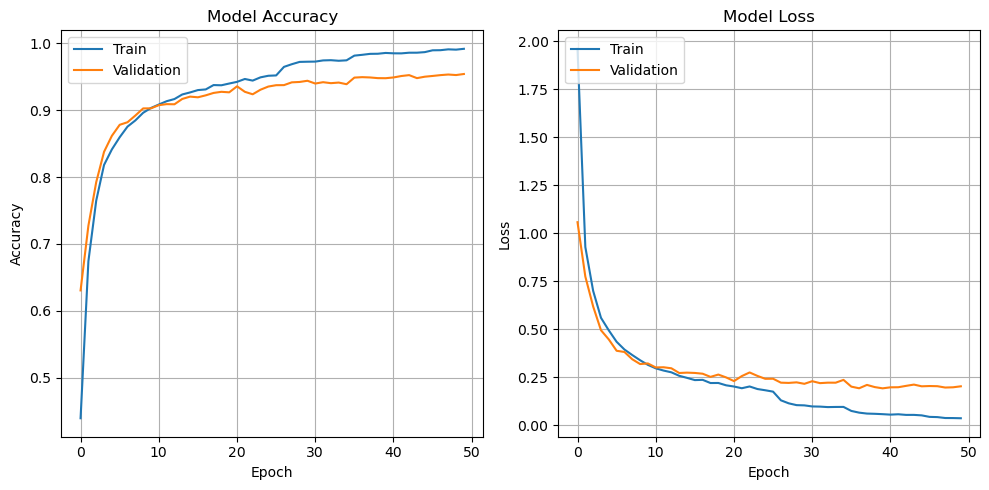

In [37]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ahistory.history['accuracy'])
plt.plot(ahistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(ahistory.history['loss'])
plt.plot(ahistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# Evaluate the model on validation data
val_loss, val_acc = sa_model.evaluate(x_valcnn, y_val)

# Print the validation accuracy
print("Restored model, validation accuracy: {:5.2f}%".format(100*val_acc))

348/348 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.9528 - loss: 0.2068
Restored model, testing accuracy of forth model: 95.52%
279/279 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9554 - loss: 0.1938
Restored model, validation accuracy: 95.41%
